# CPSC 597 Project
# Predicting Future Prices of Ethereum with LSTM

## Created by John Tu
## Advisor: Dr. Rong Jin
## Reviewer: Dr. Kanika Sood

### Based on the following examples from the tutorials: 
### https://www.kaggle.com/code/meetnagadia/bitcoin-price-prediction-using-lstm
### https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/

--------------------------------------------------------------------------------

# Part I: Obtaining the dataset

# There are two ways to upload the csv file. You can either do one of the following:
- Use drive.mount to mount the Google Drive folder so that you can directly access all the files in that directory.
- Use files.upload to prompt user to upload the file and then via io module, read in the csv file.

In [1]:
# Be sure to use drive to access Google Drive files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Using pandas, import the csv file and display the original dataset.
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ETH-USD.csv')
dataset.head(15)

Date        Open        High         Low       Close   Adj Close  \
0   2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1   2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2   2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3   2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4   2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5   2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6   2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7   2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8   2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9   2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10  2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11  2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12  2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13  2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14  2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   

        Volume  
0    893249984  
1    885985984  
2    842300992  
3   1613479936  
4   1041889984  
5   1069680000  
6    722665984  
7    797254016  
8    621732992  
9    649638976  
10  1181529984  
11   807027008  
12   949912000  
13   800819008  
14  1845680000

In [3]:
dataset.tail(15)

Date         Open         High          Low        Close  \
1978  2023-04-10  1859.741211  1917.300171  1848.164185  1911.207520   
1979  2023-04-11  1911.375854  1936.728271  1886.534180  1892.189697   
1980  2023-04-12  1891.949707  1929.881226  1860.036865  1920.682129   
1981  2023-04-13  1917.698364  2022.150146  1901.860352  2012.634644   
1982  2023-04-14  2013.930664  2126.316650  2011.503296  2101.635498   
1983  2023-04-15  2101.616455  2111.075439  2076.510742  2092.466797   
1984  2023-04-16  2092.281006  2137.445068  2076.832031  2120.005859   
1985  2023-04-17  2120.001221  2120.113525  2063.038574  2076.242920   
1986  2023-04-18  2075.855225  2121.531494  2057.653809  2104.537354   
1987  2023-04-19  2103.946289  2104.857178  1928.582886  1936.403442   
1988  2023-04-20  1936.417969  1979.573364  1918.132813  1943.097656   
1989  2023-04-21  1943.409912  1955.649170  1827.788940  1849.999878   
1990  2023-04-22  1849.286499  1886.781616  1845.849243  1874.228638   
1991  2023-04-23  1874.171509  1882.229736  1838.992432  1862.062012   
1992  2023-04-24  1862.014648  1888.193726  1815.724609  1833.186401   

        Adj Close       Volume  
1978  1911.207520   8380134275  
1979  1892.189697   8877222956  
1980  1920.682129  11010714187  
1981  2012.634644  12546950499  
1982  2101.635498  16298099411  
1983  2092.466797   8036468153  
1984  2120.005859   7898126856  
1985  2076.242920   9648882546  
1986  2104.537354   9134015143  
1987  1936.403442  13779745451  
1988  1943.097656  11324135406  
1989  1849.999878  12044274581  
1990  1874.228638   6970642726  
1991  1862.062012   6607451862  
1992  1833.186401   8498483200

In [4]:
# Prompt the user to select a file to upload.
#from google.colab import files
#uploaded_file = files.upload()

In [5]:
# Load the uploaded file as a dataset.
#import io
#import pandas as pd

#dataset = pd.read_csv(io.BytesIO(uploaded_file['ETH-USD.csv']))
#dataset

In [6]:
dataset.isna().sum() # Check how many missing values are there in the dataset.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
dataset.isna().any() # Verify if there are any missing values in the dataset.

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

## Build a pyplot to see the overall trend of Ethereum prices over time.

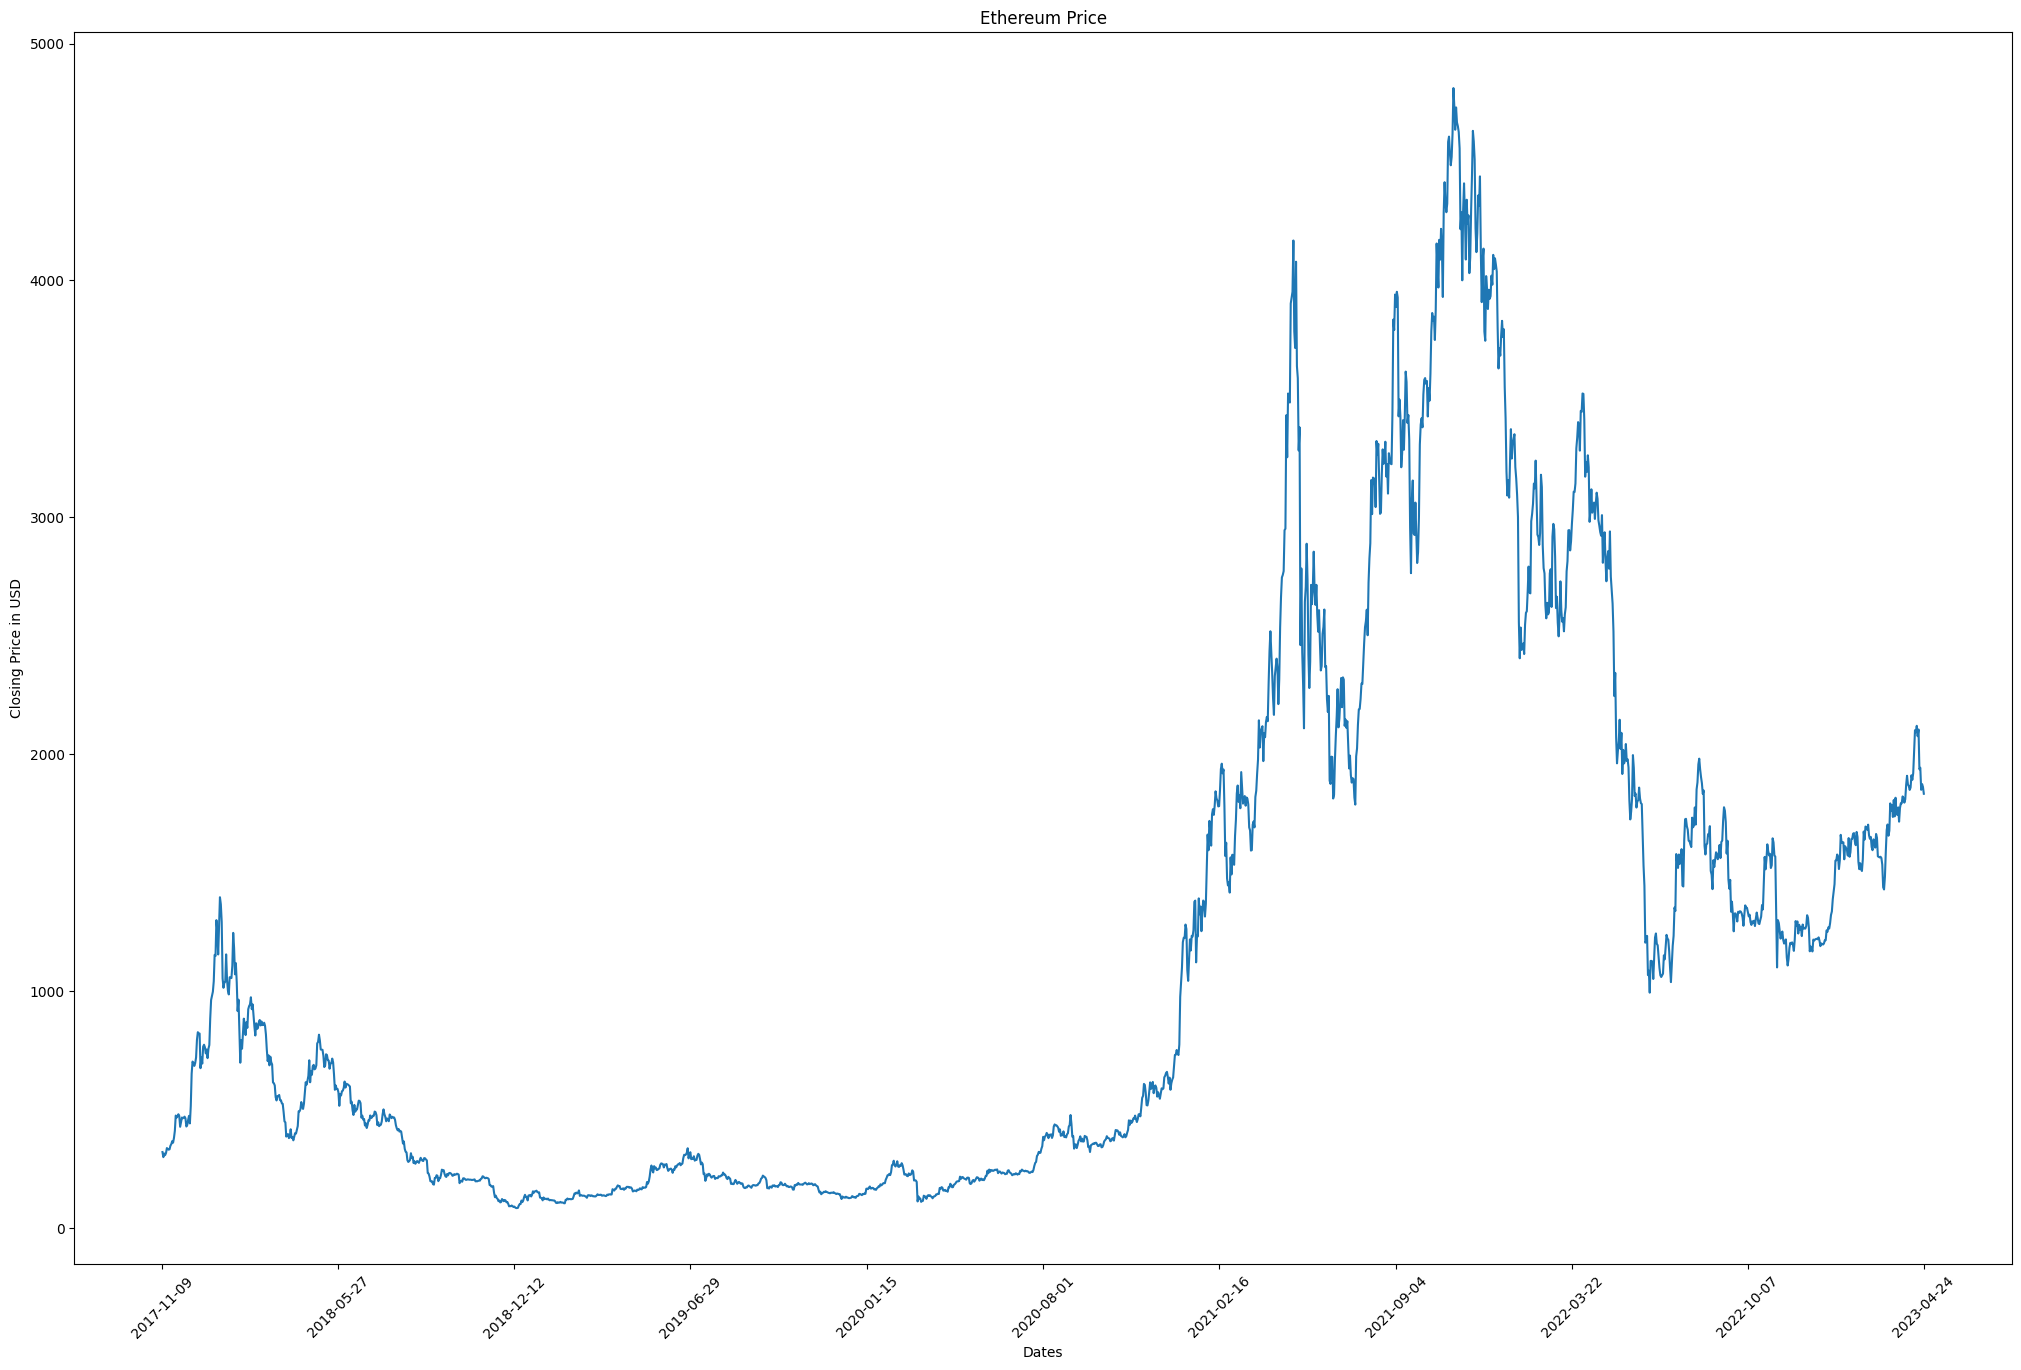

In [8]:
# Plot the graph of the Ethereum price list.
from matplotlib import pyplot as plt

# Manually specify the x-ticks and labels of the pyplot. Consider dividing the plot into 11 sections.
# Except the first and last x-tick, multiply by 0.1 each and add up 0.1 for every subsequent x-tick
# until the x-tick before the very last one. Be sure to convert into integer or else an error will be thrown.
date_xtick = [0, int(len(dataset)*0.1), int(len(dataset)*0.2), int(len(dataset)*0.3), int(len(dataset)*0.4), int(len(dataset)*0.5),
              int(len(dataset)*0.6), int(len(dataset)*0.7), int(len(dataset)*0.8), int(len(dataset)*0.9), int(len(dataset)-1)]
date_label = [dataset['Date'].iloc[0], dataset['Date'].iloc[int(len(dataset)*0.1)], dataset['Date'].iloc[int(len(dataset)*0.2)],
              dataset['Date'].iloc[int(len(dataset)*0.3)], dataset['Date'].iloc[int(len(dataset)*0.4)], dataset['Date'].iloc[int(len(dataset)*0.5)],
              dataset['Date'].iloc[int(len(dataset)*0.6)], dataset['Date'].iloc[int(len(dataset)*0.7)], dataset['Date'].iloc[int(len(dataset)*0.8)],
              dataset['Date'].iloc[int(len(dataset)*0.9)], dataset['Date'].iloc[int(len(dataset)-1)]] # Manually set up the dates for the x-axis.
plt.figure(figsize=(25, 16)) # Make the plot appear larger for better clarity.
plt.plot(dataset['Close'])
plt.xticks(date_xtick, date_label, rotation=45)
plt.title("Ethereum Price")
plt.xlabel("Dates")
plt.ylabel("Closing Price in USD")
plt.show()

## Let us repeat this procedure above but this time, in year 2021.

In [9]:
# Do the same procedure as above, but only consider the closing price of Ethereum from 2021.
dataset_2021 = dataset.loc[(dataset['Date'] >= '2021-01-01') & (dataset['Date'] <= '2022-01-01')]
dataset_2021.head(15)

Date         Open         High          Low        Close  \
1149  2021-01-01   737.708374   749.201843   719.792236   730.367554   
1150  2021-01-02   730.402649   786.798462   718.109497   774.534973   
1151  2021-01-03   774.511841  1006.565002   771.561646   975.507690   
1152  2021-01-04   977.058838  1153.189209   912.305359  1040.233032   
1153  2021-01-05  1041.498779  1129.371460   986.811279  1100.006104   
1154  2021-01-06  1101.005005  1209.428589  1064.233398  1207.112183   
1155  2021-01-07  1208.078369  1282.579590  1167.443115  1225.678101   
1156  2021-01-08  1225.967896  1273.827515  1076.081543  1224.197144   
1157  2021-01-09  1223.740479  1303.871826  1182.270386  1281.077271   
1158  2021-01-10  1280.871094  1347.926147  1194.715576  1262.246704   
1159  2021-01-11  1261.622925  1261.622925   924.922607  1090.145386   
1160  2021-01-12  1088.526733  1149.240234  1012.764160  1043.434570   
1161  2021-01-13  1043.740967  1134.338501   994.549072  1130.739380   
1162  2021-01-14  1130.231201  1244.163086  1093.060791  1218.453003   
1163  2021-01-15  1221.877197  1250.505859  1090.721069  1171.834595   

        Adj Close       Volume  
1149   730.367554  13652004358  
1150   774.534973  19740771179  
1151   975.507690  45200463368  
1152  1040.233032  56945985763  
1153  1100.006104  41535932781  
1154  1207.112183  44699914188  
1155  1225.678101  40468027280  
1156  1224.197144  44334826666  
1157  1281.077271  33233105361  
1158  1262.246704  40616938053  
1159  1090.145386  60733630300  
1160  1043.434570  37494601692  
1161  1130.739380  30109792795  
1162  1218.453003  33410915929  
1163  1171.834595  35972039310

### Be sure to obtain the index row numbers based on the first day of each month.

In [10]:
dataset.loc[dataset['Date'] == '2021-01-01']

Date        Open        High         Low       Close   Adj Close  \
1149  2021-01-01  737.708374  749.201843  719.792236  730.367554  730.367554   

           Volume  
1149  13652004358

In [11]:
dataset.loc[dataset['Date'] == '2021-02-01']

Date         Open         High          Low        Close  \
1180  2021-02-01  1314.855225  1373.845825  1274.357788  1369.040527   

        Adj Close       Volume  
1180  1369.040527  29210670920

In [12]:
dataset.loc[dataset['Date'] == '2021-03-01']

Date         Open        High          Low        Close  \
1208  2021-03-01  1417.151123  1567.69458  1416.416138  1564.707642   

        Adj Close       Volume  
1208  1564.707642  24032838645

In [13]:
dataset.loc[dataset['Date'] == '2021-04-01']

Date         Open         High          Low        Close  \
1239  2021-04-01  1919.157227  1989.055054  1912.178467  1977.276855   

        Adj Close       Volume  
1239  1977.276855  30914259795

In [14]:
dataset.loc[dataset['Date'] == '2021-05-01']

Date         Open         High          Low        Close  \
1269  2021-05-01  2772.838379  2951.440918  2755.908447  2945.892822   

        Adj Close       Volume  
1269  2945.892822  28726205272

In [15]:
dataset.loc[dataset['Date'] == '2021-06-01']

Date         Open         High          Low        Close  \
1300  2021-06-01  2707.560547  2739.737549  2531.160645  2633.518311   

        Adj Close       Volume  
1300  2633.518311  27363223090

In [16]:
dataset.loc[dataset['Date'] == '2021-07-01']

Date         Open         High          Low        Close  \
1330  2021-07-01  2274.397461  2274.397461  2081.081055  2113.605469   

        Adj Close       Volume  
1330  2113.605469  29061701793

In [17]:
dataset.loc[dataset['Date'] == '2021-08-01']

Date         Open         High          Low        Close  \
1361  2021-08-01  2530.462891  2695.429443  2520.931885  2561.852051   

        Adj Close       Volume  
1361  2561.852051  22697987055

In [18]:
dataset.loc[dataset['Date'] == '2021-09-01']

Date         Open         High          Low        Close  \
1392  2021-09-01  3430.762451  3836.867432  3387.408447  3834.828125   

        Adj Close       Volume  
1392  3834.828125  30070890104

In [19]:
dataset.loc[dataset['Date'] == '2021-10-01']

Date         Open         High          Low        Close  \
1422  2021-10-01  3001.129395  3329.853516  2978.654297  3307.516113   

        Adj Close       Volume  
1422  3307.516113  22307625573

In [20]:
dataset.loc[dataset['Date'] == '2021-11-01']

Date         Open         High          Low        Close  \
1453  2021-11-01  4288.217285  4377.322266  4160.966797  4324.626953   

        Adj Close       Volume  
1453  4324.626953  17985288261

In [21]:
dataset.loc[dataset['Date'] == '2021-12-01']

Date         Open         High          Low        Close  \
1483  2021-12-01  4623.679688  4780.732422  4530.272461  4586.990234   

        Adj Close       Volume  
1483  4586.990234  27634826695

In [22]:
dataset.loc[dataset['Date'] == '2022-01-01']

Date         Open         High          Low        Close  \
1514  2022-01-01  3683.047119  3769.917969  3682.286621  3769.697021   

        Adj Close      Volume  
1514  3769.697021  9776191466

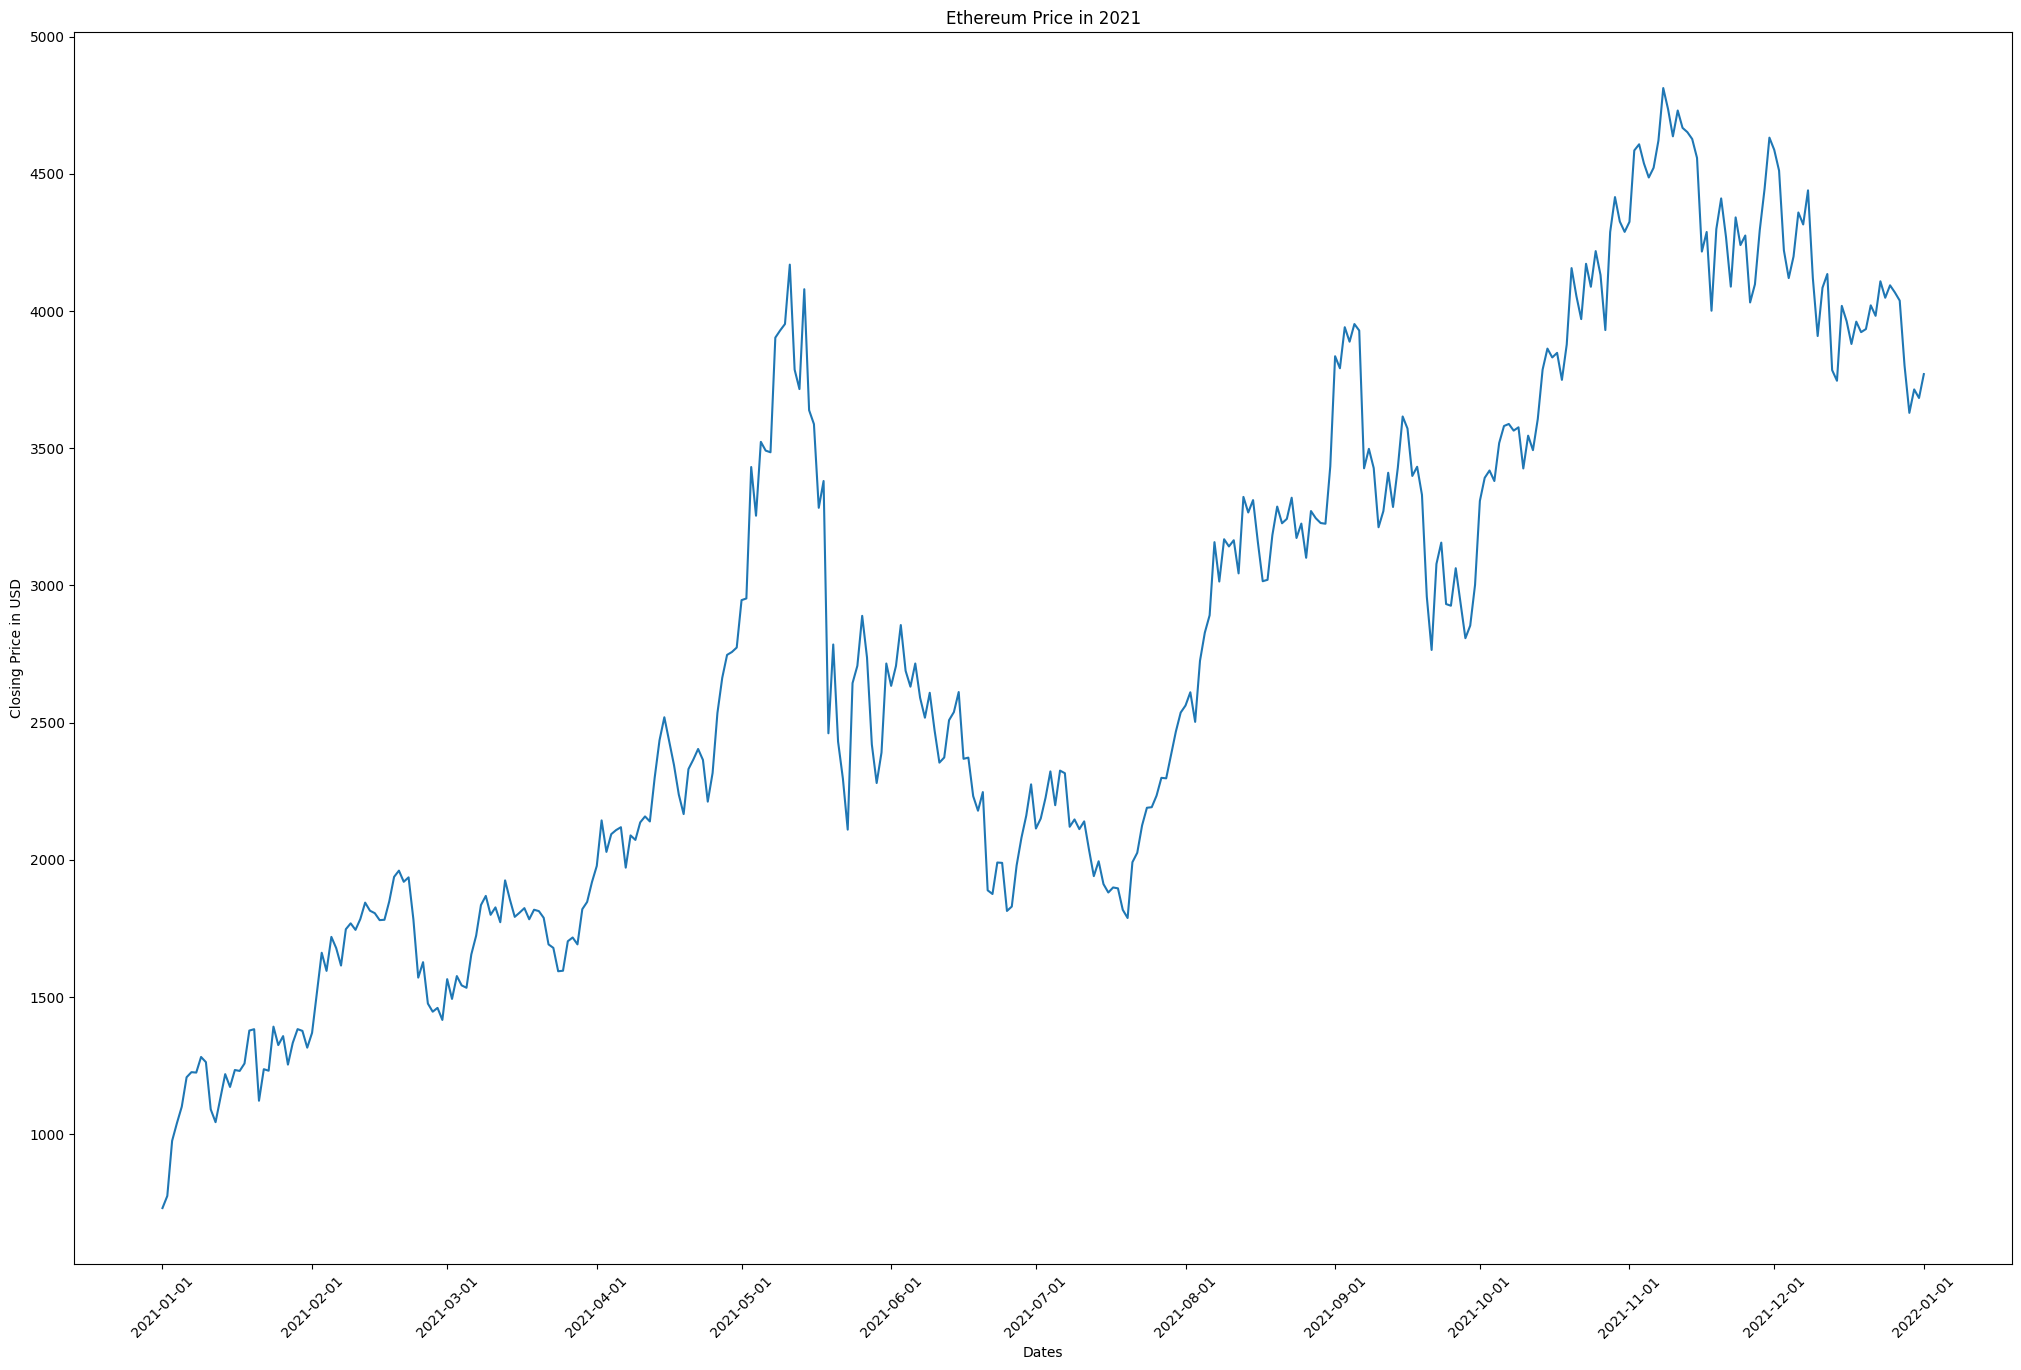

In [24]:
date_xtick = [1149, 1180, 1208, 1239, 1269, 1300, 1330, 1361, 1392, 1422, 1453, 1483, 1514]
date_label = [dataset['Date'].iloc[1149], dataset['Date'].iloc[1180], dataset['Date'].iloc[1208],
              dataset['Date'].iloc[1239], dataset['Date'].iloc[1269], dataset['Date'].iloc[1300],
              dataset['Date'].iloc[1330], dataset['Date'].iloc[1361], dataset['Date'].iloc[1392],
              dataset['Date'].iloc[1422], dataset['Date'].iloc[1453], dataset['Date'].iloc[1483],
              dataset['Date'].iloc[1514]] # Manually set up the dates for the x-axis.
plt.figure(figsize=(25, 16)) # Make the plot appear larger for better clarity.
plt.plot(dataset_2021['Close'])
plt.xticks(date_xtick, date_label, rotation=45)
plt.title("Ethereum Price in 2021")
plt.xlabel("Dates")
plt.ylabel("Closing Price in USD")
plt.show()

## Now do the same thing for year 2022.

In [25]:
dataset_2022 = dataset.loc[(dataset['Date'] >= '2022-01-01') & (dataset['Date'] <= '2023-01-01')]
dataset_2022.head(15)

Date         Open         High          Low        Close  \
1514  2022-01-01  3683.047119  3769.917969  3682.286621  3769.697021   
1515  2022-01-02  3769.298340  3836.161865  3727.357422  3829.564941   
1516  2022-01-03  3829.535645  3836.198730  3698.047607  3761.380371   
1517  2022-01-04  3761.361572  3876.785156  3723.349854  3794.056641   
1518  2022-01-05  3794.269043  3842.059814  3456.745361  3550.386963   
1519  2022-01-06  3549.708984  3549.708984  3335.376709  3418.408203   
1520  2022-01-07  3417.837891  3420.461914  3117.381348  3193.210449   
1521  2022-01-08  3193.502441  3240.304443  3020.880859  3091.972656   
1522  2022-01-09  3091.696289  3206.790771  3075.911377  3157.751465   
1523  2022-01-10  3157.570557  3177.213379  2947.683594  3083.097900   
1524  2022-01-11  3082.990967  3247.511963  3061.140625  3238.111572   
1525  2022-01-12  3238.449951  3401.219971  3216.718018  3372.258301   
1526  2022-01-13  3372.104980  3396.969727  3247.917480  3248.288574   
1527  2022-01-14  3248.648682  3330.766113  3203.823730  3310.001465   
1528  2022-01-15  3309.844238  3364.537842  3278.670898  3330.530762   

        Adj Close       Volume  
1514  3769.697021   9776191466  
1515  3829.564941   9881471548  
1516  3761.380371  12080777893  
1517  3794.056641  14030925983  
1518  3550.386963  18061338502  
1519  3418.408203  24293791313  
1520  3193.210449  24494179209  
1521  3091.972656  16037732700  
1522  3157.751465  12334683863  
1523  3083.097900  19535744145  
1524  3238.111572  15211447193  
1525  3372.258301  16662871689  
1526  3248.288574  15294466275  
1527  3310.001465  13562957230  
1528  3330.530762   9619999078

In [26]:
dataset.loc[dataset['Date'] == '2022-01-01']

Date         Open         High          Low        Close  \
1514  2022-01-01  3683.047119  3769.917969  3682.286621  3769.697021   

        Adj Close      Volume  
1514  3769.697021  9776191466

In [27]:
dataset.loc[dataset['Date'] == '2022-02-01']

Date         Open        High          Low        Close  \
1545  2022-02-01  2687.898926  2802.31543  2682.621826  2792.117188   

        Adj Close       Volume  
1545  2792.117188  13194846235

In [28]:
dataset.loc[dataset['Date'] == '2022-03-01']

Date         Open         High          Low        Close  \
1573  2022-03-01  2919.775879  3029.651611  2868.938965  2972.485107   

        Adj Close       Volume  
1573  2972.485107  18757425786

In [29]:
dataset.loc[dataset['Date'] == '2022-04-01']

Date         Open         High          Low        Close  \
1604  2022-04-01  3282.576172  3467.555908  3223.891357  3449.552246   

        Adj Close       Volume  
1604  3449.552246  20982988937

In [30]:
dataset.loc[dataset['Date'] == '2022-05-01']

Date         Open         High          Low        Close  \
1634  2022-05-01  2729.994141  2838.704346  2728.078857  2827.756104   

        Adj Close       Volume  
1634  2827.756104  15332730152

In [31]:
dataset.loc[dataset['Date'] == '2022-06-01']

Date         Open         High          Low        Close  \
1665  2022-06-01  1942.050659  1965.166626  1776.053223  1823.569336   

        Adj Close       Volume  
1665  1823.569336  21037797760

In [32]:
dataset.loc[dataset['Date'] == '2022-07-01']

Date         Open         High          Low        Close  \
1695  2022-07-01  1068.316772  1100.223877  1040.150757  1059.767334   

        Adj Close       Volume  
1695  1059.767334  17499453625

In [33]:
dataset.loc[dataset['Date'] == '2022-08-01']

Date         Open         High          Low        Close  \
1726  2022-08-01  1681.445557  1700.170898  1613.416016  1635.195801   

        Adj Close       Volume  
1726  1635.195801  16191371176

In [34]:
dataset.loc[dataset['Date'] == '2022-09-01']

Date         Open         High          Low        Close  \
1757  2022-09-01  1553.756348  1593.082764  1520.188354  1586.176758   

        Adj Close       Volume  
1757  1586.176758  16434276817

In [35]:
dataset.loc[dataset['Date'] == '2022-10-01']

Date         Open         High          Low        Close  \
1787  2022-10-01  1328.193726  1332.516479  1306.102539  1311.644409   

        Adj Close      Volume  
1787  1311.644409  6227961237

In [36]:
dataset.loc[dataset['Date'] == '2022-11-01']

Date         Open         High          Low       Close  \
1818  2022-11-01  1572.645386  1606.605713  1568.098511  1579.70459   

       Adj Close       Volume  
1818  1579.70459  14507311208

In [37]:
dataset.loc[dataset['Date'] == '2022-12-01']

Date         Open         High          Low        Close  \
1848  2022-12-01  1295.769531  1295.999878  1267.708496  1276.273926   

        Adj Close      Volume  
1848  1276.273926  6857935276

In [38]:
dataset.loc[dataset['Date'] == '2023-01-01']

Date         Open         High          Low        Close  \
1879  2023-01-01  1196.713623  1203.475342  1192.885376  1200.964844   

        Adj Close      Volume  
1879  1200.964844  2399674550

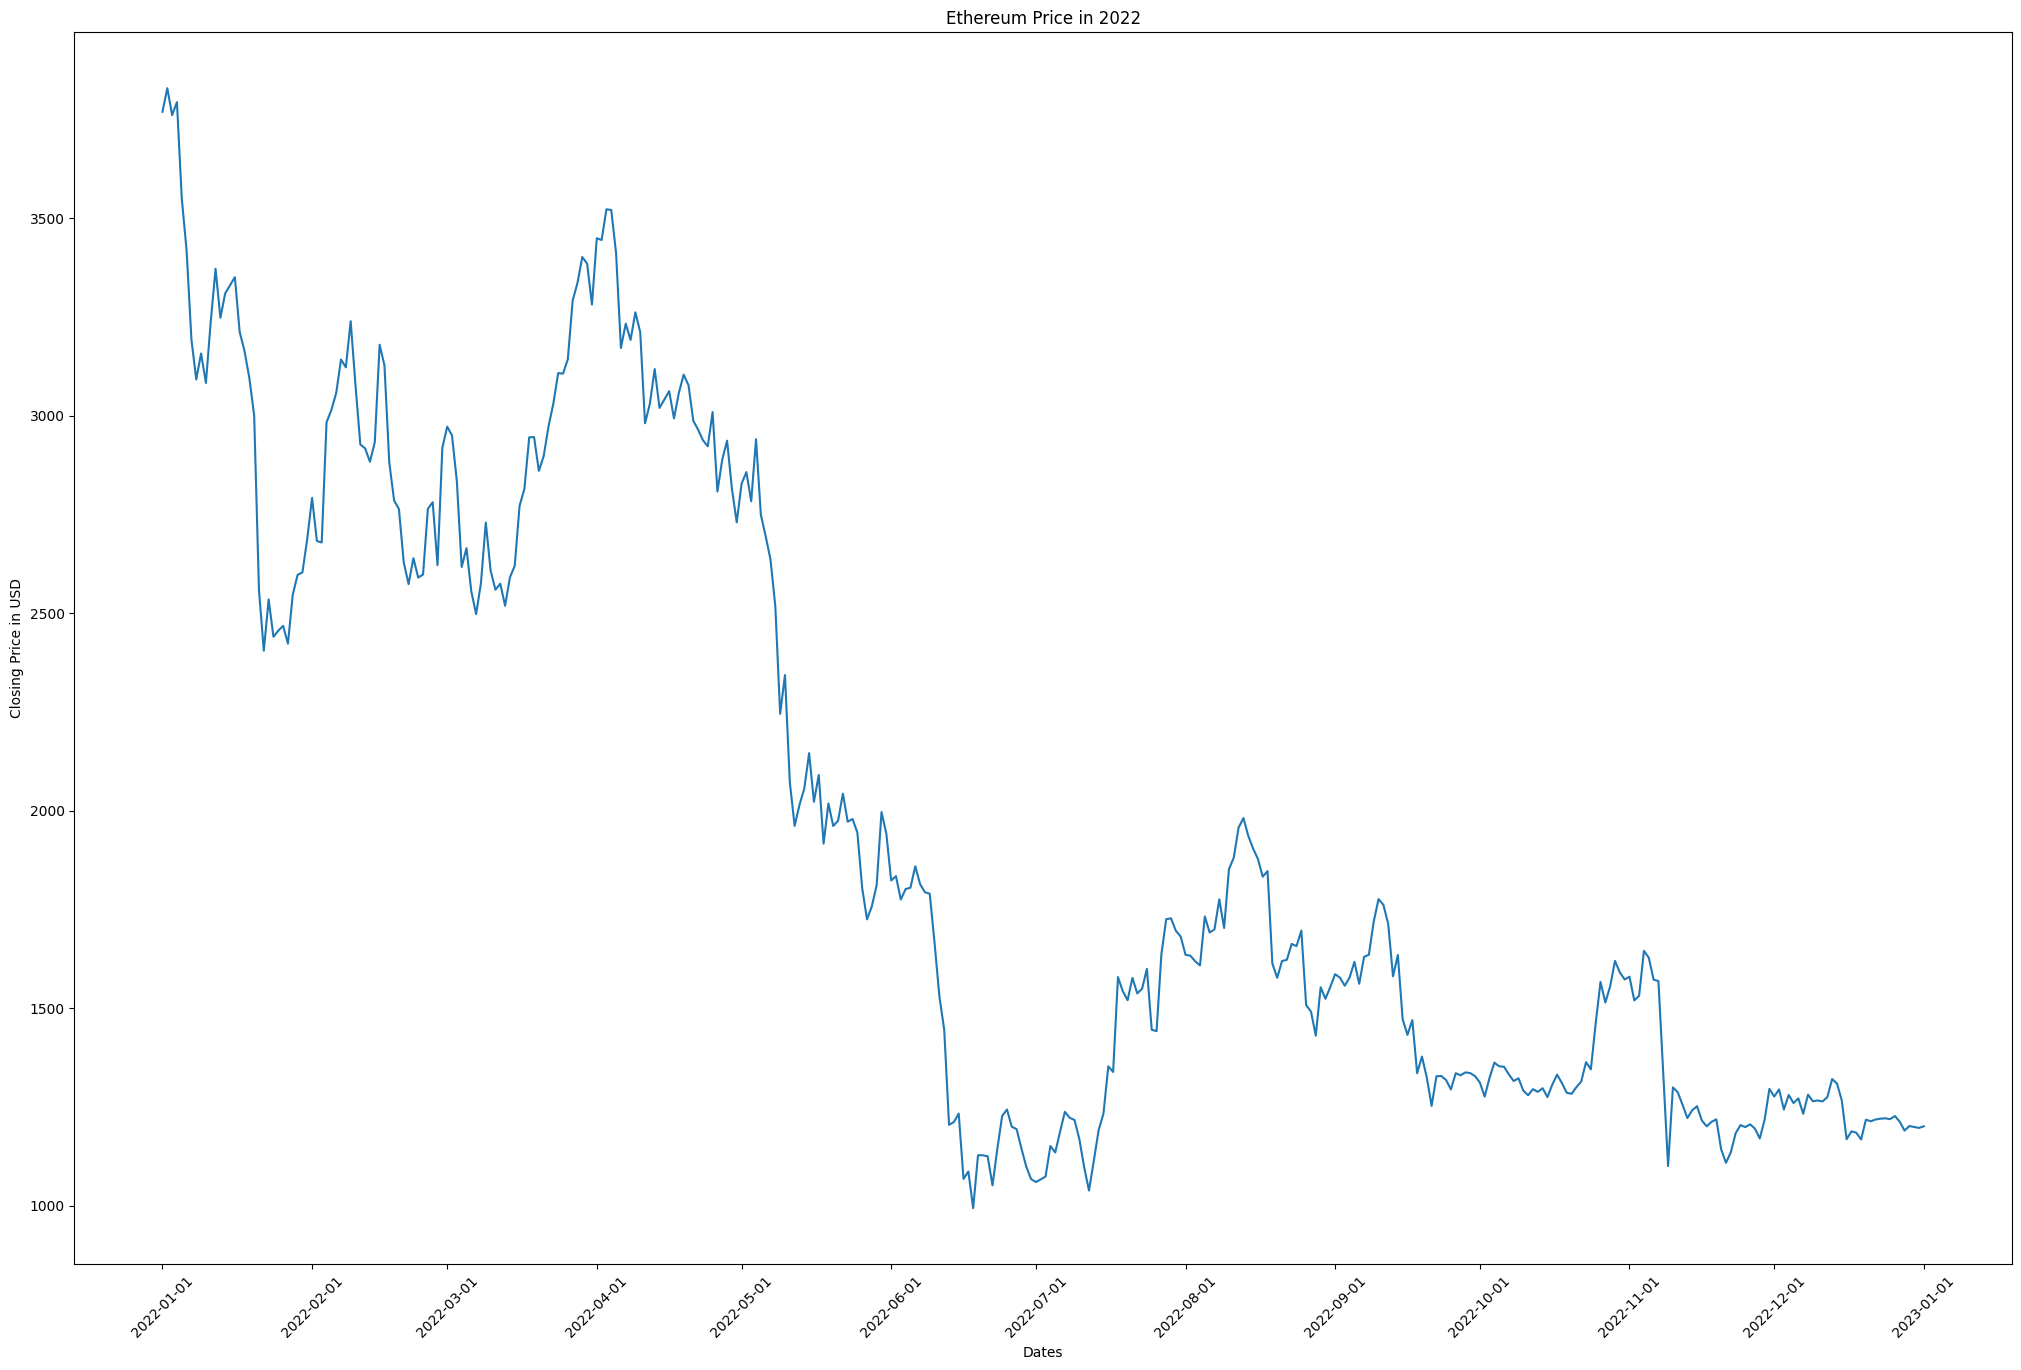

In [39]:
date_xtick = [1514, 1545, 1573, 1604, 1634, 1665, 1695, 1726, 1757, 1787, 1818, 1848, 1879]
date_label = [dataset['Date'].iloc[1514], dataset['Date'].iloc[1545], dataset['Date'].iloc[1573],
              dataset['Date'].iloc[1604], dataset['Date'].iloc[1634], dataset['Date'].iloc[1665],
              dataset['Date'].iloc[1695], dataset['Date'].iloc[1726], dataset['Date'].iloc[1757],
              dataset['Date'].iloc[1787], dataset['Date'].iloc[1818], dataset['Date'].iloc[1848],
              dataset['Date'].iloc[1879]] # Manually set up the dates for the x-axis.
plt.figure(figsize=(25, 16)) # Make the plot appear larger for better clarity.
plt.plot(dataset_2022['Close'])
plt.xticks(date_xtick, date_label, rotation=45)
plt.title("Ethereum Price in 2022")
plt.xlabel("Dates")
plt.ylabel("Closing Price in USD")
plt.show()

In [40]:
# Save the original data columns for later use.
#original_data = dataset[['Date', 'Open']]
#original_data = dataset[['Date', 'High']]
#original_data = dataset[['Date', 'Low']]
original_data = dataset[['Date', 'Close']]
#original_data = dataset[['Date', 'Open', 'High', 'Low', 'Close']]
print("Shape of original data: {}".format(original_data.shape))

Shape of original data: (1993, 2)


--------------------------------------------------------------------------------

# Part II: Preparing the dataset

## First, create the three datasets of different training-test sizes:
## one with 70-30 training-test, one with 80-20 training-test, and one with 75-25 training-test.
## Next, do batch normalization of the training values.
## After that, create the features and labels (or x- and y-values) for each dataset.

In [41]:
# Be sure to import skicit and numpy as they will be needed for data preparation.
from sklearn import *
import numpy as np

In [42]:
# Choose which column to focus on for price prediction.
#column_data = dataset['Open']
#column_data = dataset['High']
#column_data = dataset['Low']
column_data = dataset['Close']

In [43]:
# Select the number of time steps to perform when creating the features and labels
# from the training and test sets.
num_steps = 30
# num_steps = 60
# num_steps = 90
# num_steps = 180

In [44]:
# Split the dataset into training and test data.
def prepare_dataset(data, train_ratio):
  # First, split the dataset into training and test length.
  training_length = int(train_ratio*len(data))
  training_data = data[:training_length]
  test_data = data[training_length::]

  print("Shape of training and test data: {} and {}".format(training_data.shape, test_data.shape))

  return training_data, test_data

## Now create a custom dataset separated into training and test sets based on date.

In [45]:
def prepare_dataset_custom(data, input_date):
  # Follow the same procedure as above, but this time,
  # let the user choose which date to separate the dataset
  # into the training and test set.
  training_data = data.loc[(data['Date'] < input_date)]
  test_data = data.loc[(data['Date'] >= input_date)]

  print("Shape of training and test data: {} and {}".format(training_data.shape, test_data.shape))

  return training_data, test_data

In [46]:
#def prepare_dataset(data, train_len):
  # Call train_test_split to separate dataset into training and test data.
  #train, test = model_selection.train_test_split(data, test_size=1-train_len, random_state=42, shuffle=True)
  #print("Shape of training and test data: {} and {}".format(len(train), len(test)))
  #return train, test

In [47]:
training_data, test_data = prepare_dataset(original_data, 0.7)
training_data = training_data.drop(['Date'], axis=1)
test_data = test_data.drop(['Date'], axis=1)

Shape of training and test data: (1395, 2) and (598, 2)


In [48]:
training_data2, test_data2 = prepare_dataset(original_data, 0.8)
training_data2 = training_data2.drop(['Date'], axis=1)
test_data2 = test_data2.drop(['Date'], axis=1)

Shape of training and test data: (1594, 2) and (399, 2)


In [49]:
training_data3, test_data3 = prepare_dataset(original_data, 0.75)
training_data3 = training_data3.drop(['Date'], axis=1)
test_data3 = test_data3.drop(['Date'], axis=1)

Shape of training and test data: (1494, 2) and (499, 2)


In [50]:
training_data4, test_data4 = prepare_dataset_custom(original_data, "2022-04-01")
training_data4 = training_data4.drop(['Date'], axis=1)
test_data4 = test_data4.drop(['Date'], axis=1)

Shape of training and test data: (1604, 2) and (389, 2)


In [51]:
# Now normalize the training and test data.
normalizer = preprocessing.MinMaxScaler()
training_normalized = normalizer.fit_transform(np.array(training_data).reshape(-1, 1))
test_normalized = normalizer.fit_transform(np.array(test_data).reshape(-1, 1)) 
training_normalized2 = normalizer.fit_transform(np.array(training_data2).reshape(-1, 1))
test_normalized2 = normalizer.fit_transform(np.array(test_data2).reshape(-1, 1))
training_normalized3 = normalizer.fit_transform(np.array(training_data3).reshape(-1, 1))
test_normalized3 = normalizer.fit_transform(np.array(test_data3).reshape(-1, 1))
normalized_train4 = normalizer.fit_transform(np.array(training_data4).reshape(-1, 1))
normalized_test4 = normalizer.fit_transform(np.array(test_data4).reshape(-1, 1))

In [52]:
print(training_data4)

            Close
0      320.884003
1      299.252991
2      314.681000
3      307.907990
4      316.716003
...           ...
1599  3291.577637
1600  3336.634521
1601  3401.987793
1602  3385.157959
1603  3281.642822

[1604 rows x 1 columns]


In [53]:
# Split the training and test datasets into features and labels.
# Features will be the input for the neural network model, and examples can be
# date and opening price. Labels will be the output, like predicting the future
# closing price.
feature_training, feature_test, label_training, label_test = [], [], [], []

In [54]:
# This function assigns the features and labels from the training and test datasets.
def data_to_features_and_labels(train, train_len, test, test_len, time_steps=1):
  x_train, x_test, y_train, y_test = [], [], [], []
  for i in range(time_steps, train_len):
    x_train.append(train[i-time_steps:i])
    y_train.append(train[i, 0])
  for j in range(time_steps, test_len):
    x_test.append(test[j-time_steps:j])
    y_test.append(test[j, 0])
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

In [55]:
feature_training, feature_test, label_training, label_test = data_to_features_and_labels(training_normalized, training_normalized.shape[0],
                                                                                         test_normalized, test_normalized.shape[0], num_steps)

In [56]:
# Inspect the shapes of the features and labels.
print("Features of training data: ", feature_training.shape)
print("Labels of training data: ", label_training.shape)
print("Features of test data: ", feature_test.shape)
print("Labels of test data: ", label_test.shape)

Features of training data:  (1365, 30, 1)
Labels of training data:  (1365,)
Features of test data:  (568, 30, 1)
Labels of test data:  (568,)


In [57]:
feature_training2, feature_test2, label_training2, label_test2 = [], [], [], []

In [58]:
feature_training2, feature_test2, label_training2, label_test2 = data_to_features_and_labels(training_normalized2, training_normalized2.shape[0],
                                                                                         test_normalized2, test_normalized2.shape[0], num_steps)

In [59]:
# Inspect the shapes of the features and labels.
print("Features of training data: ", feature_training2.shape)
print("Labels of training data: ", label_training2.shape)
print("Features of test data: ", feature_test2.shape)
print("Labels of test data: ", label_test2.shape)

Features of training data:  (1564, 30, 1)
Labels of training data:  (1564,)
Features of test data:  (369, 30, 1)
Labels of test data:  (369,)


In [60]:
feature_training3, feature_test3, label_training3, label_test3 = [], [], [], []

In [61]:
feature_training3, feature_test3, label_training3, label_test3 = data_to_features_and_labels(training_normalized3, training_normalized3.shape[0],
                                                                                         test_normalized3, test_normalized3.shape[0], num_steps)

In [62]:
# Inspect the shapes of the features and labels.
print("Features of training data: ", feature_training3.shape)
print("Labels of training data: ", label_training3.shape)
print("Features of test data: ", feature_test3.shape)
print("Labels of test data: ", label_test3.shape)

Features of training data:  (1464, 30, 1)
Labels of training data:  (1464,)
Features of test data:  (469, 30, 1)
Labels of test data:  (469,)


In [63]:
feature_training4, feature_test4, label_training4, label_test4 = [], [], [], []

In [64]:
feature_training4, feature_test4, label_training4, label_test4 = data_to_features_and_labels(normalized_train4, normalized_train4.shape[0],
                                                                                         normalized_test4, normalized_test4.shape[0], num_steps)

In [65]:
# Inspect the shapes of the features and labels.
print("Features of training data: ", feature_training4.shape)
print("Labels of training data: ", label_training4.shape)
print("Features of test data: ", feature_test4.shape)
print("Labels of test data: ", label_test4.shape)

Features of training data:  (1574, 30, 1)
Labels of training data:  (1574,)
Features of test data:  (359, 30, 1)
Labels of test data:  (359,)


In [66]:
# Define the following functions here.
# Plot the loss for the training set.
def plot_loss(plot1, plot2, plot_name="Mean Squared Error for Training"):
  plt.figure(figsize=(12, 8)) # Make the plot appear larger for better clarity.
  plt.plot(plot1, label="Loss")
  plt.plot(plot2, label="Validation loss")
  plt.title(plot_name)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

# Plot the obtained training prediction and compare with the actual training data.
def plot_result_train(actual, predicted, dataset, name="Actual vs Predicted Result"):
  plt.figure(figsize=(12, 8))
  plt.title(name)
  actual_data = normalizer.inverse_transform(actual.reshape(-1, 1))
  # Create a new dataframe.
  result_data = pd.DataFrame({'Dates': dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'],
                 'Actual Price': actual_data.tolist(),
                 'Predicted Price': predicted.tolist()})
  plt.plot(dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'], actual_data, label="Actual price")
  plt.plot(dataset.loc[num_steps:len(actual)+num_steps-1, 'Date'], predicted, label="Predicted price")
  # Now plot the actual dataframe.
  print(result_data)
  plt.xticks(np.arange(0, actual.shape[0], 60), rotation=45)
  plt.xlabel("Dates")
  #plt.ylabel("Opening Price in USD")
  #plt.ylabel("Highest Price in USD")
  #plt.ylabel("Lowest Price in USD")
  plt.ylabel("Closing Price in USD")
  plt.legend()
  plt.show()

def plot_result_test(actual, predicted, start_len, dataset, name="Actual vs Predicted Result"):
  # When plotting the actual test data and predicted test data, be sure to
  # adjust the starting x-axis by shifting them with time steps and the length
  # of the training data.
  plt.figure(figsize=(12, 8))
  plt.title(name)
  actual_data = normalizer.inverse_transform(actual.reshape(-1, 1))
  # Create a new dataframe.
  result_data = pd.DataFrame({'Dates': dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'],
                 'Actual Price': actual_data.tolist(),
                 'Predicted Price': predicted.tolist()})
  plt.plot(dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'], actual_data, label="Actual price")
  plt.plot(dataset.loc[start_len+(2*num_steps):(len(dataset)-1), 'Date'], predicted, label="Predicted price")
  # Now plot the actual dataframe.
  print(result_data)
  plt.xticks(np.arange(0, actual.shape[0], 60), rotation=45)
  plt.xlabel("Dates")
  #plt.ylabel("Opening Price in USD")
  #plt.ylabel("Highest Price in USD")
  #plt.ylabel("Lowest Price in USD")
  plt.ylabel("Closing Price in USD")
  plt.legend()
  plt.show()

--------------------------------------------------------------------------------

# Part III: Building the Baseline Model

--------------------------------------------------------------------------------

## This will be the base case model where it will be used for comparing
## performance metrics like accuracy and loss with the improved models
## that shall be defined later throughout this notebook.

In [67]:
# Baseline RNN-LSTM model
# This will be the base case model where it will be used for comparing
# performance metrics like accuracy and loss with the improved models
# that shall be defined later throughout this notebook.

# For instance, the following layers can be implemented for baseline model:
# LSTM layer
# Dense layer
# Batch normalization
from tensorflow import keras as tf # Import the TensorFlow library.

In [68]:
# For the callback, only keep the epoch with the best weight and if the validation loss begins to worsen,
# halt the training process after a certain number of epochs (10 epochs is the optimal value for patience).
callback = tf.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [69]:
# Include multiple LSTM layers and a Dense layer as output layer.
baseline_model = tf.models.Sequential()
baseline_model.add(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True))
baseline_model.add(tf.layers.LSTM(units=128, return_sequences=True))
baseline_model.add(tf.layers.LSTM(units=128, return_sequences=True))
baseline_model.add(tf.layers.LSTM(units=128, return_sequences=True))
baseline_model.add(tf.layers.LSTM(units=128))
baseline_model.add(tf.layers.Dense(1))
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 593,025
Trainable params: 593,025
Non-trai

In [70]:
# Compile the model using Mean Squared Error as loss and Adam as optimizer.
baseline_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

## For the validation data, use the features and labels from the test dataset.

In [71]:
train_result = baseline_model.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model (the one with 70% training and 30% test data).

Epoch 1/100
43/43 [==============================] - 18s 97ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0523 - root_mean_squared_error: 0.0905 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_mean_absolute_error: 0.0755 - val_root_mean_squared_error: 0.0995
Epoch 2/100
43/43 [==============================] - 4s 93ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0302 - root_mean_squared_error: 0.0546 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0674 - val_root_mean_squared_error: 0.0886
Epoch 3/100
43/43 [==============================] - 3s 71ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0293 - root_mean_squared_error: 0.0545 - val_loss: 0.0067 - val_mean_squared_error: 0.0067 - val_mean_absolute_error: 0.0622 - val_root_mean_squared_error: 0.0819
Epoch 4/100
43/43 [==============================] - 3s 59ms/step - loss: 0.0023 - mean_squared_error: 0.

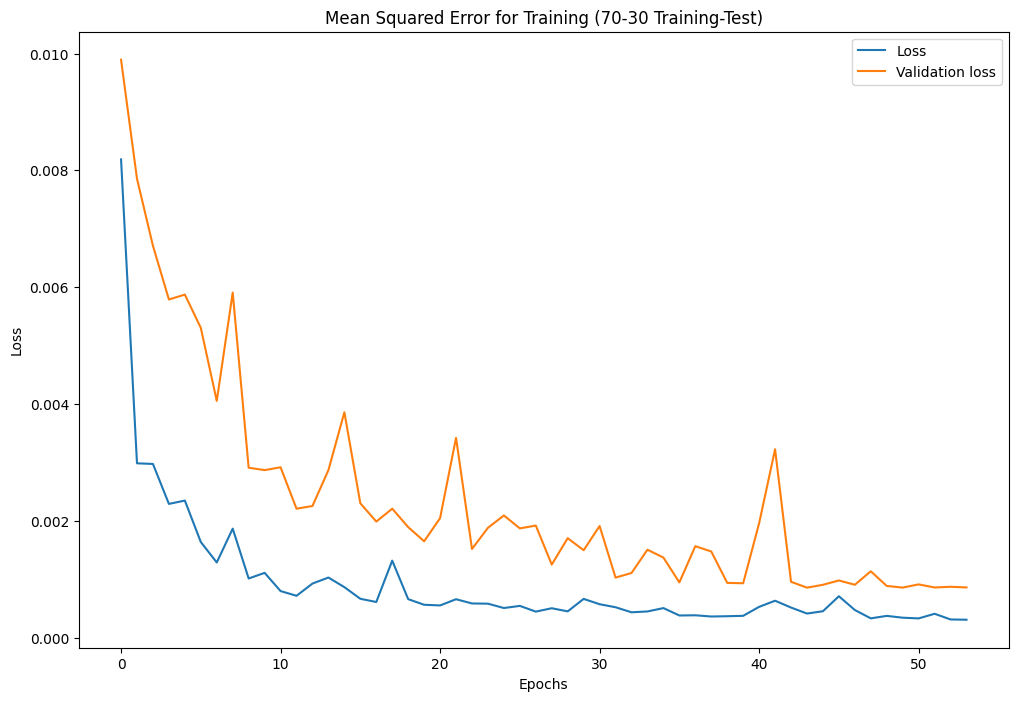

In [72]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (70-30 Training-Test)")

In [73]:
baseline_model.evaluate(x=feature_test, y=label_test, verbose=1) # Now evaluate the model.

18/18 [==============================] - 0s 11ms/step - loss: 8.5416e-04 - mean_squared_error: 8.5416e-04 - mean_absolute_error: 0.0208 - root_mean_squared_error: 0.0292


[0.0008541628485545516,
 0.0008541628485545516,
 0.020808562636375427,
 0.029226064682006836]

In [74]:
# Now try to predict the training and test values.
training_predict = baseline_model.predict(feature_training)
test_predict = baseline_model.predict(feature_test)

18/18 [==============================] - 0s 13ms/step


In [75]:
training_predict.shape

(1365, 1)

In [76]:
feature_training.shape

(1365, 30, 1)

In [77]:
# Restore the training and test datasets' original shapes.
training_result = normalizer.inverse_transform(training_predict.reshape(-1, 1))
test_result = normalizer.inverse_transform(test_predict.reshape(-1, 1))

           Dates          Actual Price       Predicted Price
30    2017-12-09  [1234.6389321772506]  [1224.2337646484375]
31    2017-12-10  [1214.9590388744555]    [1230.27001953125]
32    2017-12-11  [1260.4201213168128]  [1232.1964111328125]
33    2017-12-12  [1344.8187059185636]  [1242.2198486328125]
34    2017-12-13  [1376.6077242684673]        [1278.3515625]
...          ...                   ...                   ...
1390  2021-08-30  [2938.0737588891357]     [2914.0205078125]
1391  2021-08-31  [3067.7156882441755]   [2910.249755859375]
1392  2021-09-01  [3316.0878082883187]   [3012.919189453125]
1393  2021-09-02   [3288.941725518203]   [3231.058349609375]
1394  2021-09-03  [3381.5945268026167]    [3269.77197265625]

[1365 rows x 3 columns]


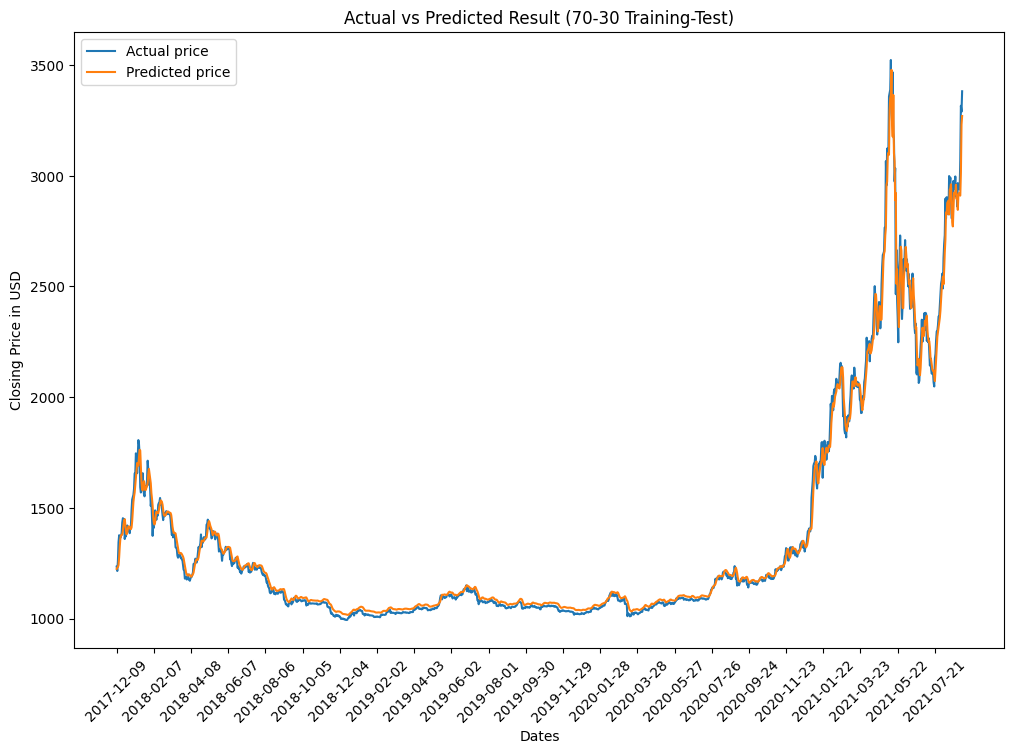

In [78]:
plot_result_train(label_training, training_result, original_data, "Actual vs Predicted Result (70-30 Training-Test)")

           Dates          Actual Price       Predicted Price
1425  2021-10-04  [2574.3321970574957]   [2589.013916015625]
1426  2021-10-05  [2666.0226049798393]    [2591.69580078125]
1427  2021-10-06   [2707.117835278116]   [2640.979248046875]
1428  2021-10-07  [2712.0278203738003]   [2692.799072265625]
1429  2021-10-08  [2695.9883415675076]   [2713.714111328125]
...          ...                   ...                   ...
1988  2023-04-20  [1622.5236158580235]  [1676.9327392578125]
1989  2023-04-21  [1560.8591823760564]  [1639.2764892578125]
1990  2023-04-22   [1576.907393101027]  [1599.2640380859375]
1991  2023-04-23   [1568.848681971778]  [1579.3953857421875]
1992  2023-04-24   [1549.722573572492]     [1573.3447265625]

[568 rows x 3 columns]


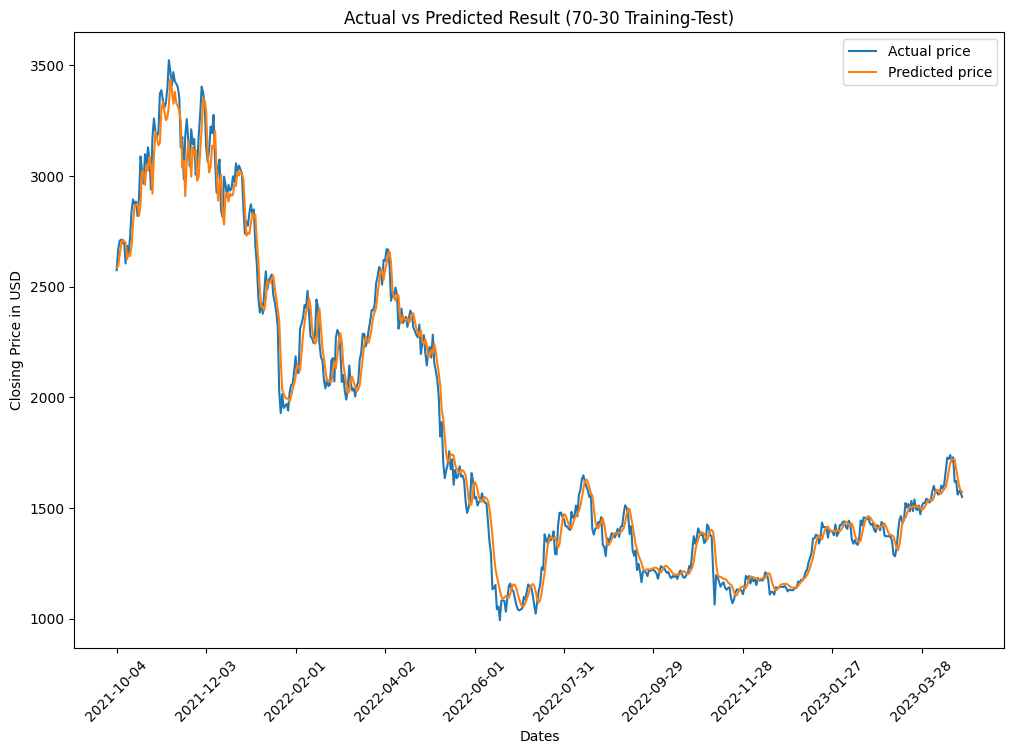

In [79]:
plot_result_test(label_test, test_result, label_training.shape[0], original_data, "Actual vs Predicted Result (70-30 Training-Test)")

In [80]:
tf.backend.clear_session() # Be sure to clear the backend session afterwards.

## Repeat Part 3, but this time, for the 80-20, 75-25, and custom models.

In [81]:
train_result2 = baseline_model.fit(x=feature_training2, y=label_training2, validation_data=(feature_test2, label_test2),
                                   epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model (the one with 80% training and 20% test data).

Epoch 1/100
49/49 [==============================] - 4s 68ms/step - loss: 5.0506e-04 - mean_squared_error: 5.0506e-04 - mean_absolute_error: 0.0120 - root_mean_squared_error: 0.0225 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0273 - val_root_mean_squared_error: 0.0390
Epoch 2/100
49/49 [==============================] - 3s 69ms/step - loss: 5.9561e-04 - mean_squared_error: 5.9561e-04 - mean_absolute_error: 0.0132 - root_mean_squared_error: 0.0244 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_mean_absolute_error: 0.0313 - val_root_mean_squared_error: 0.0436
Epoch 3/100
49/49 [==============================] - 5s 95ms/step - loss: 4.1099e-04 - mean_squared_error: 4.1099e-04 - mean_absolute_error: 0.0121 - root_mean_squared_error: 0.0203 - val_loss: 9.5886e-04 - val_mean_squared_error: 9.5886e-04 - val_mean_absolute_error: 0.0213 - val_root_mean_squared_error: 0.0310
Epoch 4/100
49/49 [==============================] - 3s 70ms/step - loss: 

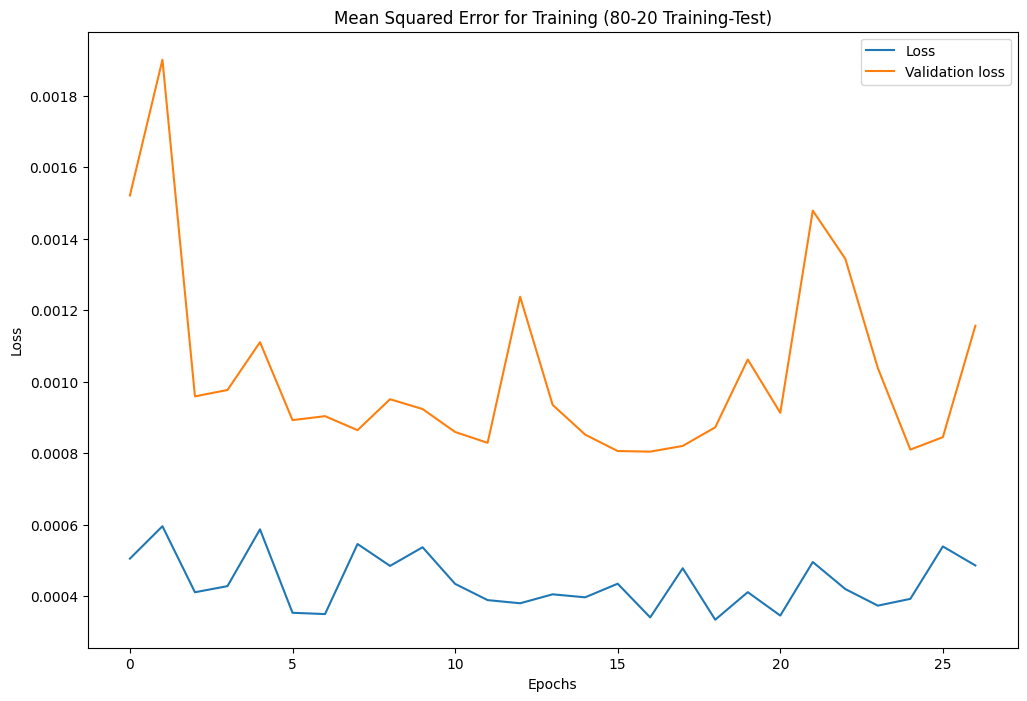

In [82]:
plot_loss(train_result2.history['loss'], train_result2.history['val_loss'], "Mean Squared Error for Training (80-20 Training-Test)")

In [83]:
baseline_model.evaluate(x=feature_test2, y=label_test2, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 14ms/step - loss: 8.0422e-04 - mean_squared_error: 8.0422e-04 - mean_absolute_error: 0.0195 - root_mean_squared_error: 0.0284


[0.0008042242261581123,
 0.0008042242261581123,
 0.019464341923594475,
 0.02835884690284729]

In [84]:
training_predict2 = baseline_model.predict(feature_training2)
test_predict2 = baseline_model.predict(feature_test2)

12/12 [==============================] - 0s 9ms/step


In [85]:
# Restore the training and test datasets' original shapes.
training_result2 = normalizer.inverse_transform(training_predict2)
test_result2 = normalizer.inverse_transform(test_predict2)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1189.8487548828125]
31    2017-12-10  [1184.8400991863457]   [1201.111572265625]
32    2017-12-11  [1224.1145485841962]   [1198.148681640625]
33    2017-12-12  [1297.0276373650145]  [1215.2864990234375]
34    2017-12-13  [1324.4906040502817]  [1272.1463623046875]
...          ...                   ...                   ...
1589  2022-03-17    [2454.38363745047]     [2404.5244140625]
1590  2022-03-18   [2524.190441879222]    [2437.41650390625]
1591  2022-03-19  [2524.6794331279216]   [2497.880615234375]
1592  2022-03-20  [2478.7805791155456]   [2507.834716796875]
1593  2022-03-21  [2498.8510426076855]   [2467.758056640625]

[1564 rows x 3 columns]


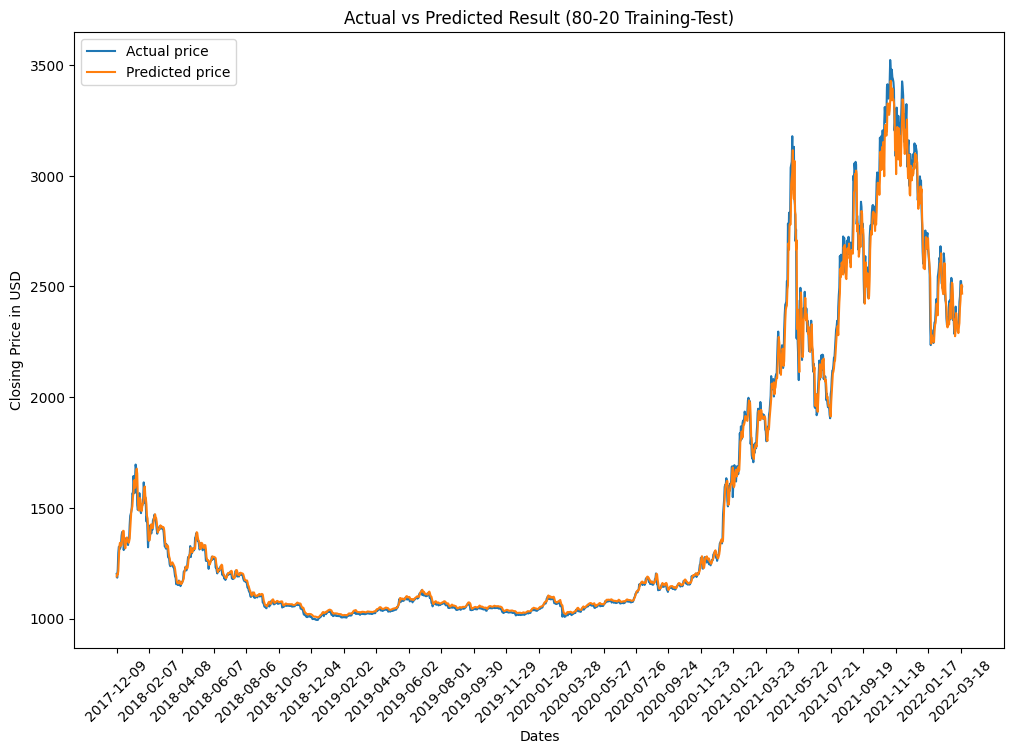

In [86]:
plot_result_train(label_training2, training_result2, original_data, "Actual vs Predicted Result (80-20 Training-Test)")

           Dates          Actual Price       Predicted Price
1624  2022-04-21  [2987.4807129999995]   [3032.945556640625]
1625  2022-04-22  [2964.8356929999995]     [2947.8876953125]
1626  2022-04-23         [2938.114014]   [2928.889892578125]
1627  2022-04-24  [2922.7326659999994]       [2899.30859375]
1628  2022-04-25         [3009.393555]    [2884.31396484375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]  [1968.6070556640625]
1989  2023-04-21         [1849.999878]  [1932.0631103515625]
1990  2023-04-22  [1874.2286380000003]   [1865.855224609375]
1991  2023-04-23         [1862.062012]  [1861.2032470703125]
1992  2023-04-24         [1833.186401]  [1860.4998779296875]

[369 rows x 3 columns]


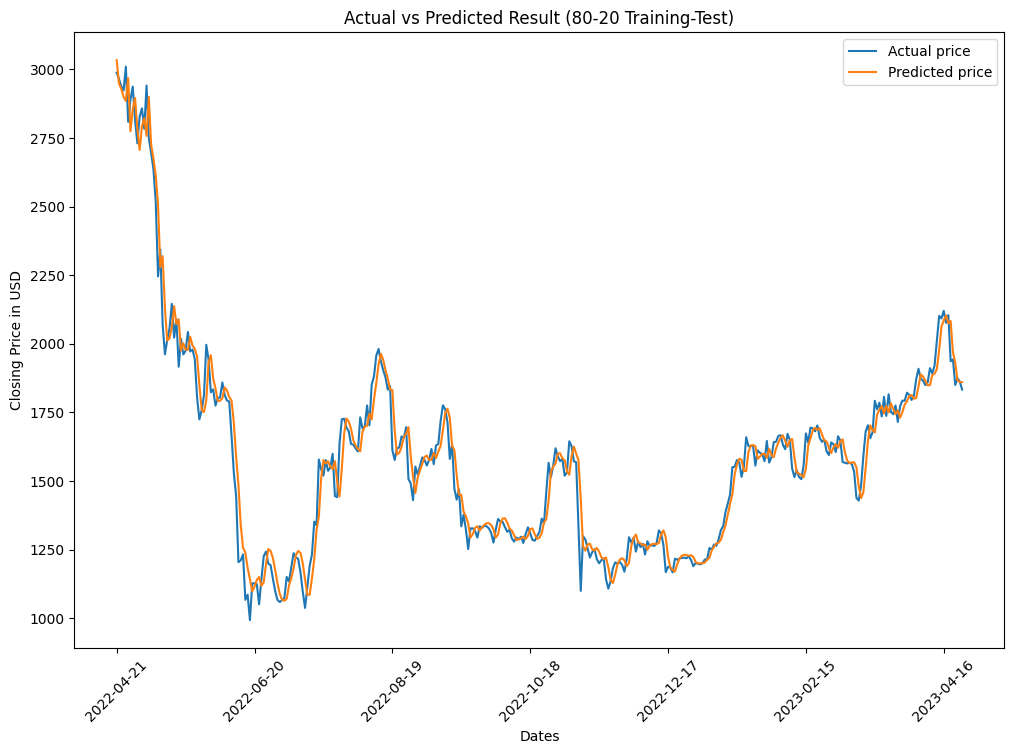

In [87]:
plot_result_test(label_test2, test_result2, label_training2.shape[0], original_data, "Actual vs Predicted Result (80-20 Training-Test)")

In [88]:
tf.backend.clear_session()

In [89]:
train_result3 = baseline_model.fit(x=feature_training3, y=label_training3, validation_data=(feature_test3, label_test3),
                                   epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model (the one with 75% training and 25% test data).

Epoch 1/100
46/46 [==============================] - 4s 69ms/step - loss: 2.9482e-04 - mean_squared_error: 2.9482e-04 - mean_absolute_error: 0.0086 - root_mean_squared_error: 0.0172 - val_loss: 7.2119e-04 - val_mean_squared_error: 7.2119e-04 - val_mean_absolute_error: 0.0188 - val_root_mean_squared_error: 0.0269
Epoch 2/100
46/46 [==============================] - 3s 63ms/step - loss: 6.9635e-04 - mean_squared_error: 6.9635e-04 - mean_absolute_error: 0.0141 - root_mean_squared_error: 0.0264 - val_loss: 8.2493e-04 - val_mean_squared_error: 8.2493e-04 - val_mean_absolute_error: 0.0197 - val_root_mean_squared_error: 0.0287
Epoch 3/100
46/46 [==============================] - 4s 98ms/step - loss: 5.6215e-04 - mean_squared_error: 5.6215e-04 - mean_absolute_error: 0.0135 - root_mean_squared_error: 0.0237 - val_loss: 8.0046e-04 - val_mean_squared_error: 8.0046e-04 - val_mean_absolute_error: 0.0204 - val_root_mean_squared_error: 0.0283
Epoch 4/100
46/46 [==============================] - 3s 63

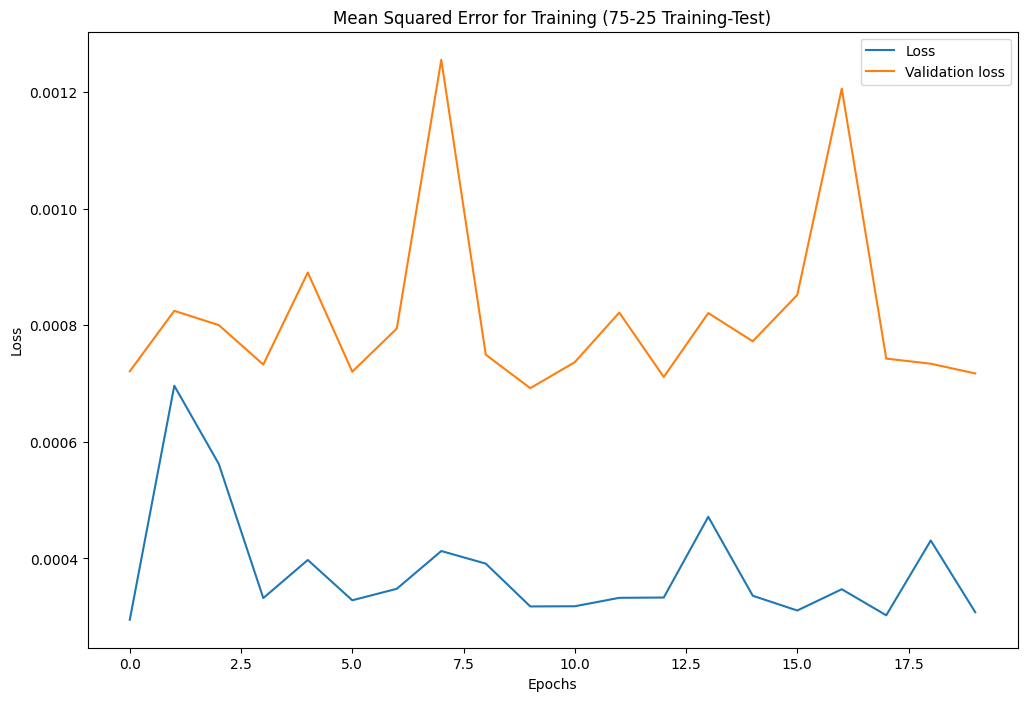

In [90]:
plot_loss(train_result3.history['loss'], train_result3.history['val_loss'], "Mean Squared Error for Training (75-25 Training-Test)")

In [91]:
baseline_model.evaluate(x=feature_test3, y=label_test3, verbose=1) # Now evaluate the model.

15/15 [==============================] - 0s 11ms/step - loss: 6.9216e-04 - mean_squared_error: 6.9216e-04 - mean_absolute_error: 0.0187 - root_mean_squared_error: 0.0263


[0.0006921623134985566,
 0.0006921623134985566,
 0.018683847039937973,
 0.026308977976441383]

In [92]:
training_predict3 = baseline_model.predict(feature_training3)
test_predict3 = baseline_model.predict(feature_test3)

15/15 [==============================] - 0s 9ms/step


In [93]:
# Restore the training and test datasets' original shapes.
training_result3 = normalizer.inverse_transform(training_predict3)
test_result3 = normalizer.inverse_transform(test_predict3)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1176.1795654296875]
31    2017-12-10  [1184.8400991863457]     [1188.6982421875]
32    2017-12-11  [1224.1145485841962]  [1181.5020751953125]
33    2017-12-12  [1297.0276373650145]   [1204.384033203125]
34    2017-12-13  [1324.4906040502817]  [1271.8004150390625]
...          ...                   ...                   ...
1489  2021-12-07  [3256.9420081048775]   [3228.423583984375]
1490  2021-12-08  [3323.4362344133992]   [3212.540771484375]
1491  2021-12-09   [3152.492427888083]   [3276.354736328125]
1492  2021-12-10  [3039.4437018576714]   [3124.318115234375]
1493  2021-12-11  [3133.5741769946194]   [3012.211181640625]

[1464 rows x 3 columns]


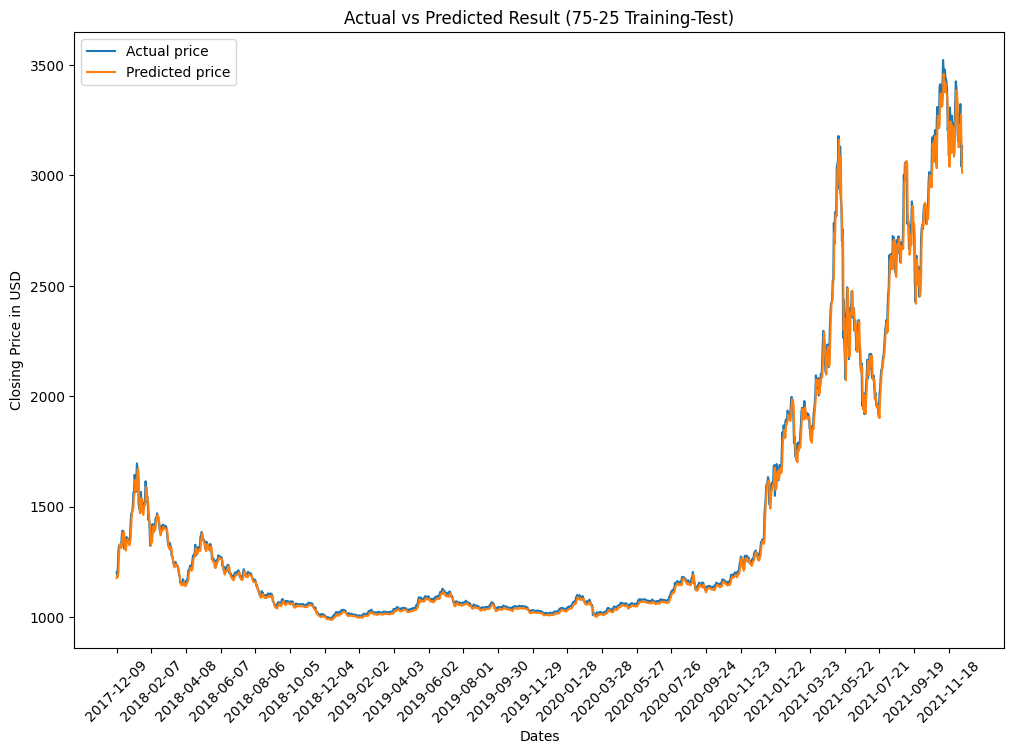

In [94]:
plot_result_train(label_training3, training_result3, original_data, "Actual vs Predicted Result (75-25 Training-Test)")

           Dates          Actual Price       Predicted Price
1524  2022-01-11   [2801.038948582125]     [2646.7470703125]
1525  2022-01-12   [2909.062923619399]   [2763.815673828125]
1526  2022-01-13   [2809.234155563298]     [2885.3154296875]
1527  2022-01-14   [2858.929529029035]   [2811.905029296875]
1528  2022-01-15  [2875.4611007132075]    [2856.29833984375]
...          ...                   ...                   ...
1988  2023-04-20  [1758.2065815334554]    [1773.73095703125]
1989  2023-04-21  [1683.2379846718977]  [1740.8978271484375]
1990  2023-04-22  [1702.7486129588096]   [1682.598876953125]
1991  2023-04-23  [1692.9512268196972]    [1679.03271484375]
1992  2023-04-24  [1669.6986413477844]  [1678.2650146484375]

[469 rows x 3 columns]


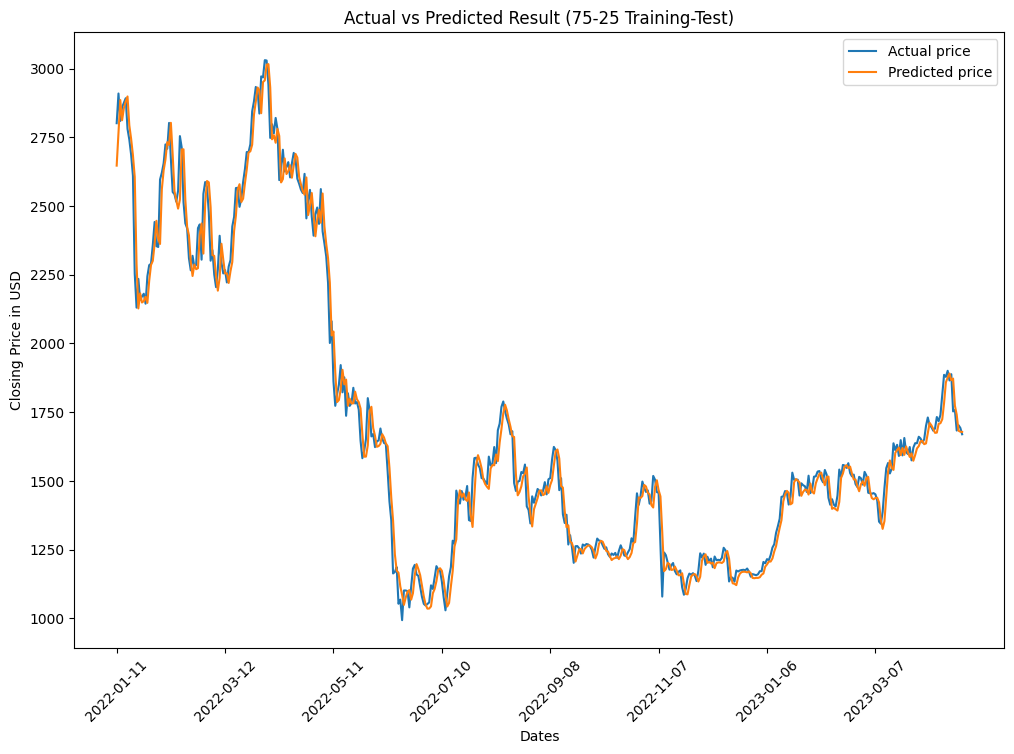

In [95]:
plot_result_test(label_test3, test_result3, label_training3.shape[0], original_data, "Actual vs Predicted Result (75-25 Training-Test)")

In [96]:
# Don't forget to clear the backend after each model is completed.
tf.backend.clear_session()

In [97]:
train_result4 = baseline_model.fit(x=feature_training4, y=label_training4, validation_data=(feature_test4, label_test4),
                                   epochs=100, verbose=1, callbacks=[callback], shuffle=True) # Fit the model (the one with the custom date range).

Epoch 1/100
50/50 [==============================] - 6s 90ms/step - loss: 4.0930e-04 - mean_squared_error: 4.0930e-04 - mean_absolute_error: 0.0127 - root_mean_squared_error: 0.0202 - val_loss: 8.0839e-04 - val_mean_squared_error: 8.0839e-04 - val_mean_absolute_error: 0.0192 - val_root_mean_squared_error: 0.0284
Epoch 2/100
50/50 [==============================] - 5s 101ms/step - loss: 3.6302e-04 - mean_squared_error: 3.6302e-04 - mean_absolute_error: 0.0109 - root_mean_squared_error: 0.0191 - val_loss: 7.3333e-04 - val_mean_squared_error: 7.3333e-04 - val_mean_absolute_error: 0.0184 - val_root_mean_squared_error: 0.0271
Epoch 3/100
50/50 [==============================] - 3s 65ms/step - loss: 3.5091e-04 - mean_squared_error: 3.5091e-04 - mean_absolute_error: 0.0108 - root_mean_squared_error: 0.0187 - val_loss: 7.2867e-04 - val_mean_squared_error: 7.2867e-04 - val_mean_absolute_error: 0.0188 - val_root_mean_squared_error: 0.0270
Epoch 4/100
50/50 [==============================] - 3s 6

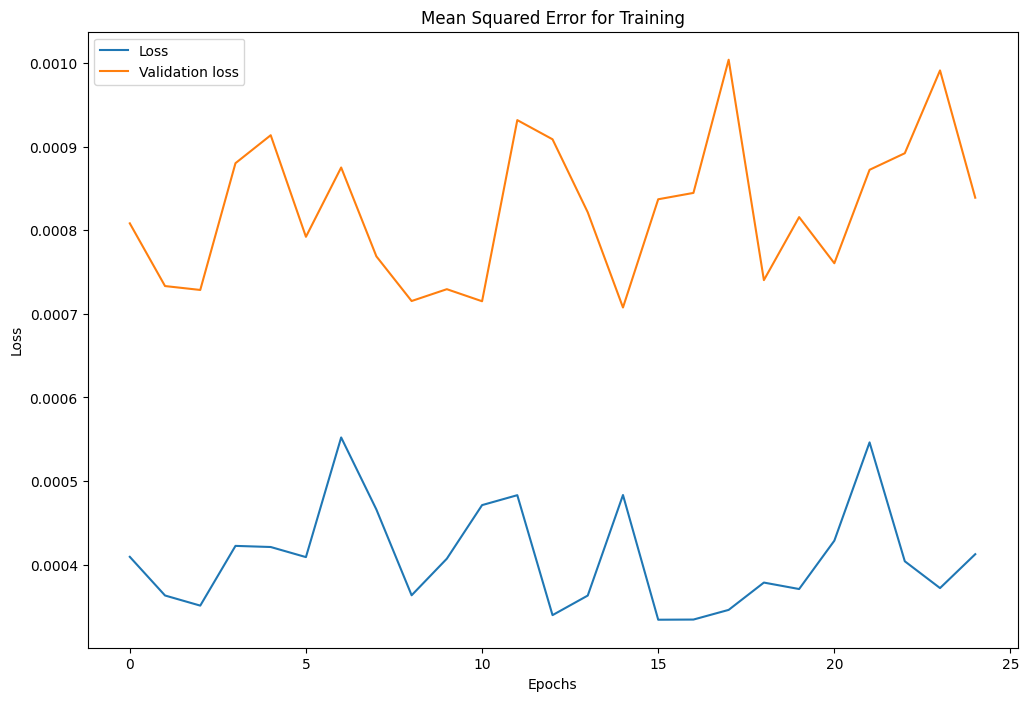

In [98]:
plot_loss(train_result4.history['loss'], train_result4.history['val_loss'])

In [99]:
baseline_model.evaluate(x=feature_test4, y=label_test4, verbose=1) # Now evaluate the model.

12/12 [==============================] - 0s 12ms/step - loss: 7.0768e-04 - mean_squared_error: 7.0768e-04 - mean_absolute_error: 0.0182 - root_mean_squared_error: 0.0266


[0.0007076770416460931,
 0.0007076770416460931,
 0.0182023998349905,
 0.02660219930112362]

In [100]:
training_predict4 = baseline_model.predict(feature_training4)
test_predict4 = baseline_model.predict(feature_test4)

12/12 [==============================] - 0s 10ms/step


In [101]:
# Restore the training and test datasets' original shapes.
training_result4 = normalizer.inverse_transform(training_predict4)
test_result4 = normalizer.inverse_transform(test_predict4)

In [102]:
print(training_result4.shape)
print(test_result4.shape)

(1574, 1)
(359, 1)


           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1191.6578369140625]
31    2017-12-10  [1184.8400991863457]  [1202.3397216796875]
32    2017-12-11  [1224.1145485841962]     [1189.4091796875]
33    2017-12-12  [1297.0276373650145]   [1220.937255859375]
34    2017-12-13  [1324.4906040502817]  [1293.4820556640625]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2600.570068359375]
1600  2022-03-28  [2733.5177311196053]   [2670.606689453125]
1601  2022-03-29  [2768.4794493421177]    [2697.84521484375]
1602  2022-03-30  [2759.4760758914417]   [2731.970458984375]
1603  2022-03-31   [2704.099092600401]   [2727.089111328125]

[1574 rows x 3 columns]


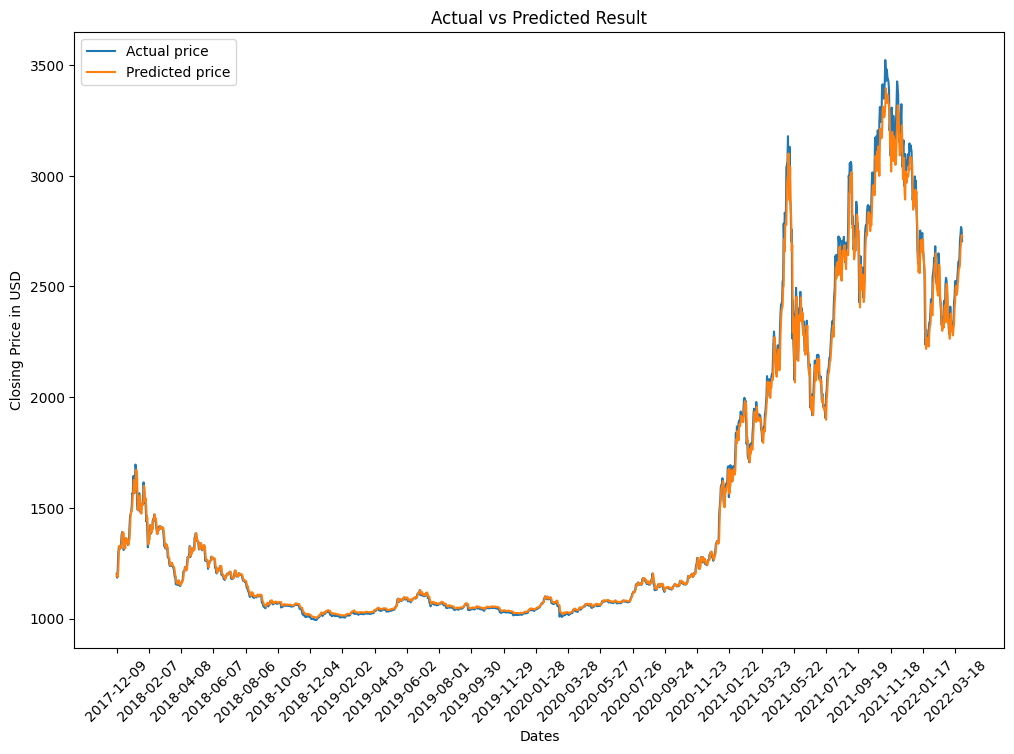

In [103]:
plot_result_train(label_training4, training_result4, original_data)

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2694.39794921875]
1635  2022-05-02           [2857.4104]     [2779.6728515625]
1636  2022-05-03         [2783.476318]   [2811.808837890625]
1637  2022-05-04         [2940.644775]      [2748.166015625]
1638  2022-05-05         [2749.213135]    [2884.89306640625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [1939.000732421875]
1989  2023-04-21         [1849.999878]   [1926.724365234375]
1990  2023-04-22  [1874.2286380000003]      [1847.697265625]
1991  2023-04-23         [1862.062012]    [1856.93212890625]
1992  2023-04-24         [1833.186401]  [1850.0291748046875]

[359 rows x 3 columns]


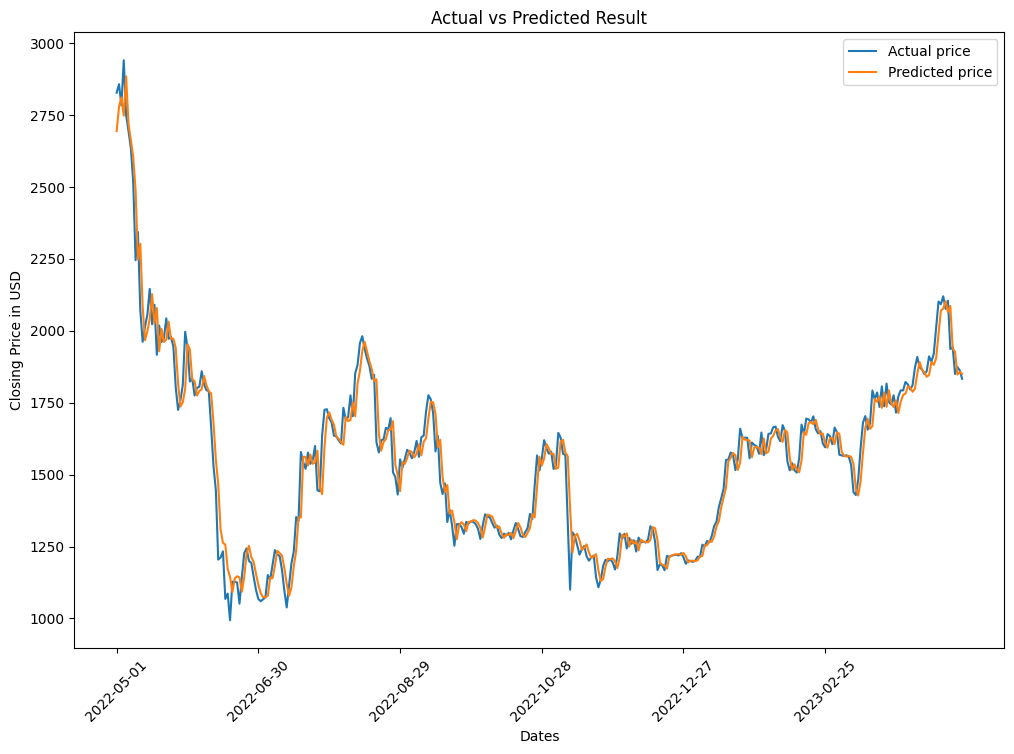

In [104]:
plot_result_test(label_test4, test_result4, label_training4.shape[0], original_data)

In [105]:
tf.backend.clear_session()

--------------------------------------------------------------------------------

# Part IV: Building the Improved Models

--------------------------------------------------------------------------------

## Similar to the baseline model from above; this time, try to obtain
## better results in terms of accuracy and loss by adding additional
## layers in the model as well as adjusting the hyperparameters of each
## layer and changing the number of units.
## Furthermore, be sure to add or change the following properties of each layer:
- activation
- initializer
- dropout rate
- batch normalization parameters
- input shape

## With Dropout

In [106]:
improved_model_dropout = tf.models.Sequential()
improved_model_dropout.add(tf.layers.LSTM(units=128, activation='relu', input_shape=(num_steps, 1), return_sequences=True))
improved_model_dropout.add(tf.layers.Dropout(0.2))
improved_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_dropout.add(tf.layers.Dropout(0.2))
improved_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_dropout.add(tf.layers.Dropout(0.2))
improved_model_dropout.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_dropout.add(tf.layers.Dropout(0.2))
improved_model_dropout.add(tf.layers.LSTM(units=128))
improved_model_dropout.add(tf.layers.Dropout(0.2))
improved_model_dropout.add(tf.layers.Dense(1))
improved_model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           1

In [107]:
# Compile the model using Mean Squared Error as loss and Adam as optimizer.
improved_model_dropout.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [108]:
train_result = improved_model_dropout.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
43/43 [==============================] - 13s 97ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - mean_absolute_error: 0.0680 - root_mean_squared_error: 0.1193 - val_loss: 0.0159 - val_mean_squared_error: 0.0159 - val_mean_absolute_error: 0.0908 - val_root_mean_squared_error: 0.1262
Epoch 2/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0333 - root_mean_squared_error: 0.0602 - val_loss: 0.0088 - val_mean_squared_error: 0.0088 - val_mean_absolute_error: 0.0713 - val_root_mean_squared_error: 0.0937
Epoch 3/100
43/43 [==============================] - 4s 87ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0302 - root_mean_squared_error: 0.0570 - val_loss: 0.0101 - val_mean_squared_error: 0.0101 - val_mean_absolute_error: 0.0762 - val_root_mean_squared_error: 0.1004
Epoch 4/100
43/43 [==============================] - 3s 63ms/step - loss: 0.0035 - mean_squared_error: 0.

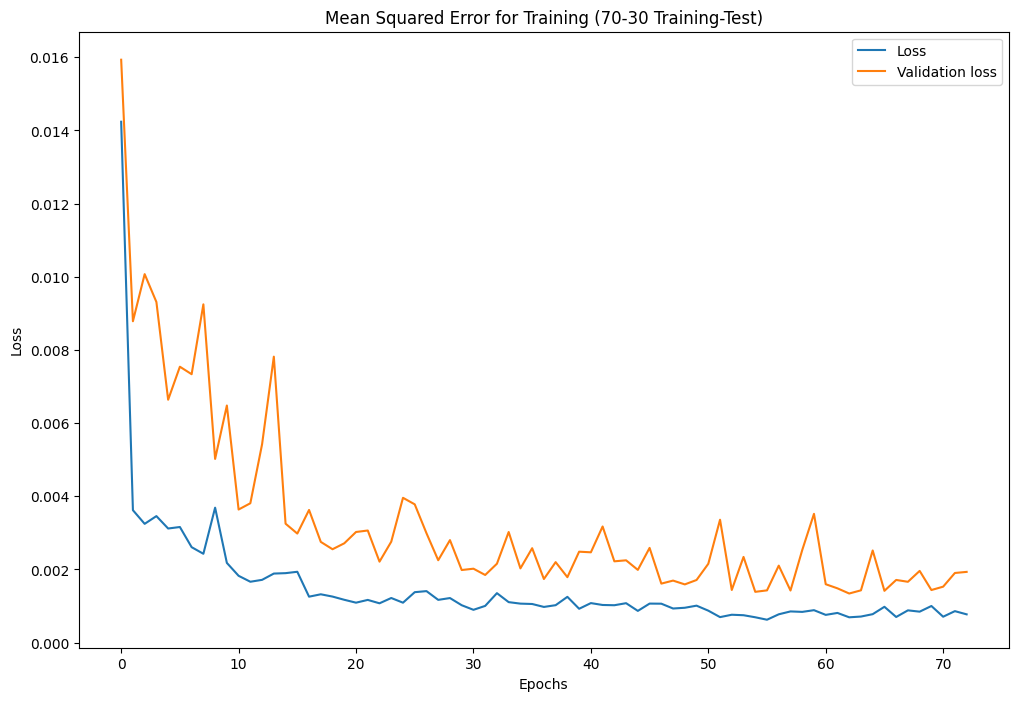

In [109]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (70-30 Training-Test)")

In [110]:
improved_model_dropout.evaluate(x=feature_test, y=label_test, verbose=1)

18/18 [==============================] - 0s 11ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0258 - root_mean_squared_error: 0.0366


[0.0013422071933746338,
 0.0013422071933746338,
 0.025805579498410225,
 0.036636147648096085]

In [111]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict = improved_model_dropout.predict(feature_training)
test_predict = improved_model_dropout.predict(feature_test)

18/18 [==============================] - 0s 9ms/step


In [112]:
training_result = normalizer.inverse_transform(training_predict)
test_result = normalizer.inverse_transform(test_predict)

           Dates          Actual Price       Predicted Price
30    2017-12-09  [1234.6389321772506]  [1212.4241943359375]
31    2017-12-10  [1214.9590388744555]  [1213.3511962890625]
32    2017-12-11  [1260.4201213168128]  [1215.4246826171875]
33    2017-12-12  [1344.8187059185636]  [1222.5430908203125]
34    2017-12-13  [1376.6077242684673]  [1245.7362060546875]
...          ...                   ...                   ...
1390  2021-08-30  [2938.0737588891357]    [2985.09228515625]
1391  2021-08-31  [3067.7156882441755]     [2996.2626953125]
1392  2021-09-01  [3316.0878082883187]       [3029.44921875]
1393  2021-09-02   [3288.941725518203]    [3117.53662109375]
1394  2021-09-03  [3381.5945268026167]    [3218.27880859375]

[1365 rows x 3 columns]


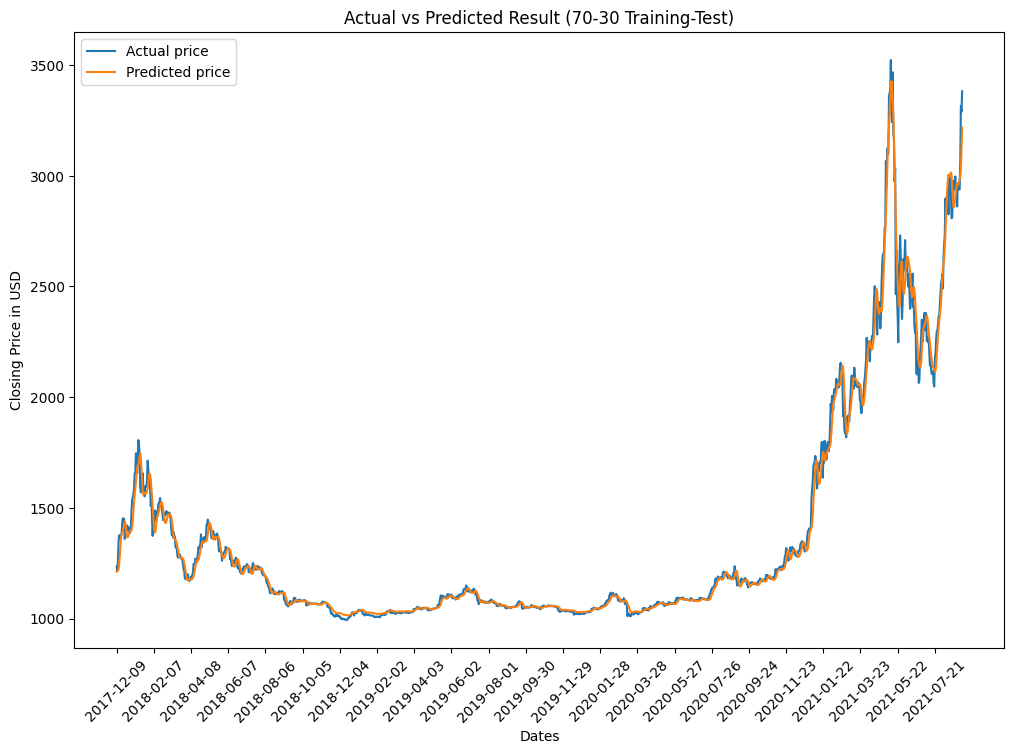

In [113]:
plot_result_train(label_training, training_result, original_data, "Actual vs Predicted Result (70-30 Training-Test)")

           Dates          Actual Price       Predicted Price
1425  2021-10-04  [2574.3321970574957]   [2508.659423828125]
1426  2021-10-05  [2666.0226049798393]    [2583.15283203125]
1427  2021-10-06   [2707.117835278116]   [2646.233642578125]
1428  2021-10-07  [2712.0278203738003]   [2705.832763671875]
1429  2021-10-08  [2695.9883415675076]     [2758.5419921875]
...          ...                   ...                   ...
1988  2023-04-20  [1622.5236158580235]    [1709.11376953125]
1989  2023-04-21  [1560.8591823760564]  [1674.4998779296875]
1990  2023-04-22   [1576.907393101027]    [1627.89208984375]
1991  2023-04-23   [1568.848681971778]     [1583.7119140625]
1992  2023-04-24   [1549.722573572492]   [1551.469482421875]

[568 rows x 3 columns]


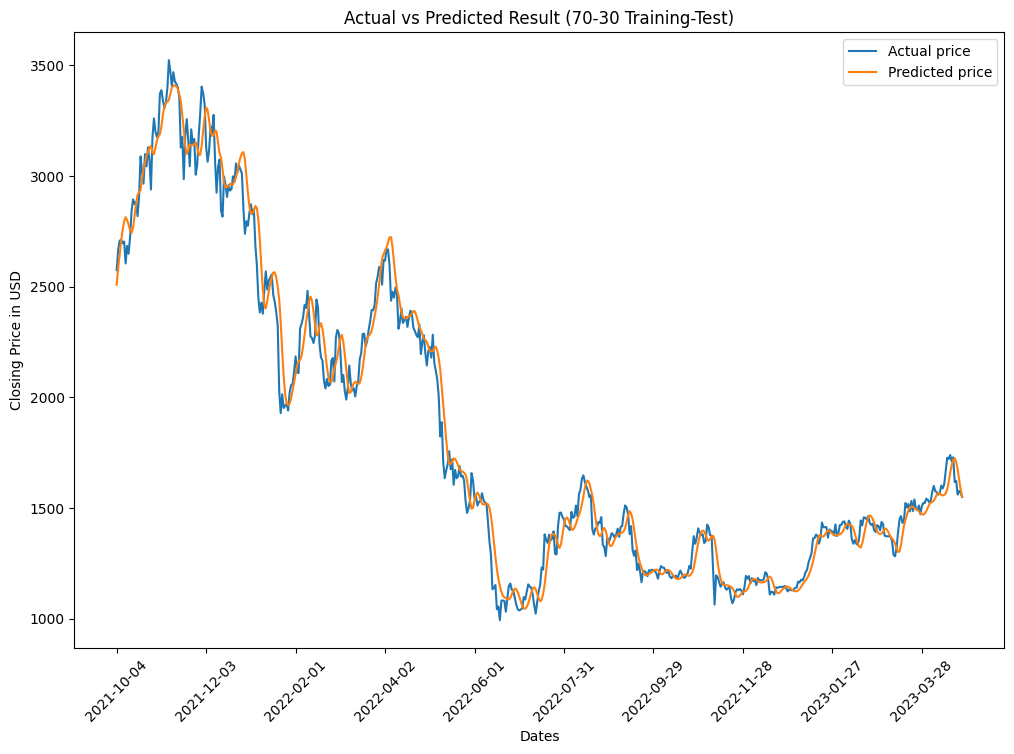

In [114]:
plot_result_test(label_test, test_result, label_training.shape[0], original_data, "Actual vs Predicted Result (70-30 Training-Test)")

In [115]:
tf.backend.clear_session()

In [116]:
train_result2 = improved_model_dropout.fit(x=feature_training2, y=label_training2, validation_data=(feature_test2, label_test2),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
49/49 [==============================] - 6s 79ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0221 - root_mean_squared_error: 0.0359 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - val_mean_absolute_error: 0.0350 - val_root_mean_squared_error: 0.0493
Epoch 2/100
49/49 [==============================] - 3s 61ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0215 - root_mean_squared_error: 0.0346 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0318 - val_root_mean_squared_error: 0.0454
Epoch 3/100
49/49 [==============================] - 3s 61ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0209 - root_mean_squared_error: 0.0351 - val_loss: 0.0036 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0430 - val_root_mean_squared_error: 0.0602
Epoch 4/100
49/49 [==============================] - 5s 95ms/step - loss: 0.0012 - mean_squared_error: 0.0

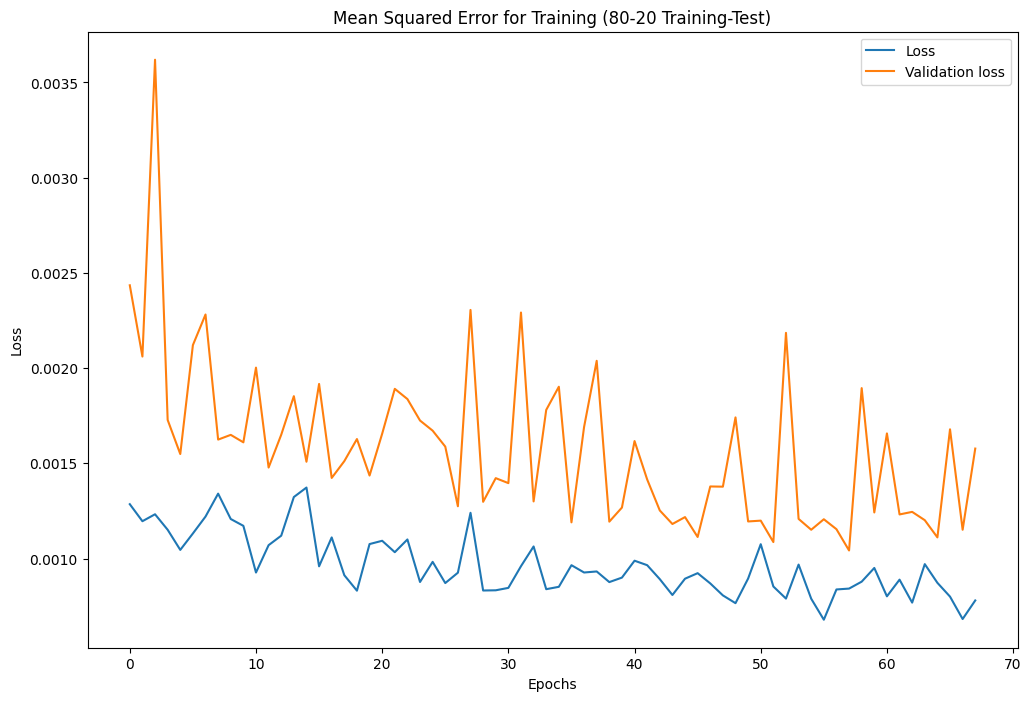

In [117]:
plot_loss(train_result2.history['loss'], train_result2.history['val_loss'], "Mean Squared Error for Training (80-20 Training-Test)")

In [118]:
improved_model_dropout.evaluate(x=feature_test2, y=label_test2, verbose=1)

12/12 [==============================] - 0s 12ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0227 - root_mean_squared_error: 0.0323


[0.0010421862825751305,
 0.0010421862825751305,
 0.022711588069796562,
 0.032282907515764236]

In [119]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict2 = improved_model_dropout.predict(feature_training2)
test_predict2 = improved_model_dropout.predict(feature_test2)

12/12 [==============================] - 0s 8ms/step


In [120]:
training_result2 = normalizer.inverse_transform(training_predict2)
test_result2 = normalizer.inverse_transform(test_predict2)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1199.1810302734375]
31    2017-12-10  [1184.8400991863457]  [1204.6124267578125]
32    2017-12-11  [1224.1145485841962]  [1205.5164794921875]
33    2017-12-12  [1297.0276373650145]  [1216.8363037109375]
34    2017-12-13  [1324.4906040502817]   [1261.230224609375]
...          ...                   ...                   ...
1589  2022-03-17    [2454.38363745047]    [2384.77294921875]
1590  2022-03-18   [2524.190441879222]     [2432.4697265625]
1591  2022-03-19  [2524.6794331279216]    [2489.84521484375]
1592  2022-03-20  [2478.7805791155456]   [2517.899658203125]
1593  2022-03-21  [2498.8510426076855]    [2502.75341796875]

[1564 rows x 3 columns]


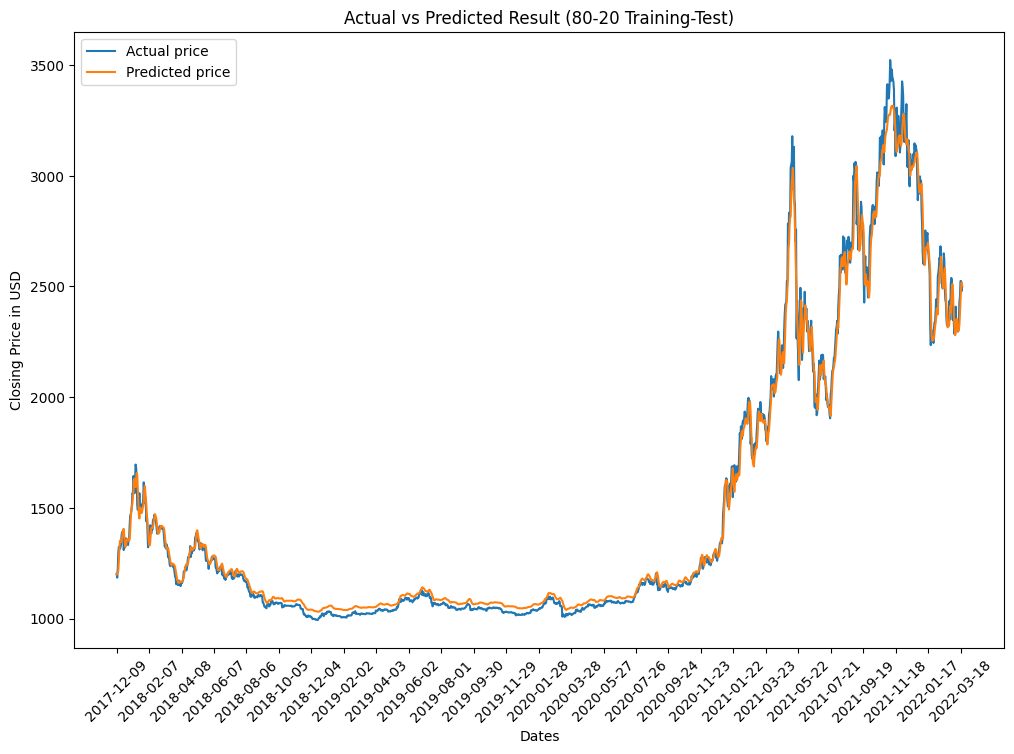

In [121]:
plot_result_train(label_training2, training_result2, original_data, "Actual vs Predicted Result (80-20 Training-Test)")

           Dates          Actual Price       Predicted Price
1624  2022-04-21  [2987.4807129999995]    [3049.14599609375]
1625  2022-04-22  [2964.8356929999995]    [3020.44677734375]
1626  2022-04-23         [2938.114014]   [2991.886474609375]
1627  2022-04-24  [2922.7326659999994]   [2965.067626953125]
1628  2022-04-25         [3009.393555]     [2941.6318359375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]    [2003.14404296875]
1989  2023-04-21         [1849.999878]  [1935.0858154296875]
1990  2023-04-22  [1874.2286380000003]  [1863.6343994140625]
1991  2023-04-23         [1862.062012]  [1830.6512451171875]
1992  2023-04-24         [1833.186401]    [1823.19384765625]

[369 rows x 3 columns]


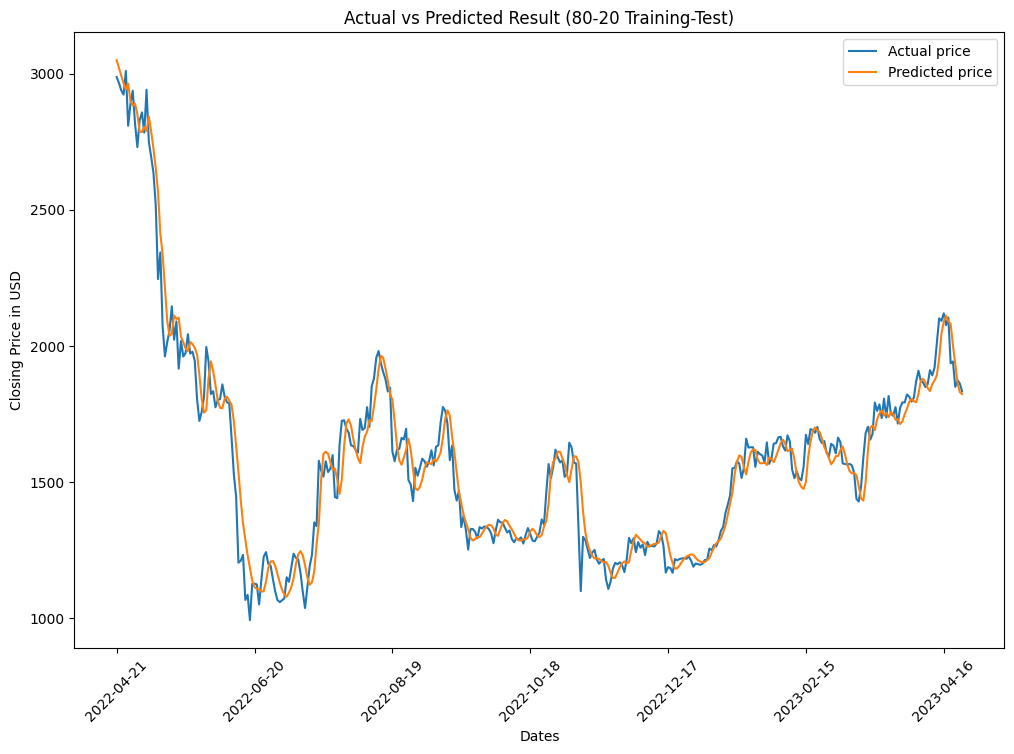

In [122]:
plot_result_test(label_test2, test_result2, label_training2.shape[0], original_data, "Actual vs Predicted Result (80-20 Training-Test)")

In [123]:
tf.backend.clear_session()

In [124]:
train_result3 = improved_model_dropout.fit(x=feature_training3, y=label_training3, validation_data=(feature_test3, label_test3),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
46/46 [==============================] - 6s 114ms/step - loss: 7.1167e-04 - mean_squared_error: 7.1167e-04 - mean_absolute_error: 0.0165 - root_mean_squared_error: 0.0267 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0253 - val_root_mean_squared_error: 0.0342
Epoch 2/100
46/46 [==============================] - 3s 68ms/step - loss: 7.4910e-04 - mean_squared_error: 7.4910e-04 - mean_absolute_error: 0.0178 - root_mean_squared_error: 0.0274 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0232 - val_root_mean_squared_error: 0.0325
Epoch 3/100
46/46 [==============================] - 3s 66ms/step - loss: 7.4286e-04 - mean_squared_error: 7.4286e-04 - mean_absolute_error: 0.0165 - root_mean_squared_error: 0.0273 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0225 - val_root_mean_squared_error: 0.0317
Epoch 4/100
46/46 [==============================] - 3s 68ms/step - loss: 7.1305e

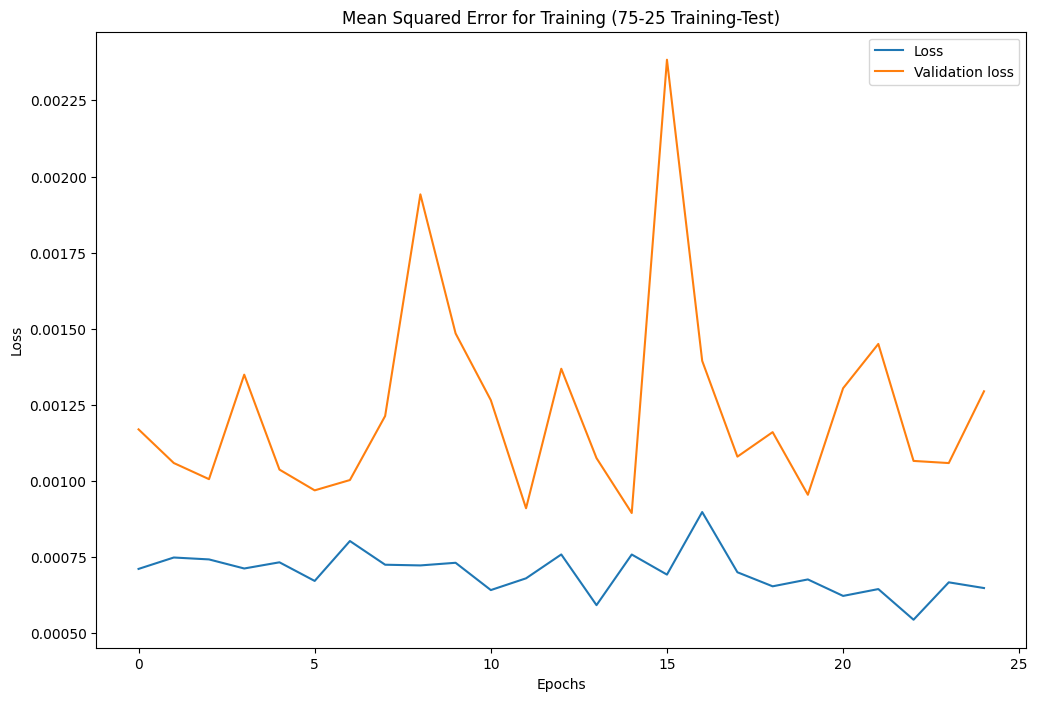

In [125]:
plot_loss(train_result3.history['loss'], train_result3.history['val_loss'], "Mean Squared Error for Training (75-25 Training-Test)")

In [126]:
improved_model_dropout.evaluate(x=feature_test3, y=label_test3, verbose=1)

15/15 [==============================] - 0s 11ms/step - loss: 8.9520e-04 - mean_squared_error: 8.9520e-04 - mean_absolute_error: 0.0212 - root_mean_squared_error: 0.0299


[0.0008952012867666781,
 0.0008952012867666781,
 0.02120654284954071,
 0.02991991490125656]

In [127]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict3 = improved_model_dropout.predict(feature_training3)
test_predict3 = improved_model_dropout.predict(feature_test3)

15/15 [==============================] - 0s 9ms/step


In [128]:
training_result3 = normalizer.inverse_transform(training_predict3)
test_result3 = normalizer.inverse_transform(test_predict3)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1203.8380126953125]
31    2017-12-10  [1184.8400991863457]  [1210.8370361328125]
32    2017-12-11  [1224.1145485841962]  [1211.2794189453125]
33    2017-12-12  [1297.0276373650145]   [1223.315185546875]
34    2017-12-13  [1324.4906040502817]  [1270.3035888671875]
...          ...                   ...                   ...
1489  2021-12-07  [3256.9420081048775]    [3200.40283203125]
1490  2021-12-08  [3323.4362344133992]    [3201.75439453125]
1491  2021-12-09   [3152.492427888083]    [3221.94677734375]
1492  2021-12-10  [3039.4437018576714]    [3192.01708984375]
1493  2021-12-11  [3133.5741769946194]       [3144.55859375]

[1464 rows x 3 columns]


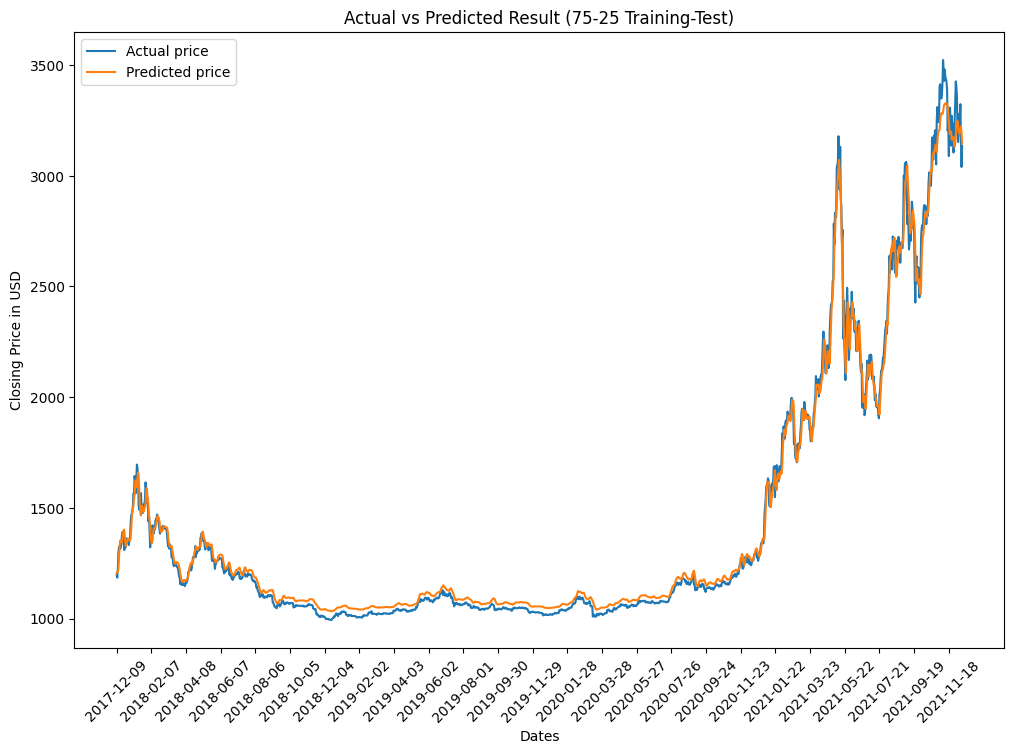

In [129]:
plot_result_train(label_training3, training_result3, original_data, "Actual vs Predicted Result (75-25 Training-Test)")

           Dates          Actual Price      Predicted Price
1524  2022-01-11   [2801.038948582125]  [2729.982177734375]
1525  2022-01-12   [2909.062923619399]  [2758.796142578125]
1526  2022-01-13   [2809.234155563298]  [2815.125732421875]
1527  2022-01-14   [2858.929529029035]  [2796.596435546875]
1528  2022-01-15  [2875.4611007132075]  [2804.246826171875]
...          ...                   ...                  ...
1988  2023-04-20  [1758.2065815334554]  [1811.024169921875]
1989  2023-04-21  [1683.2379846718977]      [1756.51953125]
1990  2023-04-22  [1702.7486129588096]  [1699.227294921875]
1991  2023-04-23  [1692.9512268196972]   [1675.19970703125]
1992  2023-04-24  [1669.6986413477844]  [1670.966552734375]

[469 rows x 3 columns]


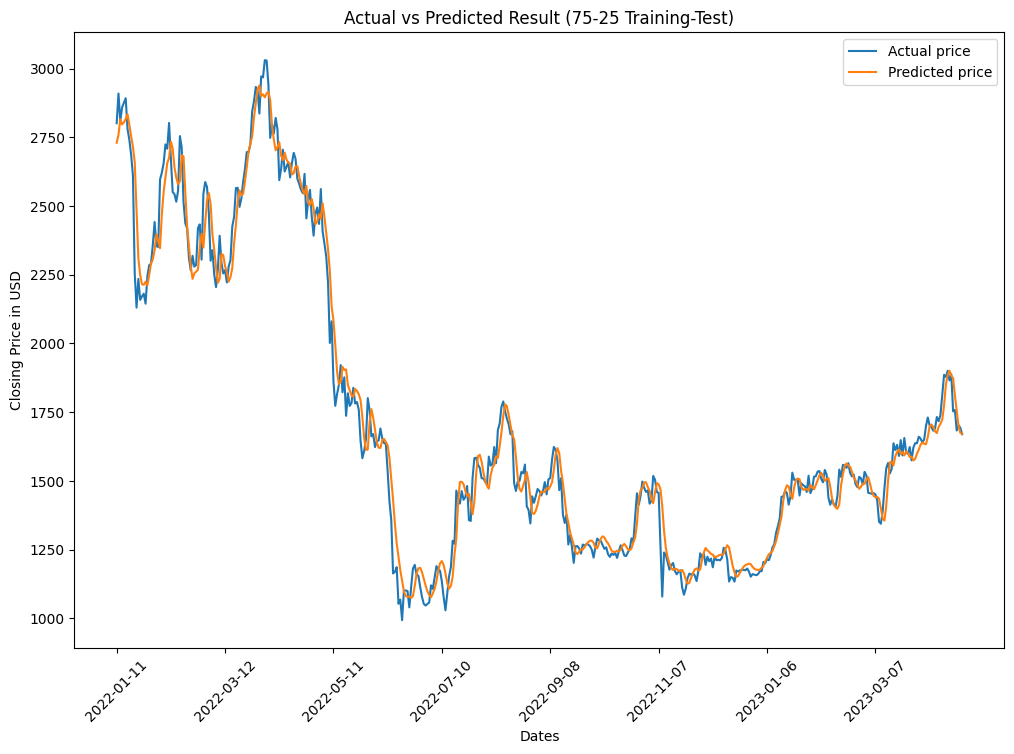

In [130]:
plot_result_test(label_test3, test_result3, label_training3.shape[0], original_data, "Actual vs Predicted Result (75-25 Training-Test)")

In [131]:
tf.backend.clear_session()

In [132]:
train_result4 = improved_model_dropout.fit(x=feature_training4, y=label_training4, validation_data=(feature_test4, label_test4),
                                   epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
50/50 [==============================] - 5s 67ms/step - loss: 8.2118e-04 - mean_squared_error: 8.2118e-04 - mean_absolute_error: 0.0179 - root_mean_squared_error: 0.0287 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0234 - val_root_mean_squared_error: 0.0320
Epoch 2/100
50/50 [==============================] - 3s 59ms/step - loss: 8.5538e-04 - mean_squared_error: 8.5538e-04 - mean_absolute_error: 0.0187 - root_mean_squared_error: 0.0292 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0248 - val_root_mean_squared_error: 0.0343
Epoch 3/100
50/50 [==============================] - 5s 95ms/step - loss: 8.0414e-04 - mean_squared_error: 8.0414e-04 - mean_absolute_error: 0.0176 - root_mean_squared_error: 0.0284 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0271 - val_root_mean_squared_error: 0.0387
Epoch 4/100
50/50 [==============================] - 3s 59ms/step - loss: 7.5266e-

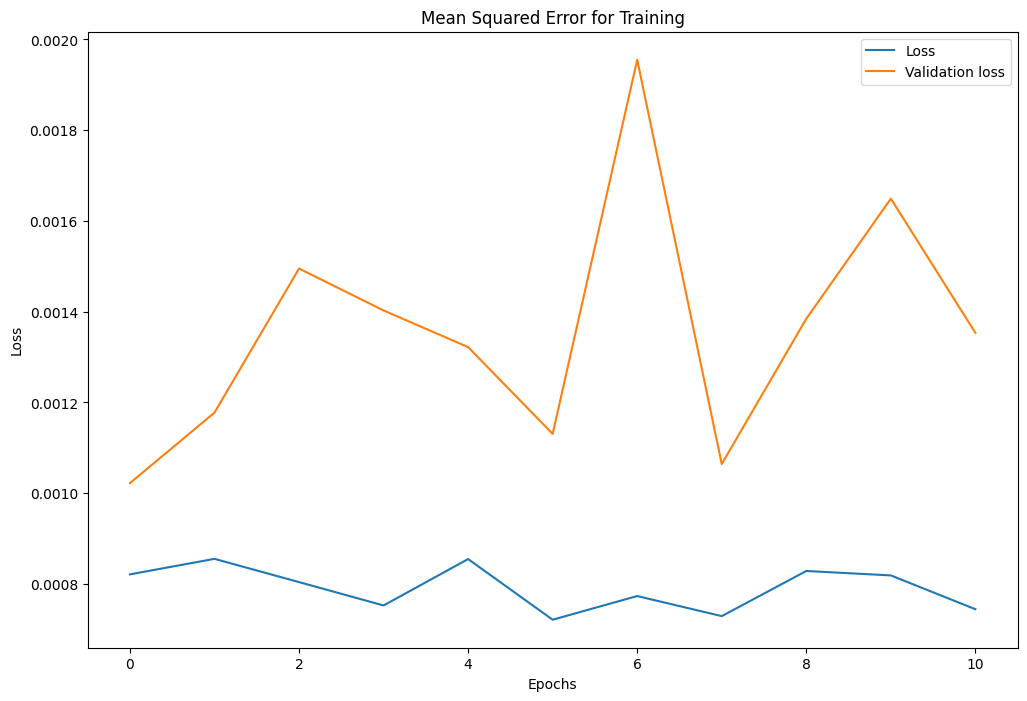

In [133]:
plot_loss(train_result4.history['loss'], train_result4.history['val_loss'])

In [134]:
improved_model_dropout.evaluate(x=feature_test4, y=label_test4, verbose=1)

12/12 [==============================] - 0s 12ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0320


[0.0010222640121355653,
 0.0010222640121355653,
 0.023360393941402435,
 0.03197286278009415]

In [135]:
training_predict4 = improved_model_dropout.predict(feature_training4)
test_predict4 = improved_model_dropout.predict(feature_test4)

12/12 [==============================] - 0s 8ms/step


In [136]:
# Restore the training and test datasets' original shapes.
training_result4 = normalizer.inverse_transform(training_predict4)
test_result4 = normalizer.inverse_transform(test_predict4)

In [137]:
print(training_result4.shape)
print(test_result4.shape)

(1574, 1)
(359, 1)


           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1188.302490234375]
31    2017-12-10  [1184.8400991863457]  [1195.7647705078125]
32    2017-12-11  [1224.1145485841962]   [1195.997314453125]
33    2017-12-12  [1297.0276373650145]  [1209.0775146484375]
34    2017-12-13  [1324.4906040502817]   [1259.220458984375]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2573.317626953125]
1600  2022-03-28  [2733.5177311196053]   [2625.653564453125]
1601  2022-03-29  [2768.4794493421177]   [2665.165283203125]
1602  2022-03-30  [2759.4760758914417]      [2699.462890625]
1603  2022-03-31   [2704.099092600401]    [2705.48876953125]

[1574 rows x 3 columns]


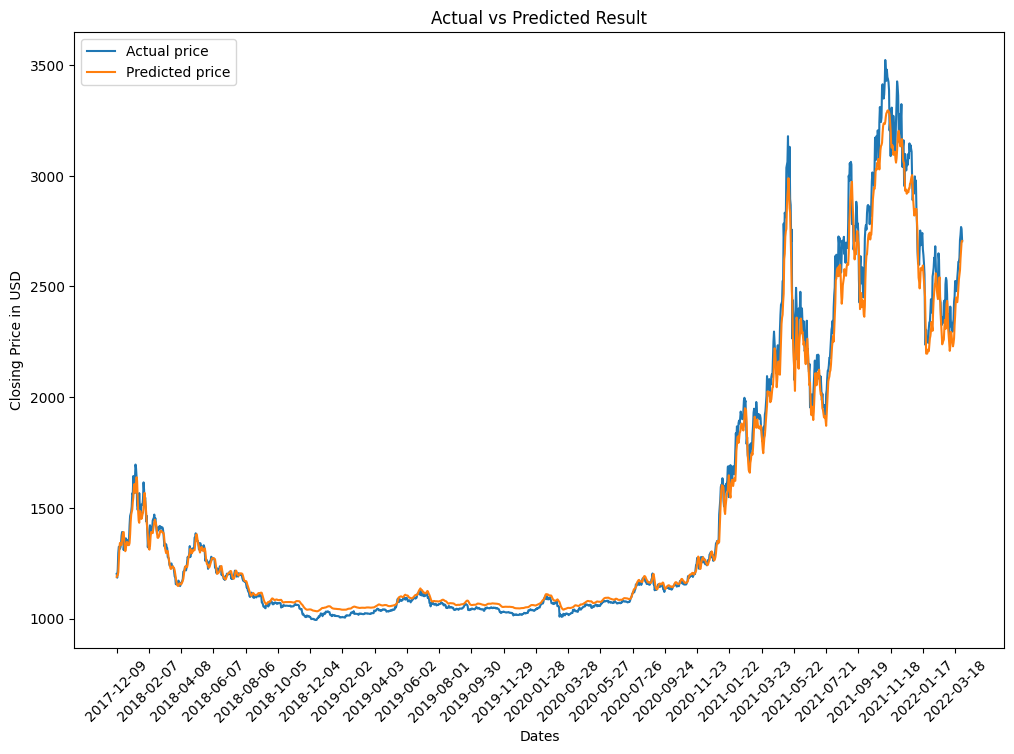

In [138]:
plot_result_train(label_training4, training_result4, original_data)

           Dates          Actual Price      Predicted Price
1634  2022-05-01         [2827.756104]    [2668.4541015625]
1635  2022-05-02           [2857.4104]   [2682.25927734375]
1636  2022-05-03         [2783.476318]  [2711.272216796875]
1637  2022-05-04         [2940.644775]  [2685.474365234375]
1638  2022-05-05         [2749.213135]   [2742.72802734375]
...          ...                   ...                  ...
1988  2023-04-20         [1943.097656]   [1956.94482421875]
1989  2023-04-21         [1849.999878]    [1888.5888671875]
1990  2023-04-22  [1874.2286380000003]  [1816.144287109375]
1991  2023-04-23         [1862.062012]  [1792.365478515625]
1992  2023-04-24         [1833.186401]  [1793.724365234375]

[359 rows x 3 columns]


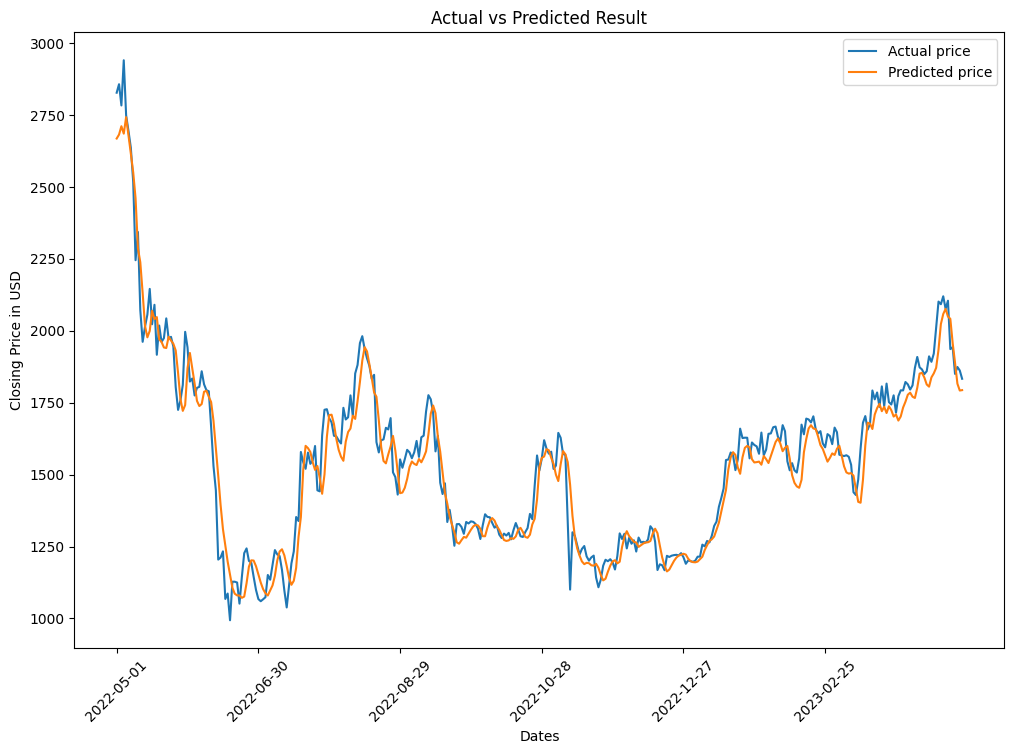

In [139]:
plot_result_test(label_test4, test_result4, label_training4.shape[0], original_data)

In [140]:
tf.backend.clear_session()

## With Regularizers

In [141]:
# Try using L1 and L2 regularizers for this model.
improved_model_regularizer = tf.models.Sequential()
improved_model_regularizer.add(tf.layers.LSTM(units=128, activation="relu", input_shape=(num_steps, 1),
                                                     kernel_regularizer="l1_l2", return_sequences=True))
improved_model_regularizer.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_regularizer.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_regularizer.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_regularizer.add(tf.layers.LSTM(units=128))
improved_model_regularizer.add(tf.layers.Dense(1))
improved_model_regularizer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           131584    
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 593,025
Trainable params: 593,025
Non-trai

In [142]:
improved_model_regularizer.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [143]:
train_result = improved_model_regularizer.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
43/43 [==============================] - 13s 96ms/step - loss: 0.1994 - mean_squared_error: 0.0091 - mean_absolute_error: 0.0572 - root_mean_squared_error: 0.0956 - val_loss: 0.1189 - val_mean_squared_error: 0.0123 - val_mean_absolute_error: 0.0844 - val_root_mean_squared_error: 0.1109
Epoch 2/100
43/43 [==============================] - 3s 63ms/step - loss: 0.0627 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0470 - root_mean_squared_error: 0.0706 - val_loss: 0.0312 - val_mean_squared_error: 0.0112 - val_mean_absolute_error: 0.0861 - val_root_mean_squared_error: 0.1060
Epoch 3/100
43/43 [==============================] - 3s 63ms/step - loss: 0.0136 - mean_squared_error: 0.0044 - mean_absolute_error: 0.0419 - root_mean_squared_error: 0.0665 - val_loss: 0.0181 - val_mean_squared_error: 0.0134 - val_mean_absolute_error: 0.0887 - val_root_mean_squared_error: 0.1159
Epoch 4/100
43/43 [==============================] - 4s 104ms/step - loss: 0.0078 - mean_squared_error: 0

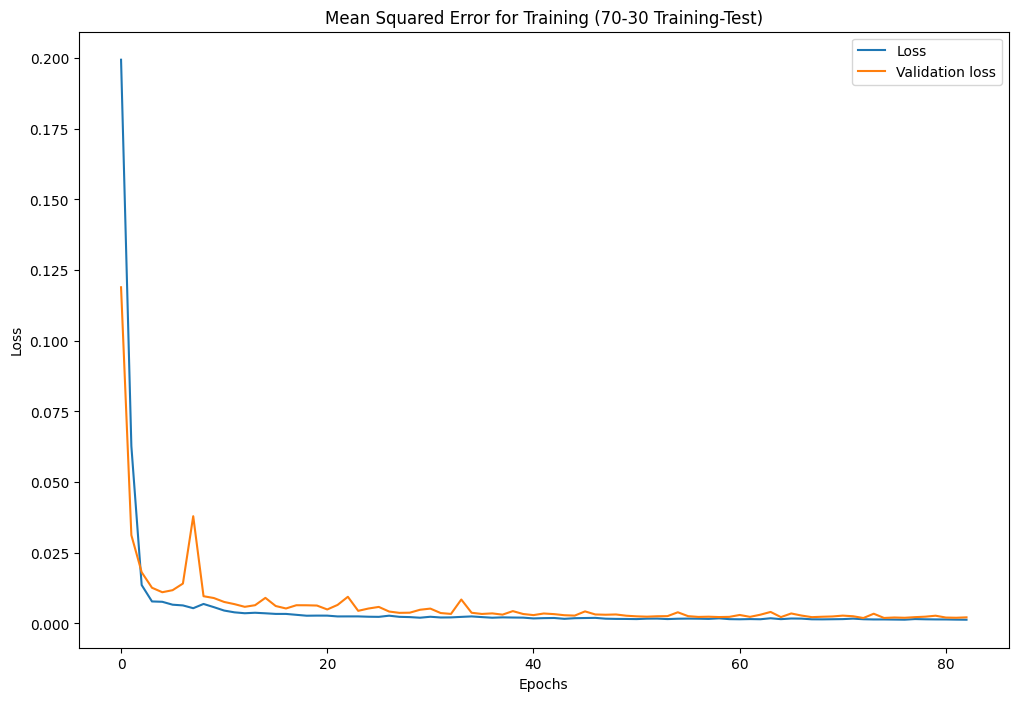

In [144]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (70-30 Training-Test)")

In [145]:
improved_model_regularizer.evaluate(x=feature_test, y=label_test, verbose=1)

18/18 [==============================] - 0s 11ms/step - loss: 0.0019 - mean_squared_error: 9.4081e-04 - mean_absolute_error: 0.0219 - root_mean_squared_error: 0.0307


[0.0019165122648701072,
 0.0009408137993887067,
 0.02193375490605831,
 0.03067268803715706]

In [146]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict = improved_model_regularizer.predict(feature_training)
test_predict = improved_model_regularizer.predict(feature_test)

18/18 [==============================] - 0s 8ms/step


In [147]:
training_result = normalizer.inverse_transform(training_predict)
test_result = normalizer.inverse_transform(test_predict)

           Dates          Actual Price       Predicted Price
30    2017-12-09  [1234.6389321772506]   [1223.201904296875]
31    2017-12-10  [1214.9590388744555]    [1226.22314453125]
32    2017-12-11  [1260.4201213168128]  [1229.8265380859375]
33    2017-12-12  [1344.8187059185636]  [1236.8187255859375]
34    2017-12-13  [1376.6077242684673]  [1260.9005126953125]
...          ...                   ...                   ...
1390  2021-08-30  [2938.0737588891357]     [2947.1005859375]
1391  2021-08-31  [3067.7156882441755]   [2936.396240234375]
1392  2021-09-01  [3316.0878082883187]     [3034.7958984375]
1393  2021-09-02   [3288.941725518203]    [3254.50732421875]
1394  2021-09-03  [3381.5945268026167]    [3302.44287109375]

[1365 rows x 3 columns]


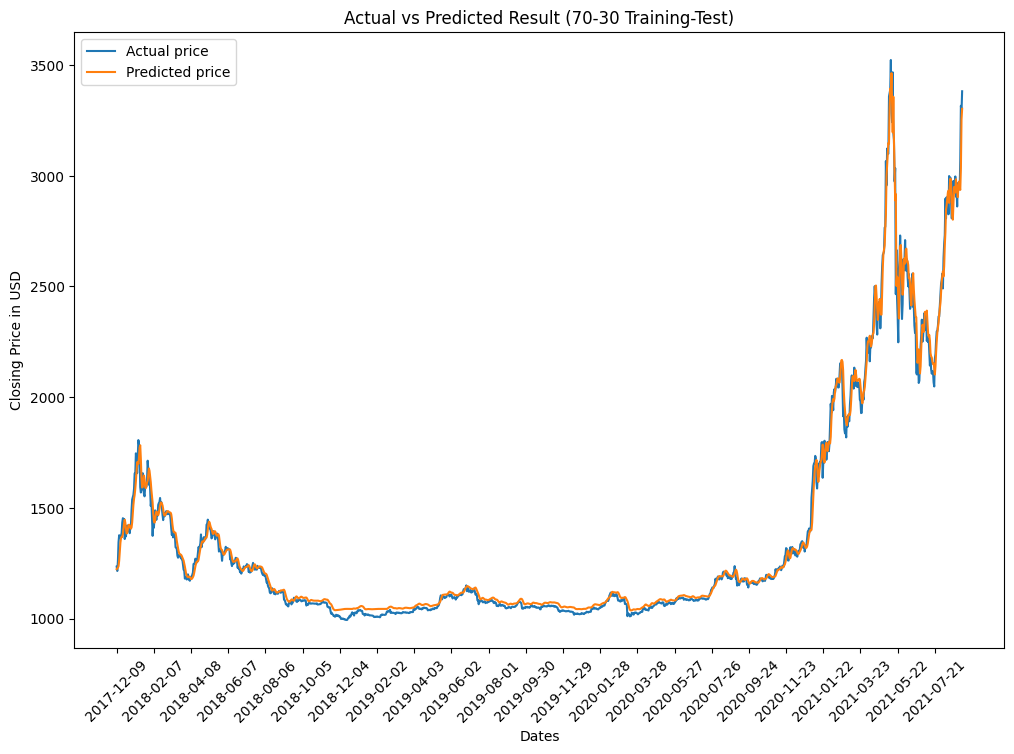

In [148]:
plot_result_train(label_training, training_result, original_data, "Actual vs Predicted Result (70-30 Training-Test)")

           Dates          Actual Price       Predicted Price
1425  2021-10-04  [2574.3321970574957]   [2610.623291015625]
1426  2021-10-05  [2666.0226049798393]     [2604.7646484375]
1427  2021-10-06   [2707.117835278116]   [2662.678466796875]
1428  2021-10-07  [2712.0278203738003]   [2746.713623046875]
1429  2021-10-08  [2695.9883415675076]    [2774.38525390625]
...          ...                   ...                   ...
1988  2023-04-20  [1622.5236158580235]   [1696.463623046875]
1989  2023-04-21  [1560.8591823760564]      [1657.556640625]
1990  2023-04-22   [1576.907393101027]  [1618.2271728515625]
1991  2023-04-23   [1568.848681971778]     [1595.5048828125]
1992  2023-04-24   [1549.722573572492]     [1589.1748046875]

[568 rows x 3 columns]


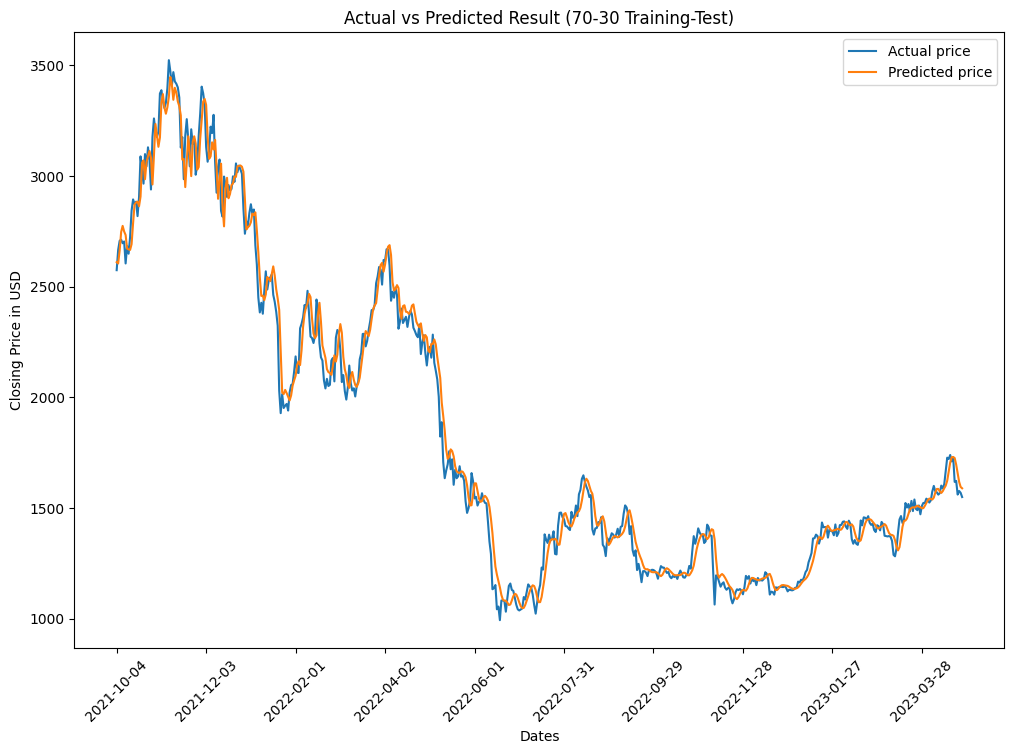

In [149]:
plot_result_test(label_test, test_result, label_training.shape[0], original_data, "Actual vs Predicted Result (70-30 Training-Test)")

In [150]:
tf.backend.clear_session()

In [151]:
train_result2 = improved_model_regularizer.fit(x=feature_training2, y=label_training2, validation_data=(feature_test2, label_test2),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
49/49 [==============================] - 5s 73ms/step - loss: 0.0015 - mean_squared_error: 5.6544e-04 - mean_absolute_error: 0.0160 - root_mean_squared_error: 0.0238 - val_loss: 0.0023 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0258 - val_root_mean_squared_error: 0.0359
Epoch 2/100
49/49 [==============================] - 4s 87ms/step - loss: 0.0015 - mean_squared_error: 5.8996e-04 - mean_absolute_error: 0.0165 - root_mean_squared_error: 0.0243 - val_loss: 0.0026 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0327 - val_root_mean_squared_error: 0.0408
Epoch 3/100
49/49 [==============================] - 3s 59ms/step - loss: 0.0017 - mean_squared_error: 6.8704e-04 - mean_absolute_error: 0.0178 - root_mean_squared_error: 0.0262 - val_loss: 0.0027 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0319 - val_root_mean_squared_error: 0.0420
Epoch 4/100
49/49 [==============================] - 3s 58ms/step - loss: 0.0015 - mean_square

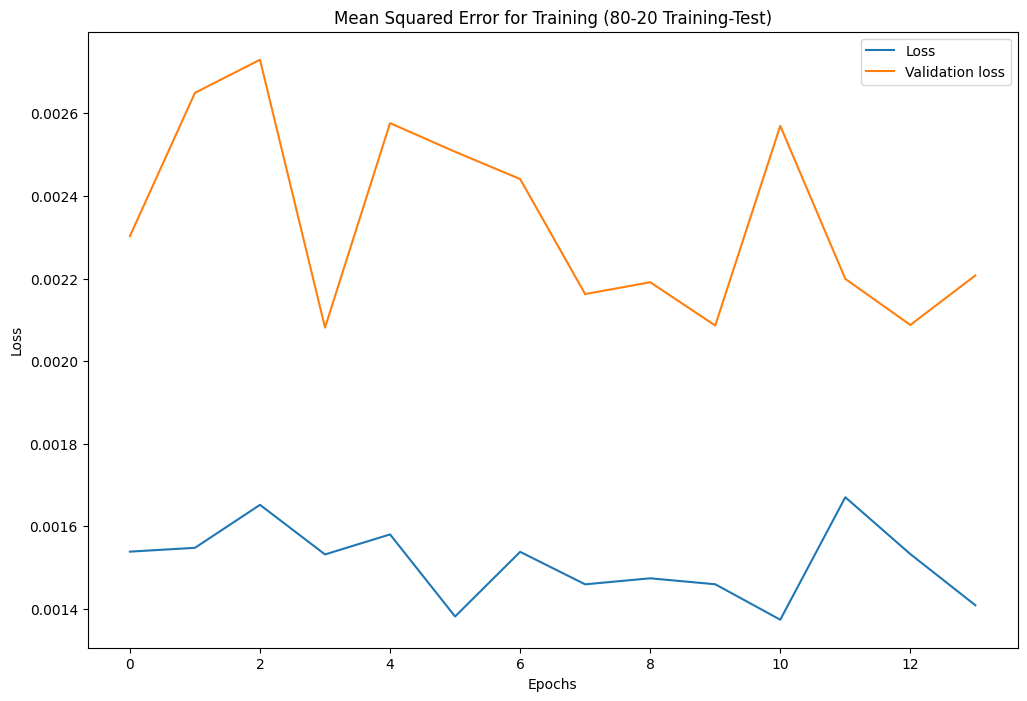

In [152]:
plot_loss(train_result2.history['loss'], train_result2.history['val_loss'], "Mean Squared Error for Training (80-20 Training-Test)")

In [153]:
improved_model_regularizer.evaluate(x=feature_test2, y=label_test2, verbose=1)

12/12 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0334


[0.0020812719594687223,
 0.0011156578548252583,
 0.023454604670405388,
 0.03340146318078041]

In [154]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict2 = improved_model_regularizer.predict(feature_training2)
test_predict2 = improved_model_regularizer.predict(feature_test2)

12/12 [==============================] - 0s 12ms/step


In [155]:
training_result2 = normalizer.inverse_transform(training_predict2)
test_result2 = normalizer.inverse_transform(test_predict2)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1205.239501953125]
31    2017-12-10  [1184.8400991863457]    [1208.51513671875]
32    2017-12-11  [1224.1145485841962]  [1211.2906494140625]
33    2017-12-12  [1297.0276373650145]  [1217.9744873046875]
34    2017-12-13  [1324.4906040502817]  [1241.6033935546875]
...          ...                   ...                   ...
1589  2022-03-17    [2454.38363745047]    [2404.50732421875]
1590  2022-03-18   [2524.190441879222]     [2445.2275390625]
1591  2022-03-19  [2524.6794331279216]   [2498.038330078125]
1592  2022-03-20  [2478.7805791155456]      [2522.064453125]
1593  2022-03-21  [2498.8510426076855]   [2496.248291015625]

[1564 rows x 3 columns]


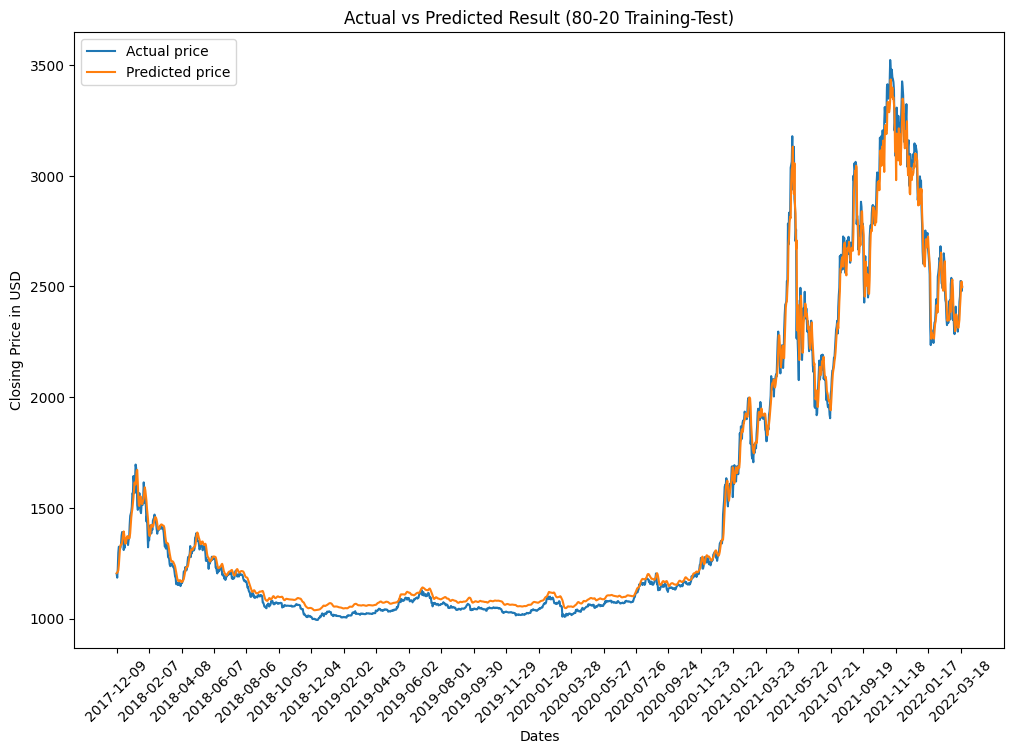

In [156]:
plot_result_train(label_training2, training_result2, original_data, "Actual vs Predicted Result (80-20 Training-Test)")

           Dates          Actual Price       Predicted Price
1624  2022-04-21  [2987.4807129999995]   [3035.690185546875]
1625  2022-04-22  [2964.8356929999995]   [2959.526611328125]
1626  2022-04-23         [2938.114014]    [2939.42041015625]
1627  2022-04-24  [2922.7326659999994]      [2909.931640625]
1628  2022-04-25         [3009.393555]    [2891.70361328125]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]    [2025.31103515625]
1989  2023-04-21         [1849.999878]    [1962.91748046875]
1990  2023-04-22  [1874.2286380000003]  [1901.9034423828125]
1991  2023-04-23         [1862.062012]   [1879.697021484375]
1992  2023-04-24         [1833.186401]     [1877.7900390625]

[369 rows x 3 columns]


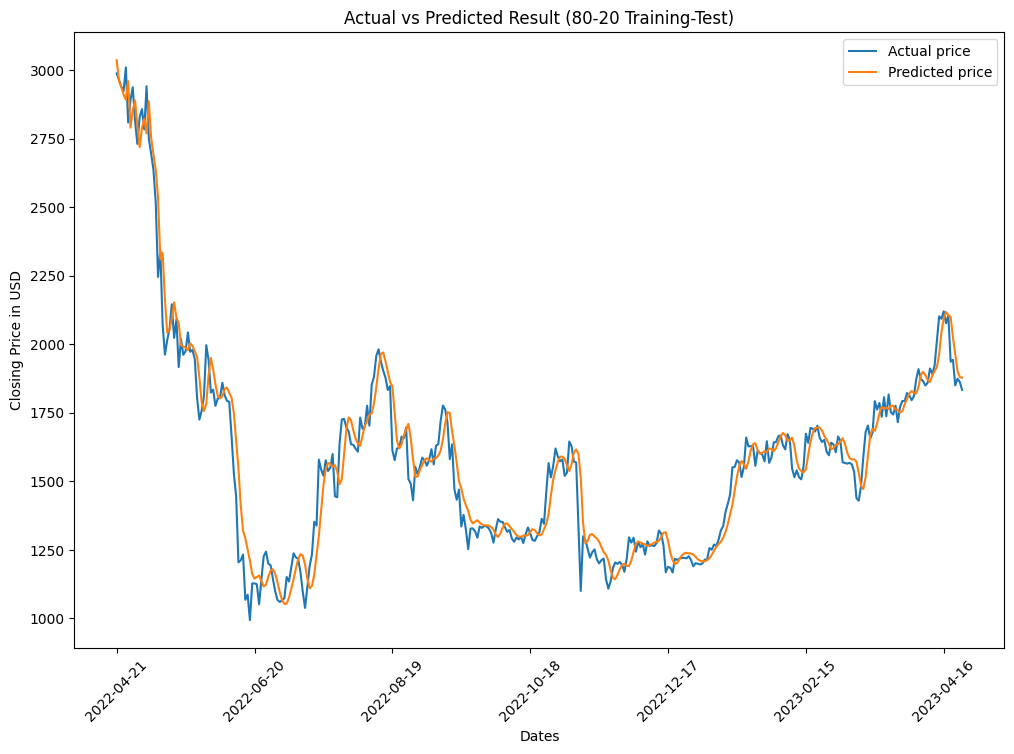

In [157]:
plot_result_test(label_test2, test_result2, label_training2.shape[0], original_data, "Actual vs Predicted Result (80-20 Training-Test)")

In [158]:
tf.backend.clear_session()

In [159]:
train_result3 = improved_model_regularizer.fit(x=feature_training3, y=label_training3, validation_data=(feature_test3, label_test3),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
46/46 [==============================] - 4s 69ms/step - loss: 0.0014 - mean_squared_error: 4.8694e-04 - mean_absolute_error: 0.0151 - root_mean_squared_error: 0.0221 - val_loss: 0.0020 - val_mean_squared_error: 9.9861e-04 - val_mean_absolute_error: 0.0237 - val_root_mean_squared_error: 0.0316
Epoch 2/100
46/46 [==============================] - 3s 63ms/step - loss: 0.0015 - mean_squared_error: 5.5658e-04 - mean_absolute_error: 0.0150 - root_mean_squared_error: 0.0236 - val_loss: 0.0019 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0228 - val_root_mean_squared_error: 0.0323
Epoch 3/100
46/46 [==============================] - 3s 76ms/step - loss: 0.0015 - mean_squared_error: 5.8734e-04 - mean_absolute_error: 0.0166 - root_mean_squared_error: 0.0242 - val_loss: 0.0021 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0253 - val_root_mean_squared_error: 0.0349
Epoch 4/100
46/46 [==============================] - 4s 86ms/step - loss: 0.0015 - mean_sq

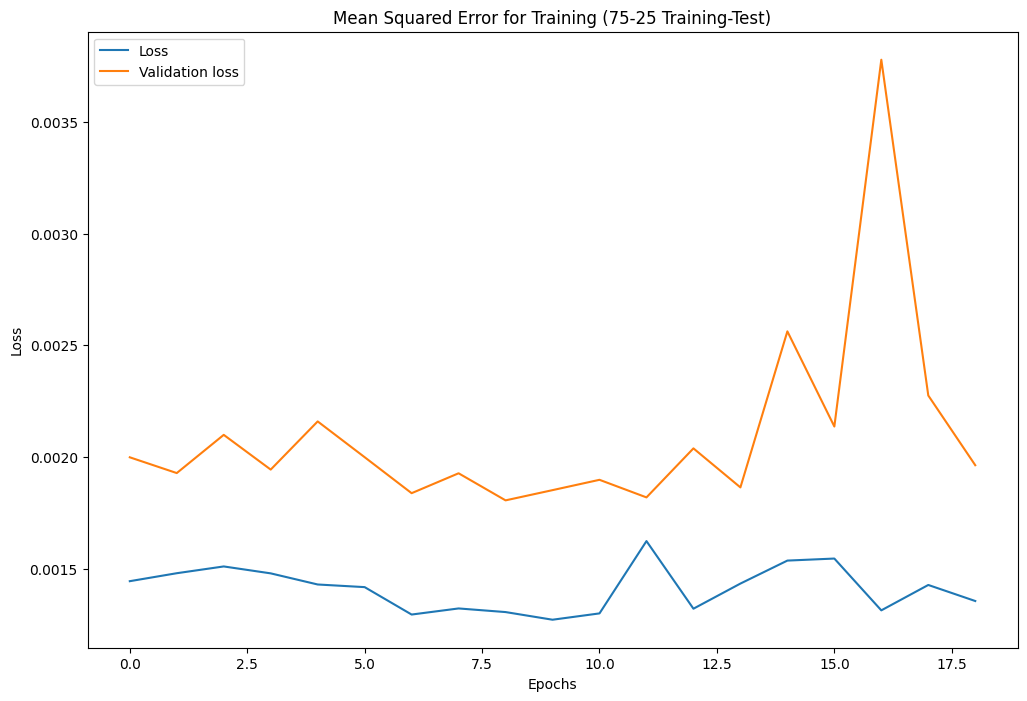

In [160]:
plot_loss(train_result3.history['loss'], train_result3.history['val_loss'], "Mean Squared Error for Training (75-25 Training-Test)")

In [161]:
improved_model_regularizer.evaluate(x=feature_test3, y=label_test3, verbose=1)

15/15 [==============================] - 0s 11ms/step - loss: 0.0018 - mean_squared_error: 9.4114e-04 - mean_absolute_error: 0.0221 - root_mean_squared_error: 0.0307


[0.0018071013037115335,
 0.0009411370847374201,
 0.022093337029218674,
 0.030677957460284233]

In [162]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict3 = improved_model_regularizer.predict(feature_training3)
test_predict3 = improved_model_regularizer.predict(feature_test3)

15/15 [==============================] - 0s 12ms/step


In [163]:
training_result3 = normalizer.inverse_transform(training_predict3)
test_result3 = normalizer.inverse_transform(test_predict3)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1202.8685302734375]
31    2017-12-10  [1184.8400991863457]  [1207.5782470703125]
32    2017-12-11  [1224.1145485841962]   [1210.690673828125]
33    2017-12-12  [1297.0276373650145]  [1218.1492919921875]
34    2017-12-13  [1324.4906040502817]   [1244.593505859375]
...          ...                   ...                   ...
1489  2021-12-07  [3256.9420081048775]   [3231.945556640625]
1490  2021-12-08  [3323.4362344133992]   [3197.806884765625]
1491  2021-12-09   [3152.492427888083]   [3260.380615234375]
1492  2021-12-10  [3039.4437018576714]        [3093.6171875]
1493  2021-12-11  [3133.5741769946194]   [3006.367431640625]

[1464 rows x 3 columns]


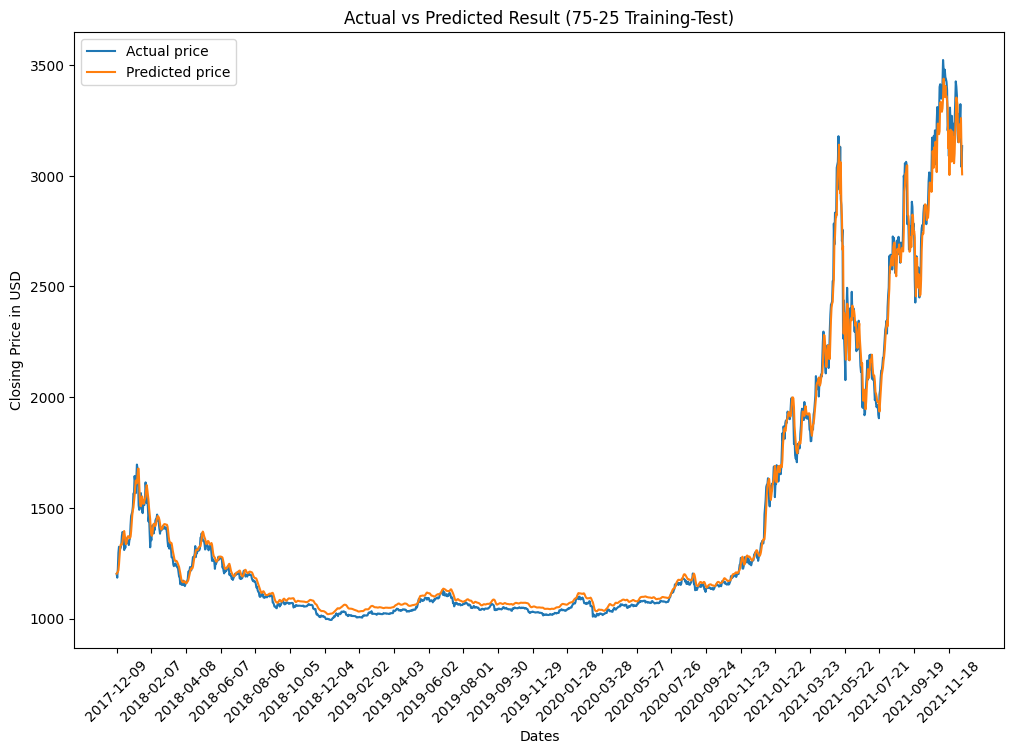

In [164]:
plot_result_train(label_training3, training_result3, original_data, "Actual vs Predicted Result (75-25 Training-Test)")

           Dates          Actual Price       Predicted Price
1524  2022-01-11   [2801.038948582125]     [2673.0947265625]
1525  2022-01-12   [2909.062923619399]   [2758.437744140625]
1526  2022-01-13   [2809.234155563298]   [2847.853271484375]
1527  2022-01-14   [2858.929529029035]   [2751.642822265625]
1528  2022-01-15  [2875.4611007132075]       [2783.28515625]
...          ...                   ...                   ...
1988  2023-04-20  [1758.2065815334554]  [1837.0665283203125]
1989  2023-04-21  [1683.2379846718977]   [1785.844970703125]
1990  2023-04-22  [1702.7486129588096]   [1736.289306640625]
1991  2023-04-23  [1692.9512268196972]  [1714.2078857421875]
1992  2023-04-24  [1669.6986413477844]  [1709.8555908203125]

[469 rows x 3 columns]


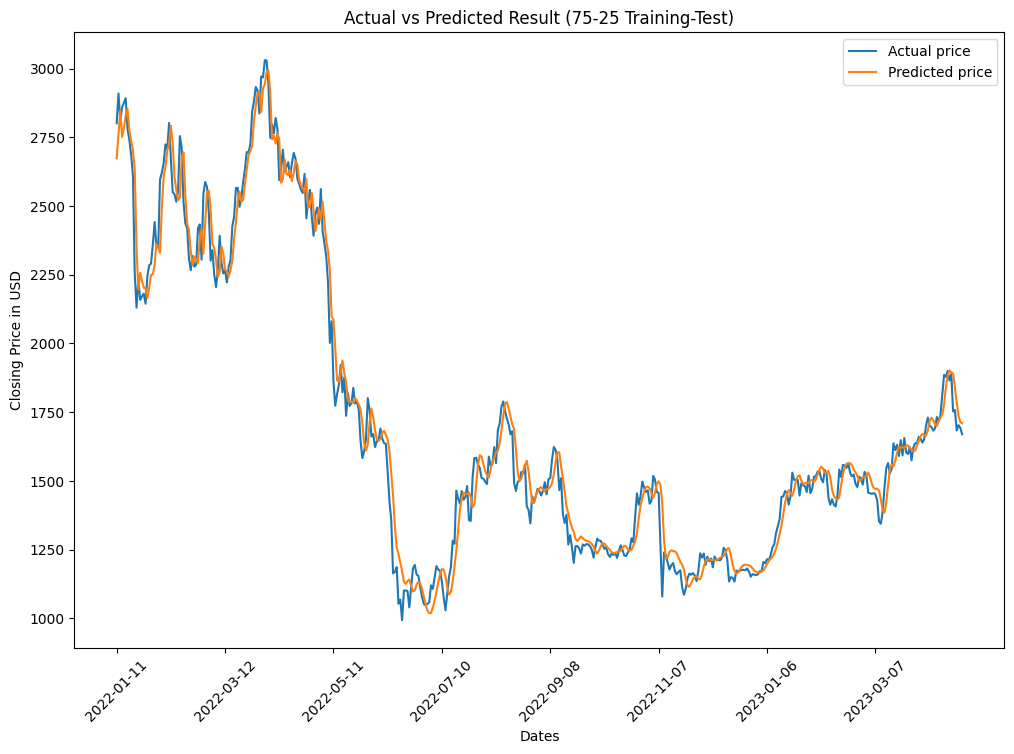

In [165]:
plot_result_test(label_test3, test_result3, label_training3.shape[0], original_data, "Actual vs Predicted Result (75-25 Training-Test)")

In [166]:
tf.backend.clear_session()

In [167]:
train_result4 = improved_model_regularizer.fit(x=feature_training4, y=label_training4, validation_data=(feature_test4, label_test4),
                                   epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
50/50 [==============================] - 5s 67ms/step - loss: 0.0014 - mean_squared_error: 4.7105e-04 - mean_absolute_error: 0.0148 - root_mean_squared_error: 0.0217 - val_loss: 0.0025 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0294 - val_root_mean_squared_error: 0.0403
Epoch 2/100
50/50 [==============================] - 3s 59ms/step - loss: 0.0015 - mean_squared_error: 6.0200e-04 - mean_absolute_error: 0.0171 - root_mean_squared_error: 0.0245 - val_loss: 0.0024 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0307 - val_root_mean_squared_error: 0.0384
Epoch 3/100
50/50 [==============================] - 3s 59ms/step - loss: 0.0013 - mean_squared_error: 4.0791e-04 - mean_absolute_error: 0.0133 - root_mean_squared_error: 0.0202 - val_loss: 0.0021 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0257 - val_root_mean_squared_error: 0.0341
Epoch 4/100
50/50 [==============================] - 5s 96ms/step - loss: 0.0014 - mean_square

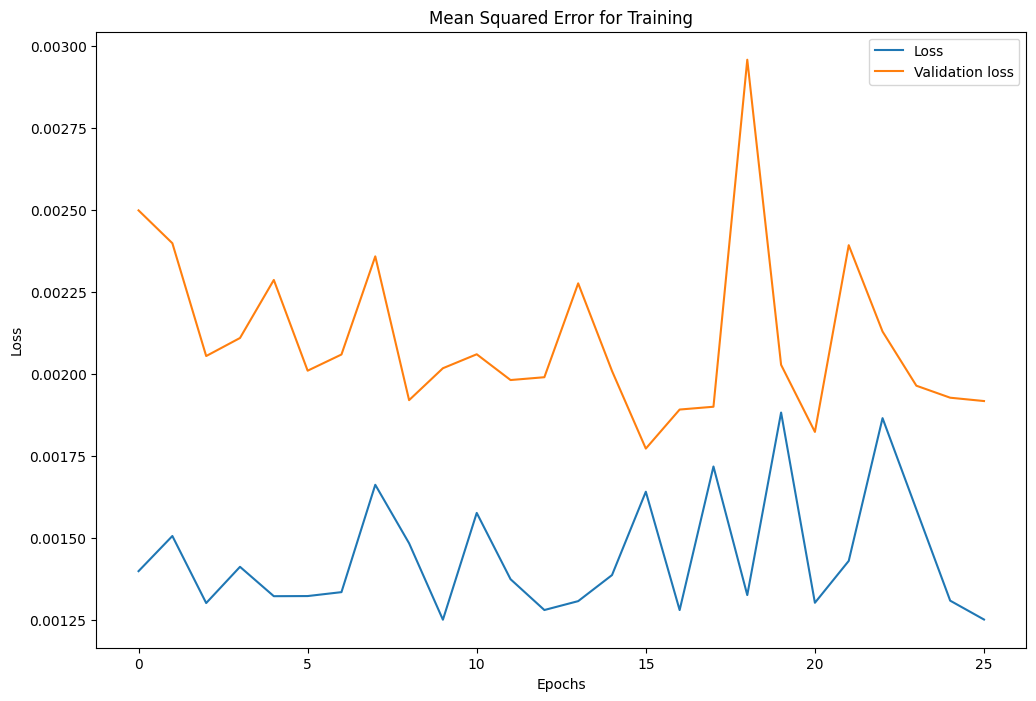

In [168]:
plot_loss(train_result4.history['loss'], train_result4.history['val_loss'])

In [169]:
improved_model_regularizer.evaluate(x=feature_test4, y=label_test4, verbose=1)

12/12 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 9.4674e-04 - mean_absolute_error: 0.0213 - root_mean_squared_error: 0.0308


[0.0017724933568388224,
 0.0009467360214330256,
 0.02125793881714344,
 0.030769076198339462]

In [170]:
training_predict4 = improved_model_regularizer.predict(feature_training4)
test_predict4 = improved_model_regularizer.predict(feature_test4)

12/12 [==============================] - 0s 10ms/step


In [171]:
# Restore the training and test datasets' original shapes.
training_result4 = normalizer.inverse_transform(training_predict4)
test_result4 = normalizer.inverse_transform(test_predict4)

In [172]:
print(training_result4.shape)
print(test_result4.shape)

(1574, 1)
(359, 1)


           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]   [1185.451416015625]
31    2017-12-10  [1184.8400991863457]       [1193.44140625]
32    2017-12-11  [1224.1145485841962]     [1194.8291015625]
33    2017-12-12  [1297.0276373650145]  [1203.3555908203125]
34    2017-12-13  [1324.4906040502817]  [1238.1177978515625]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]    [2611.64892578125]
1600  2022-03-28  [2733.5177311196053]   [2677.959228515625]
1601  2022-03-29  [2768.4794493421177]   [2710.562744140625]
1602  2022-03-30  [2759.4760758914417]   [2738.490478515625]
1603  2022-03-31   [2704.099092600401]     [2737.5634765625]

[1574 rows x 3 columns]


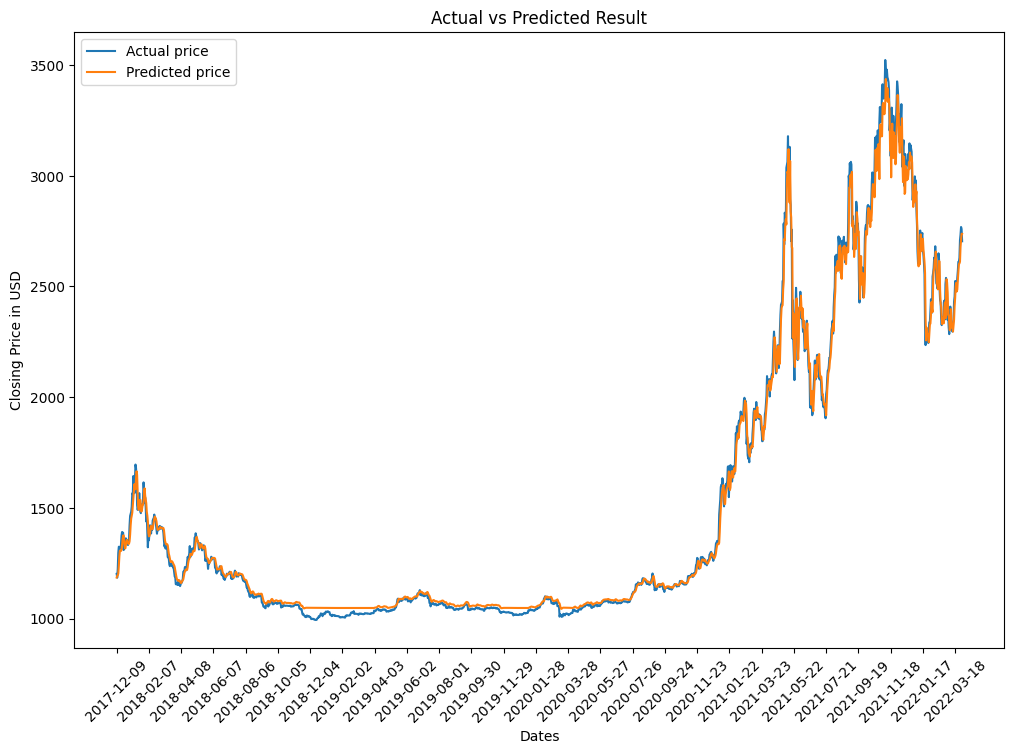

In [173]:
plot_result_train(label_training4, training_result4, original_data)

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]   [2719.848876953125]
1635  2022-05-02           [2857.4104]    [2804.60791015625]
1636  2022-05-03         [2783.476318]   [2823.146240234375]
1637  2022-05-04         [2940.644775]     [2764.5205078125]
1638  2022-05-05         [2749.213135]   [2909.192138671875]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [1988.015869140625]
1989  2023-04-21         [1849.999878]   [1938.236572265625]
1990  2023-04-22  [1874.2286380000003]  [1886.5189208984375]
1991  2023-04-23         [1862.062012]   [1873.185302734375]
1992  2023-04-24         [1833.186401]  [1874.2669677734375]

[359 rows x 3 columns]


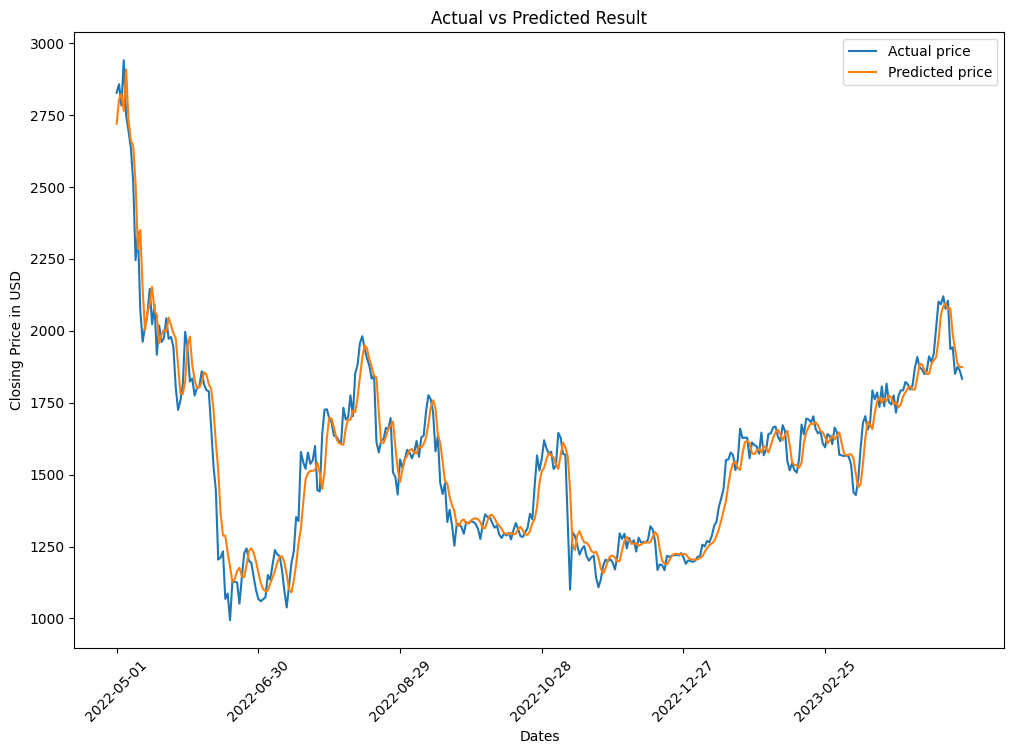

In [174]:
plot_result_test(label_test4, test_result4, label_training4.shape[0], original_data)

In [175]:
tf.backend.clear_session()

## With Dropout and Regularizers

In [176]:
# For this model, assign a dropout rate of 33% to the first LSTM layer.
improved_model_dropout_regularizer = tf.models.Sequential()
improved_model_dropout_regularizer.add(tf.layers.LSTM(units=128, activation="relu", input_shape=(num_steps, 1),
                                                             kernel_regularizer="l1_l2", return_sequences=True))
improved_model_dropout_regularizer.add(tf.layers.Dropout(0.2))
improved_model_dropout_regularizer.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_dropout_regularizer.add(tf.layers.Dropout(0.2))
improved_model_dropout_regularizer.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_dropout_regularizer.add(tf.layers.Dropout(0.2))
improved_model_dropout_regularizer.add(tf.layers.LSTM(units=128, return_sequences=True))
improved_model_dropout_regularizer.add(tf.layers.Dropout(0.2))
improved_model_dropout_regularizer.add(tf.layers.LSTM(units=128))
improved_model_dropout_regularizer.add(tf.layers.Dropout(0.2))
improved_model_dropout_regularizer.add(tf.layers.Dense(1))
improved_model_dropout_regularizer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 128)           1

In [177]:
improved_model_dropout_regularizer.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),
                       metrics=[tf.metrics.MeanSquaredError(), tf.metrics.MeanAbsoluteError(), tf.metrics.RootMeanSquaredError()])

In [178]:
train_result = improved_model_dropout_regularizer.fit(x=feature_training, y=label_training, validation_data=(feature_test, label_test),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
43/43 [==============================] - 14s 121ms/step - loss: 0.2100 - mean_squared_error: 0.0102 - mean_absolute_error: 0.0593 - root_mean_squared_error: 0.1010 - val_loss: 0.1281 - val_mean_squared_error: 0.0156 - val_mean_absolute_error: 0.0952 - val_root_mean_squared_error: 0.1251
Epoch 2/100
43/43 [==============================] - 3s 63ms/step - loss: 0.0657 - mean_squared_error: 0.0048 - mean_absolute_error: 0.0419 - root_mean_squared_error: 0.0691 - val_loss: 0.0472 - val_mean_squared_error: 0.0256 - val_mean_absolute_error: 0.1284 - val_root_mean_squared_error: 0.1601
Epoch 3/100
43/43 [==============================] - 3s 64ms/step - loss: 0.0151 - mean_squared_error: 0.0057 - mean_absolute_error: 0.0472 - root_mean_squared_error: 0.0755 - val_loss: 0.0141 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0755 - val_root_mean_squared_error: 0.0971
Epoch 4/100
43/43 [==============================] - 3s 81ms/step - loss: 0.0076 - mean_squared_error: 0

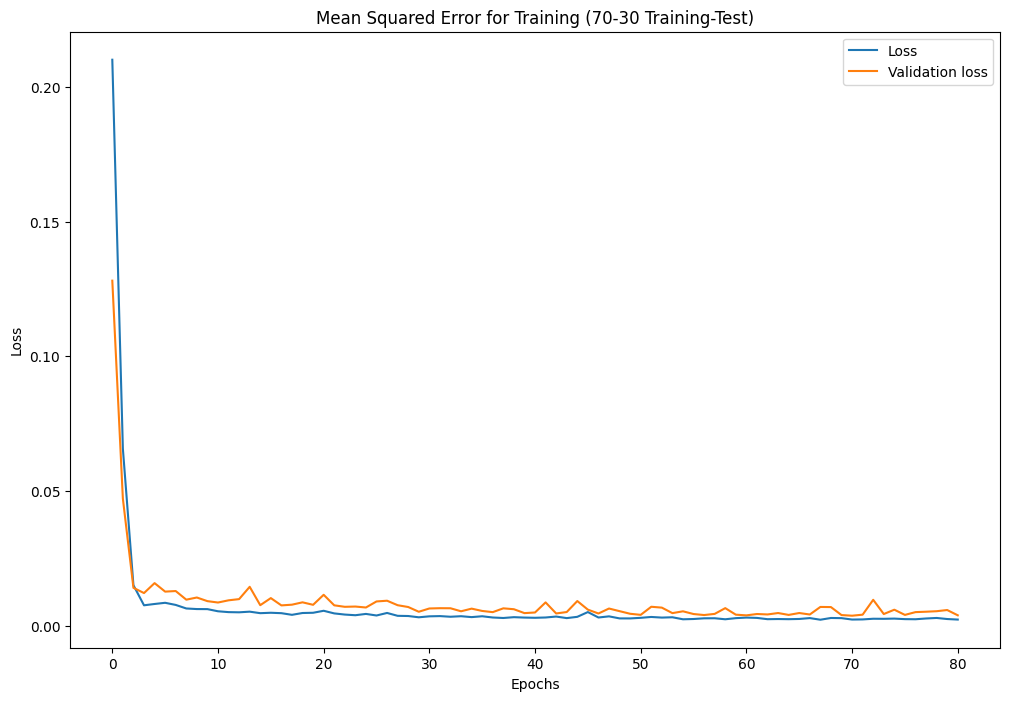

In [179]:
plot_loss(train_result.history['loss'], train_result.history['val_loss'], "Mean Squared Error for Training (70-30 Training-Test)")

In [180]:
improved_model_dropout_regularizer.evaluate(x=feature_test, y=label_test, verbose=1)

18/18 [==============================] - 0s 11ms/step - loss: 0.0038 - mean_squared_error: 0.0026 - mean_absolute_error: 0.0380 - root_mean_squared_error: 0.0515


[0.0037546318490058184,
 0.0026493167970329523,
 0.03801076486706734,
 0.051471516489982605]

In [181]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict = improved_model_dropout_regularizer.predict(feature_training)
test_predict = improved_model_dropout_regularizer.predict(feature_test)

18/18 [==============================] - 0s 14ms/step


In [182]:
training_result = normalizer.inverse_transform(training_predict)
test_result = normalizer.inverse_transform(test_predict)

           Dates          Actual Price       Predicted Price
30    2017-12-09  [1234.6389321772506]   [1225.890380859375]
31    2017-12-10  [1214.9590388744555]    [1224.94384765625]
32    2017-12-11  [1260.4201213168128]  [1224.1322021484375]
33    2017-12-12  [1344.8187059185636]    [1224.46240234375]
34    2017-12-13  [1376.6077242684673]  [1228.0260009765625]
...          ...                   ...                   ...
1390  2021-08-30  [2938.0737588891357]     [2893.7373046875]
1391  2021-08-31  [3067.7156882441755]     [2894.3115234375]
1392  2021-09-01  [3316.0878082883187]    [2903.13134765625]
1393  2021-09-02   [3288.941725518203]   [2923.246337890625]
1394  2021-09-03  [3381.5945268026167]   [2961.343017578125]

[1365 rows x 3 columns]


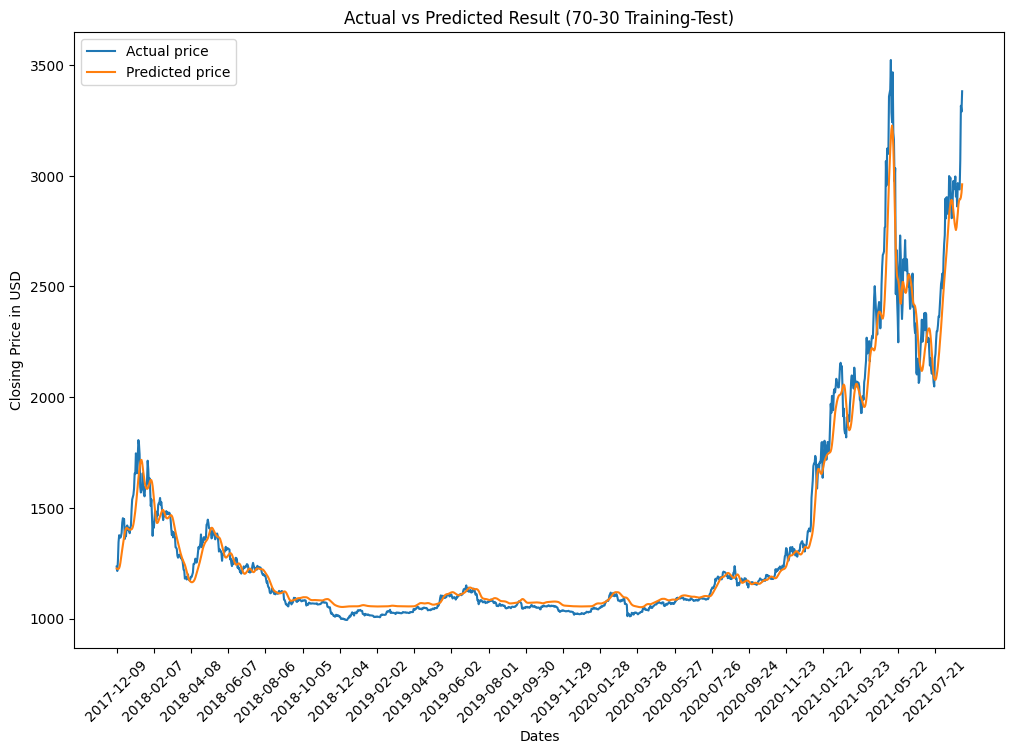

In [183]:
plot_result_train(label_training, training_result, original_data, "Actual vs Predicted Result (70-30 Training-Test)")

           Dates          Actual Price       Predicted Price
1425  2021-10-04  [2574.3321970574957]   [2252.219970703125]
1426  2021-10-05  [2666.0226049798393]   [2286.686279296875]
1427  2021-10-06   [2707.117835278116]   [2349.180908203125]
1428  2021-10-07  [2712.0278203738003]     [2421.6552734375]
1429  2021-10-08  [2695.9883415675076]   [2482.221923828125]
...          ...                   ...                   ...
1988  2023-04-20  [1622.5236158580235]     [1673.7177734375]
1989  2023-04-21  [1560.8591823760564]  [1684.3433837890625]
1990  2023-04-22   [1576.907393101027]  [1684.0841064453125]
1991  2023-04-23   [1568.848681971778]   [1674.350830078125]
1992  2023-04-24   [1549.722573572492]  [1656.5294189453125]

[568 rows x 3 columns]


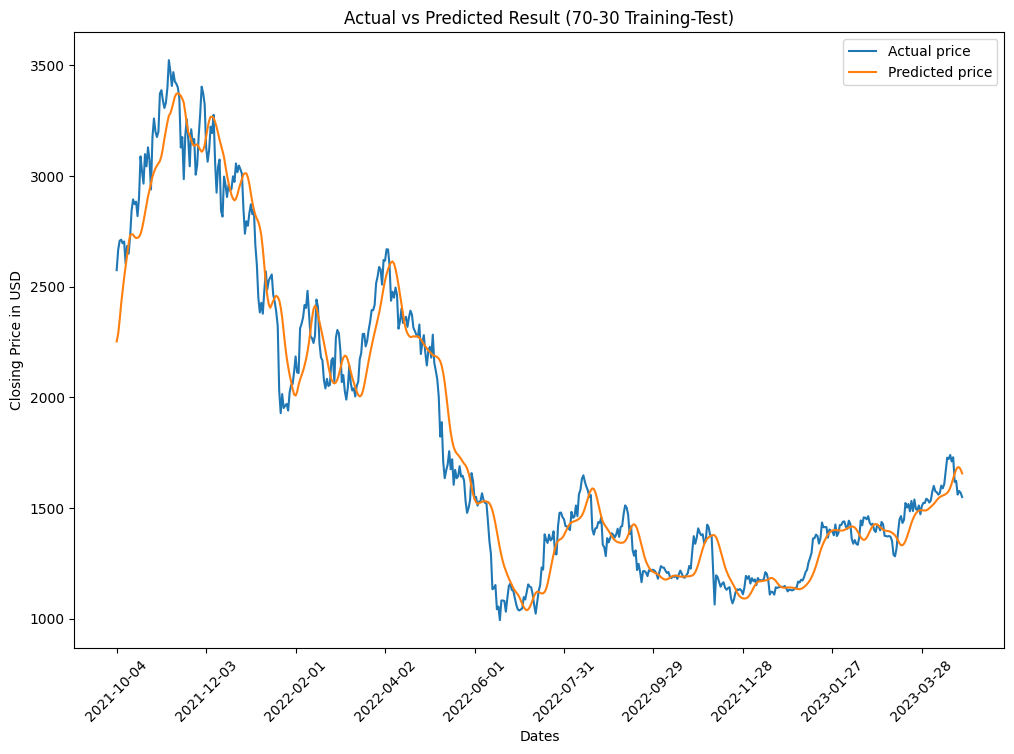

In [184]:
plot_result_test(label_test, test_result, label_training.shape[0], original_data, "Actual vs Predicted Result (70-30 Training-Test)")

In [185]:
tf.backend.clear_session()

In [186]:
train_result2 = improved_model_dropout_regularizer.fit(x=feature_training2, y=label_training2, validation_data=(feature_test2, label_test2),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
49/49 [==============================] - 5s 71ms/step - loss: 0.0032 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0280 - root_mean_squared_error: 0.0449 - val_loss: 0.0065 - val_mean_squared_error: 0.0052 - val_mean_absolute_error: 0.0522 - val_root_mean_squared_error: 0.0723
Epoch 2/100
49/49 [==============================] - 3s 60ms/step - loss: 0.0037 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0311 - root_mean_squared_error: 0.0490 - val_loss: 0.0063 - val_mean_squared_error: 0.0052 - val_mean_absolute_error: 0.0512 - val_root_mean_squared_error: 0.0718
Epoch 3/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0036 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0329 - root_mean_squared_error: 0.0496 - val_loss: 0.0053 - val_mean_squared_error: 0.0041 - val_mean_absolute_error: 0.0486 - val_root_mean_squared_error: 0.0641
Epoch 4/100
49/49 [==============================] - 4s 72ms/step - loss: 0.0035 - mean_squared_error: 0.0

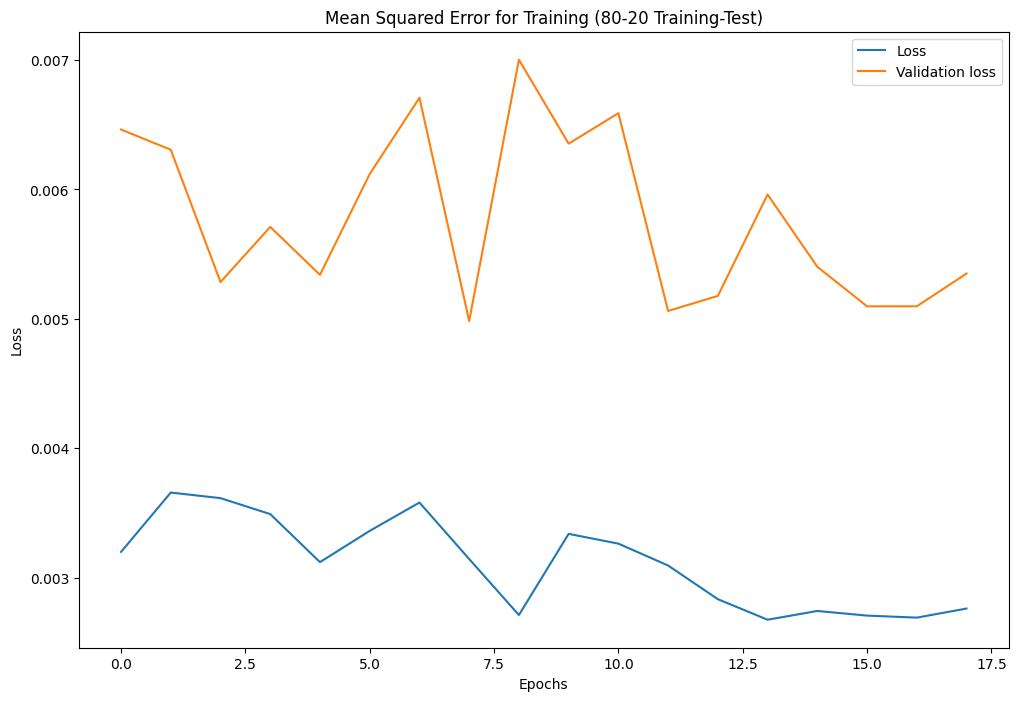

In [187]:
plot_loss(train_result2.history['loss'], train_result2.history['val_loss'], "Mean Squared Error for Training (80-20 Training-Test)")

In [188]:
improved_model_dropout_regularizer.evaluate(x=feature_test2, y=label_test2, verbose=1)

12/12 [==============================] - 0s 13ms/step - loss: 0.0050 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0443 - root_mean_squared_error: 0.0623


[0.004983453080058098,
 0.003884857054799795,
 0.04425739869475365,
 0.06232862174510956]

In [189]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict2 = improved_model_dropout_regularizer.predict(feature_training2)
test_predict2 = improved_model_dropout_regularizer.predict(feature_test2)

12/12 [==============================] - 0s 14ms/step


In [190]:
training_result2 = normalizer.inverse_transform(training_predict2)
test_result2 = normalizer.inverse_transform(test_predict2)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1213.1793212890625]
31    2017-12-10  [1184.8400991863457]  [1213.0042724609375]
32    2017-12-11  [1224.1145485841962]  [1212.7208251953125]
33    2017-12-12  [1297.0276373650145]  [1213.6436767578125]
34    2017-12-13  [1324.4906040502817]   [1217.718994140625]
...          ...                   ...                   ...
1589  2022-03-17    [2454.38363745047]   [2292.608154296875]
1590  2022-03-18   [2524.190441879222]       [2300.83203125]
1591  2022-03-19  [2524.6794331279216]       [2319.49609375]
1592  2022-03-20  [2478.7805791155456]       [2340.38671875]
1593  2022-03-21  [2498.8510426076855]   [2366.627685546875]

[1564 rows x 3 columns]


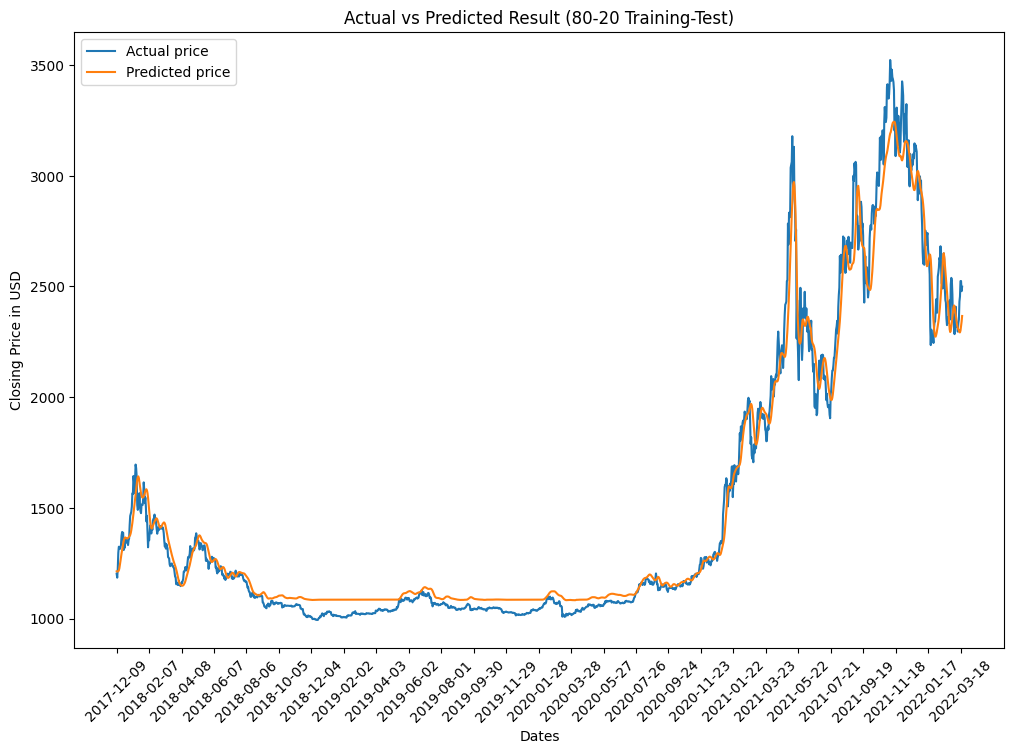

In [191]:
plot_result_train(label_training2, training_result2, original_data, "Actual vs Predicted Result (80-20 Training-Test)")

           Dates          Actual Price       Predicted Price
1624  2022-04-21  [2987.4807129999995]   [2918.885986328125]
1625  2022-04-22  [2964.8356929999995]   [2920.592041015625]
1626  2022-04-23         [2938.114014]   [2922.032958984375]
1627  2022-04-24  [2922.7326659999994]    [2915.35888671875]
1628  2022-04-25         [3009.393555]   [2904.808349609375]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]    [2057.06494140625]
1989  2023-04-21         [1849.999878]    [2067.63037109375]
1990  2023-04-22  [1874.2286380000003]   [2062.695556640625]
1991  2023-04-23         [1862.062012]  [2044.4913330078125]
1992  2023-04-24         [1833.186401]  [2015.7672119140625]

[369 rows x 3 columns]


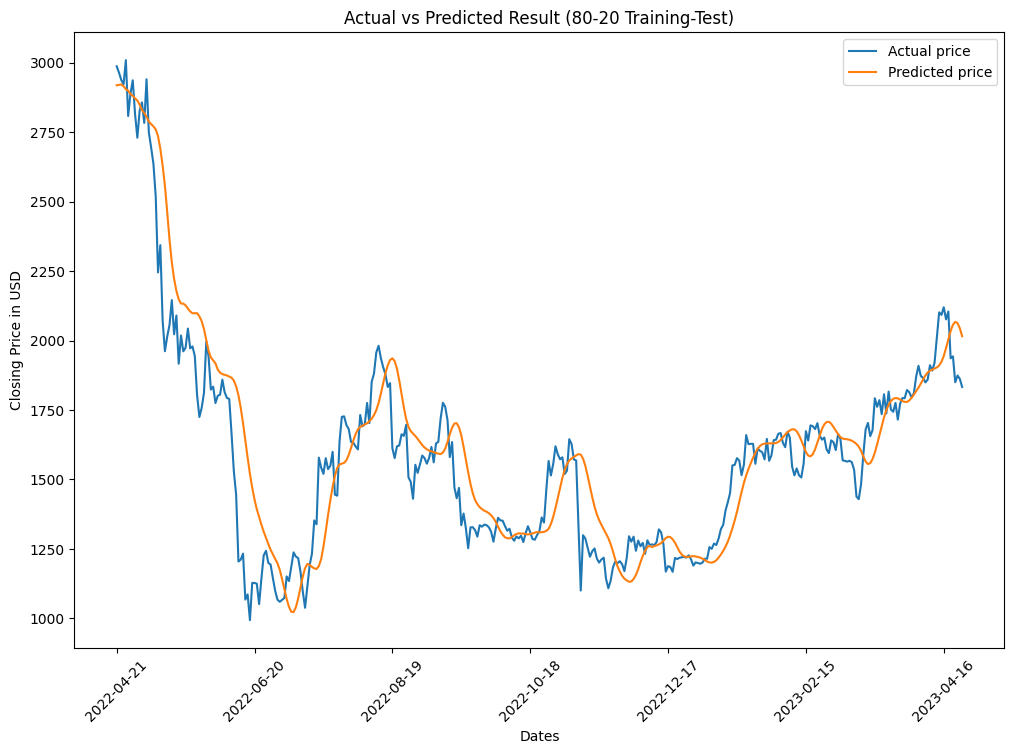

In [192]:
plot_result_test(label_test2, test_result2, label_training2.shape[0], original_data, "Actual vs Predicted Result (80-20 Training-Test)")

In [193]:
tf.backend.clear_session()

In [194]:
train_result3 = improved_model_dropout_regularizer.fit(x=feature_training3, y=label_training3, validation_data=(feature_test3, label_test3),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
46/46 [==============================] - 6s 88ms/step - loss: 0.0028 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0249 - root_mean_squared_error: 0.0397 - val_loss: 0.0054 - val_mean_squared_error: 0.0042 - val_mean_absolute_error: 0.0481 - val_root_mean_squared_error: 0.0649
Epoch 2/100
46/46 [==============================] - 3s 65ms/step - loss: 0.0025 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0227 - root_mean_squared_error: 0.0363 - val_loss: 0.0062 - val_mean_squared_error: 0.0051 - val_mean_absolute_error: 0.0503 - val_root_mean_squared_error: 0.0714
Epoch 3/100
46/46 [==============================] - 3s 66ms/step - loss: 0.0026 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0244 - root_mean_squared_error: 0.0376 - val_loss: 0.0052 - val_mean_squared_error: 0.0040 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0636
Epoch 4/100
46/46 [==============================] - 5s 104ms/step - loss: 0.0030 - mean_squared_error: 0.

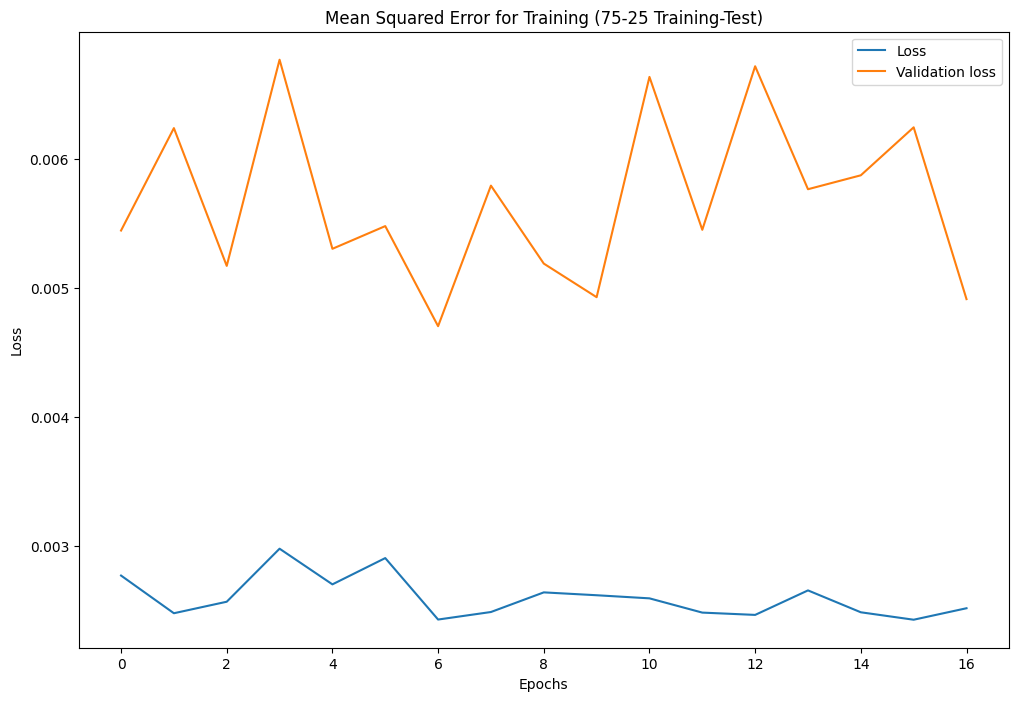

In [195]:
plot_loss(train_result3.history['loss'], train_result3.history['val_loss'], "Mean Squared Error for Training (75-25 Training-Test)")

In [196]:
improved_model_dropout_regularizer.evaluate(x=feature_test3, y=label_test3, verbose=1)

15/15 [==============================] - 0s 11ms/step - loss: 0.0047 - mean_squared_error: 0.0035 - mean_absolute_error: 0.0432 - root_mean_squared_error: 0.0594


[0.004700958263128996,
 0.003533456940203905,
 0.04319141432642937,
 0.05944288894534111]

In [197]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict3 = improved_model_dropout_regularizer.predict(feature_training3)
test_predict3 = improved_model_dropout_regularizer.predict(feature_test3)

15/15 [==============================] - 0s 9ms/step


In [198]:
training_result3 = normalizer.inverse_transform(training_predict3)
test_result3 = normalizer.inverse_transform(test_predict3)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1179.7130126953125]
31    2017-12-10  [1184.8400991863457]    [1180.11572265625]
32    2017-12-11  [1224.1145485841962]  [1180.4661865234375]
33    2017-12-12  [1297.0276373650145]  [1182.1676025390625]
34    2017-12-13  [1324.4906040502817]     [1187.2841796875]
...          ...                   ...                   ...
1489  2021-12-07  [3256.9420081048775]         [3205.390625]
1490  2021-12-08  [3323.4362344133992]    [3203.90966796875]
1491  2021-12-09   [3152.492427888083]   [3196.467529296875]
1492  2021-12-10  [3039.4437018576714]    [3188.54931640625]
1493  2021-12-11  [3133.5741769946194]    [3175.40283203125]

[1464 rows x 3 columns]


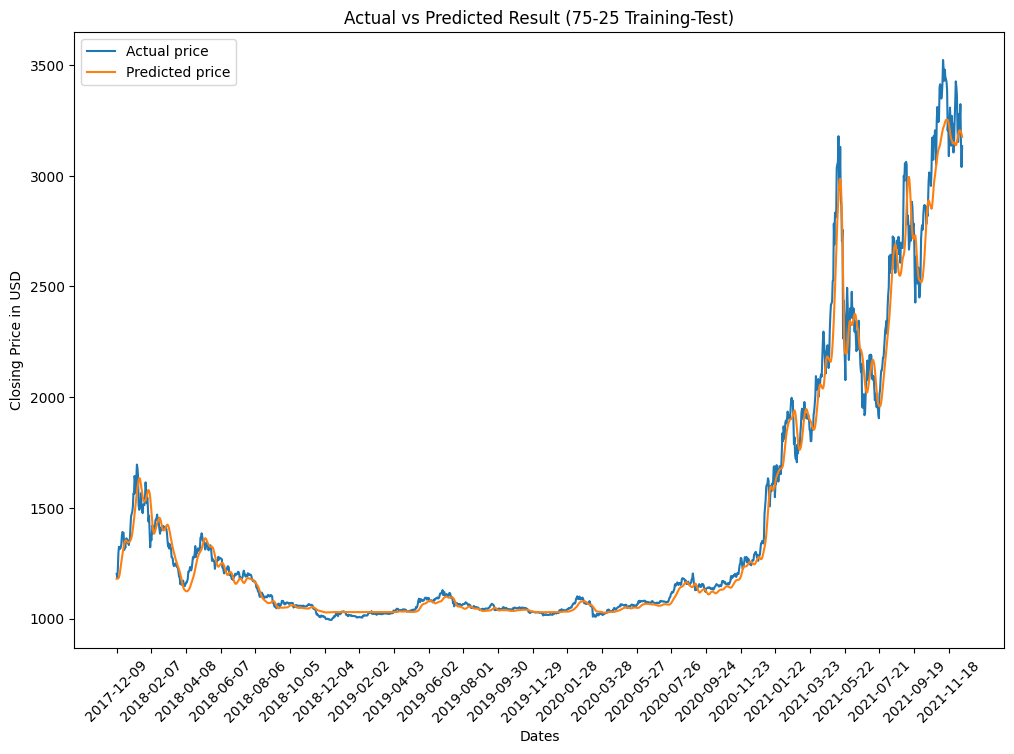

In [199]:
plot_result_train(label_training3, training_result3, original_data, "Actual vs Predicted Result (75-25 Training-Test)")

           Dates          Actual Price       Predicted Price
1524  2022-01-11   [2801.038948582125]    [2997.45654296875]
1525  2022-01-12   [2909.062923619399]   [2920.692626953125]
1526  2022-01-13   [2809.234155563298]   [2851.936279296875]
1527  2022-01-14   [2858.929529029035]   [2797.714111328125]
1528  2022-01-15  [2875.4611007132075]    [2762.63623046875]
...          ...                   ...                   ...
1988  2023-04-20  [1758.2065815334554]  [1852.7777099609375]
1989  2023-04-21  [1683.2379846718977]  [1861.3406982421875]
1990  2023-04-22  [1702.7486129588096]    [1855.73583984375]
1991  2023-04-23  [1692.9512268196972]      [1838.830078125]
1992  2023-04-24  [1669.6986413477844]  [1813.2462158203125]

[469 rows x 3 columns]


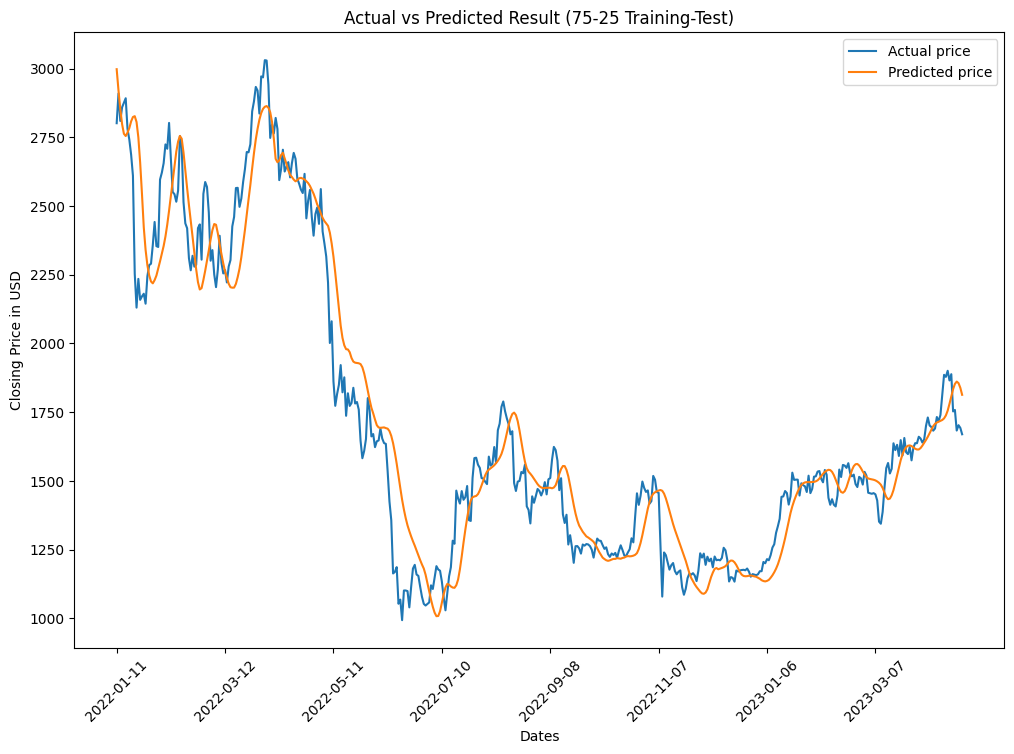

In [200]:
plot_result_test(label_test3, test_result3, label_training3.shape[0], original_data, "Actual vs Predicted Result (75-25 Training-Test)")

In [201]:
tf.backend.clear_session()

In [202]:
train_result4 = improved_model_dropout_regularizer.fit(x=feature_training4, y=label_training4, validation_data=(feature_test4, label_test4),
                                  epochs=100, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100
50/50 [==============================] - 6s 93ms/step - loss: 0.0029 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0276 - root_mean_squared_error: 0.0415 - val_loss: 0.0091 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0662 - val_root_mean_squared_error: 0.0888
Epoch 2/100
50/50 [==============================] - 4s 74ms/step - loss: 0.0030 - mean_squared_error: 0.0019 - mean_absolute_error: 0.0278 - root_mean_squared_error: 0.0432 - val_loss: 0.0057 - val_mean_squared_error: 0.0047 - val_mean_absolute_error: 0.0492 - val_root_mean_squared_error: 0.0682
Epoch 3/100
50/50 [==============================] - 3s 61ms/step - loss: 0.0029 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0267 - root_mean_squared_error: 0.0426 - val_loss: 0.0050 - val_mean_squared_error: 0.0039 - val_mean_absolute_error: 0.0472 - val_root_mean_squared_error: 0.0624
Epoch 4/100
50/50 [==============================] - 3s 62ms/step - loss: 0.0029 - mean_squared_error: 0.0

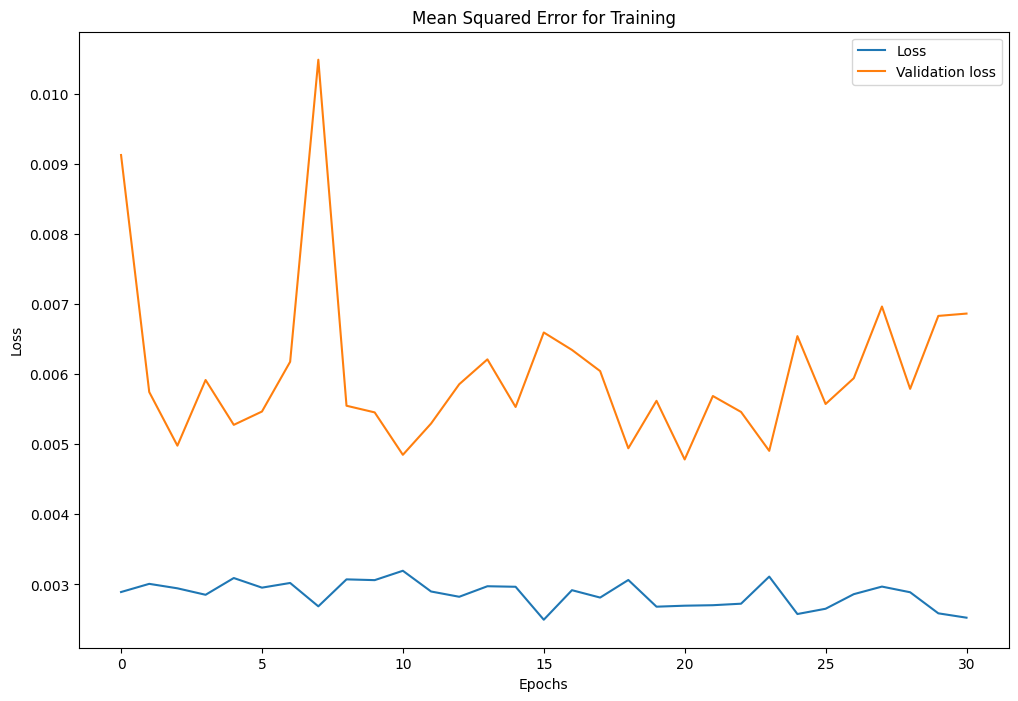

In [203]:
plot_loss(train_result4.history['loss'], train_result4.history['val_loss'])

In [204]:
improved_model_dropout_regularizer.evaluate(x=feature_test4, y=label_test4, verbose=1)

12/12 [==============================] - 0s 16ms/step - loss: 0.0048 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0437 - root_mean_squared_error: 0.0613


[0.004782453645020723,
 0.0037635783664882183,
 0.043720804154872894,
 0.06134800985455513]

In [205]:
# Now try to predict the training and test values. After that,
# transform them back into their standard values.
training_predict4 = improved_model_dropout_regularizer.predict(feature_training4)
test_predict4 = improved_model_dropout_regularizer.predict(feature_test4)

12/12 [==============================] - 0s 15ms/step


In [206]:
training_result4 = normalizer.inverse_transform(training_predict4)
test_result4 = normalizer.inverse_transform(test_predict4)

           Dates          Actual Price       Predicted Price
30    2017-12-09   [1201.841827525211]  [1229.8804931640625]
31    2017-12-10  [1184.8400991863457]  [1230.0325927734375]
32    2017-12-11  [1224.1145485841962]  [1229.7264404296875]
33    2017-12-12  [1297.0276373650145]    [1230.92919921875]
34    2017-12-13  [1324.4906040502817]   [1235.932373046875]
...          ...                   ...                   ...
1599  2022-03-27  [2709.4138716771517]   [2552.946533203125]
1600  2022-03-28  [2733.5177311196053]   [2587.087646484375]
1601  2022-03-29  [2768.4794493421177]   [2622.357177734375]
1602  2022-03-30  [2759.4760758914417]    [2655.14306640625]
1603  2022-03-31   [2704.099092600401]    [2677.52099609375]

[1574 rows x 3 columns]


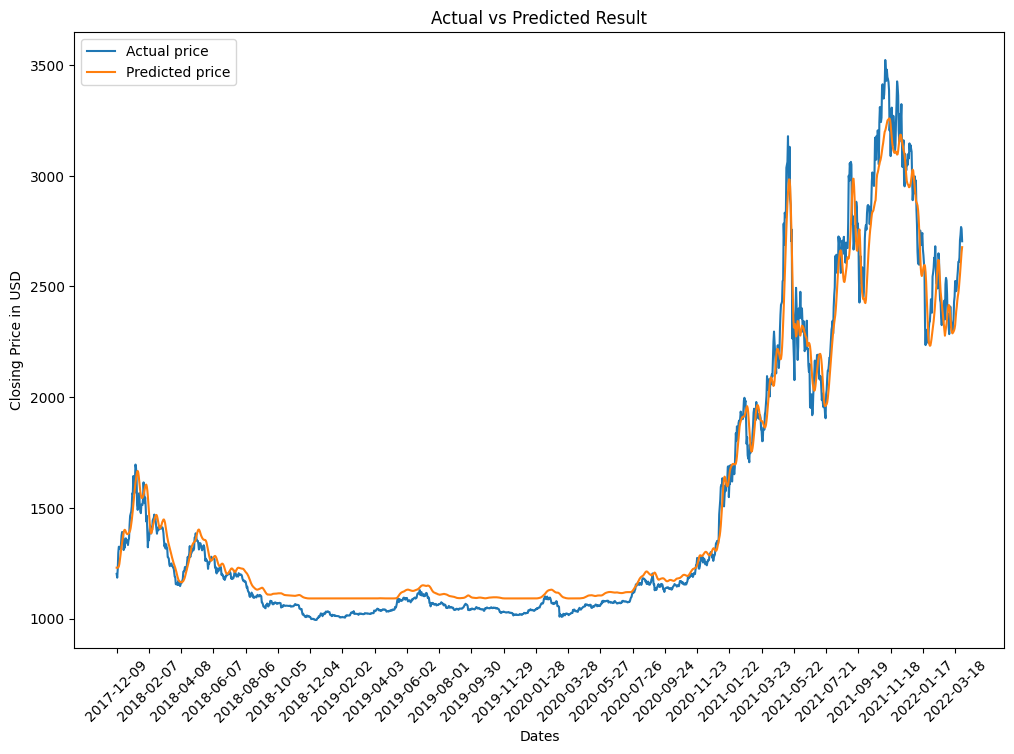

In [207]:
plot_result_train(label_training4, training_result4, original_data)

           Dates          Actual Price       Predicted Price
1634  2022-05-01         [2827.756104]    [2823.47802734375]
1635  2022-05-02           [2857.4104]   [2803.273193359375]
1636  2022-05-03         [2783.476318]      [2779.462890625]
1637  2022-05-04         [2940.644775]   [2758.986572265625]
1638  2022-05-05         [2749.213135]    [2745.52587890625]
...          ...                   ...                   ...
1988  2023-04-20         [1943.097656]   [2069.037841796875]
1989  2023-04-21         [1849.999878]   [2080.091552734375]
1990  2023-04-22  [1874.2286380000003]   [2068.631591796875]
1991  2023-04-23         [1862.062012]  [2037.4857177734375]
1992  2023-04-24         [1833.186401]  [1990.9114990234375]

[359 rows x 3 columns]


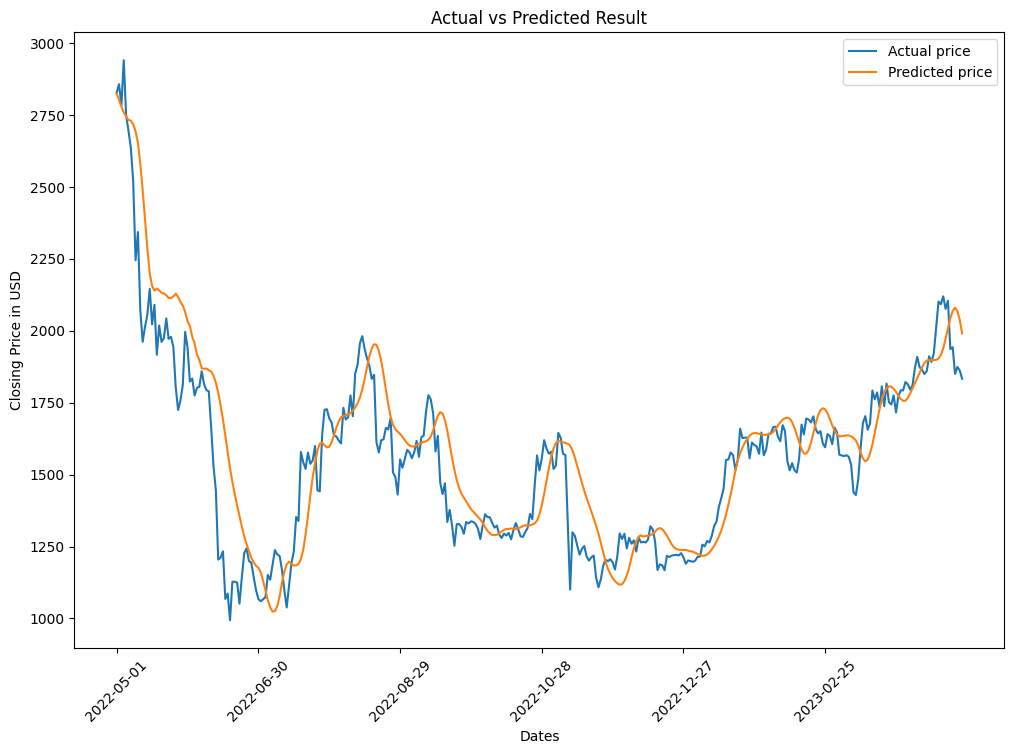

In [208]:
plot_result_test(label_test4, test_result4, label_training4.shape[0], original_data)

In [209]:
tf.backend.clear_session()

--------------------------------------------------------------------------------